<a href="https://colab.research.google.com/github/sgevatschnaider/GraphAI-Data-Science-ML/blob/main/notebooks/Camino%2C_ciclo_hamiltoneano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importar las funciones necesarias de IPython para mostrar HTML
from IPython.core.display import display, HTML

# Definir el contenido HTML, CSS y JavaScript como un string multilínea
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Grafos Hamiltonianos: Estudio Interactivo</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    /* Definición de variables CSS para temas */
    :root {
      --bg-color: #f9f9f9;
      --text-color: #333;
      --header-color: #2c3e50;
      --header-dark-color: #ecf0f1; /* Color H1 en modo oscuro */
      --accent-color: #2980b9;
      --accent-dark-color: #9ad3de; /* Color H2 en modo oscuro */
      --button-bg: #3498db;
      --button-hover-bg: #2980b9;
      --button-dark-bg: #e74c3c;
      --button-dark-hover-bg: #c0392b;
      --button-text-color: white;
      --doc-button-bg: #27ae60;
      --doc-button-hover-bg: #219150;
      --theme-button-bg: #8e44ad; /* Morado claro */
      --theme-button-dark-bg: #f39c12; /* Naranja */
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      padding: 20px;
      margin: 0; /* Asegurar que no haya márgenes por defecto */
    }
    .container {
      max-width: 900px;
      margin: auto;
      padding: 20px;
      position: relative; /* Para posicionar el botón de tema */
      background-color: var(--bg-color); /* Para que el contenedor también cambie */
      border-radius: 8px; /* Opcional: para redondear esquinas del contenedor */
      box-shadow: 0 2px 10px rgba(0,0,0,0.1); /* Opcional: una sombra sutil */
    }
    body.dark-mode .container {
        box-shadow: 0 2px 10px rgba(0,0,0,0.3);
    }
    body.dark-mode {
      --bg-color: #2c3e50;
      --text-color: #ecf0f1;
      --header-color: var(--header-dark-color);
      --accent-color: var(--accent-dark-color);
      --button-bg: var(--button-dark-bg);
      --button-hover-bg: var(--button-dark-hover-bg);
    }

    h1, h2, h3 {
      text-align: center;
    }
    h1 {
      font-size: 2.5em;
      color: var(--header-color);
      margin-bottom: 10px;
    }
    h2 {
      color: var(--accent-color);
      font-size: 1.8em;
      border-bottom: 2px solid var(--accent-color);
      padding-bottom: 5px;
      margin-top: 30px; /* Más espacio antes de H2 */
      margin-bottom: 15px;
    }
    h3 { /* Estilo para los títulos dentro de las secciones del índice */
      color: var(--header-color);
      font-size: 1.3em; /* Ligeramente más pequeño que H2 */
      margin-top: 15px;
      margin-bottom: 8px;
      text-align: left; /* Alineación a la izquierda para los sub-items */
      border-bottom: 1px dashed var(--accent-color);
      padding-bottom: 3px;
    }
    h4 { /* Para sub-sub-items si es necesario */
        color: var(--text-color);
        font-size: 1.1em;
        margin-top: 10px;
        margin-bottom: 5px;
        text-align: left;
    }

    .section-content {
      display: none;
      margin-top: 10px;
      padding-left: 15px; /* Indentación para contenido de sección */
      border-left: 2px solid var(--accent-color);
    }
    .section-content.is-visible {
      display: block;
    }
    /* Estilo específico para el contenido de los items del índice */
    #section_indice_main .section-content .section-content {
        padding-left: 25px; /* Mayor indentación para sub-sub-secciones */
        border-left: 2px dotted var(--accent-color);
    }


    .toggle-button {
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px; /* Botones un poco más grandes */
      border-radius: 5px;
      cursor: pointer;
      margin-top: 10px;
      transition: background-color 0.3s;
      width: 100%;
      text-align: left;
      font-size: 1.2em; /* Texto de botón un poco más grande */
      font-weight: bold;
    }
    .toggle-button:hover {
      background-color: var(--button-hover-bg);
    }
    /* Botones de sub-secciones del índice */
    #section_indice_main .toggle-button {
        font-size: 1.1em; /* Ligeramente más pequeños */
        font-weight: normal;
        background-color: var(--accent-color); /* Color diferente para distinguir jerarquía */
        margin-left:15px;
        width: calc(100% - 15px);
    }
    body.dark-mode #section_indice_main .toggle-button {
        background-color: var(--accent-dark-color);
        color: var(--bg-color); /* texto oscuro sobre fondo claro en modo oscuro */
    }
     body.dark-mode #section_indice_main .toggle-button:hover {
        background-color: var(--button-dark-hover-bg);
    }


    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      position: absolute;
      top: 20px;
      right: 20px;
      font-size: 0.9em;
      transition: background-color 0.3s;
      z-index: 10;
    }
    body.dark-mode .theme-toggle {
       background-color: var(--theme-button-dark-bg);
    }

    button:focus, a:focus {
        outline: 2px solid var(--accent-color);
        outline-offset: 2px;
    }
    body.dark-mode button:focus, body.dark-mode a:focus {
         outline-color: var(--accent-dark-color);
    }

    ul {
        padding-left: 25px;
        list-style-type: disc; /* Estilo de viñeta más estándar */
    }
    li {
        margin-bottom: 8px;
    }
    p {
        margin-bottom: 12px; /* Espacio entre párrafos */
    }
    .author {
        text-align:center;
        font-style: italic;
        color: var(--text-color);
        margin-bottom: 25px;
    }
  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1>Grafos Hamiltonianos: Un Estudio Interactivo</h1>
    <p class="author">Basado en material de Sergio Gevatschnaider</p>

    <!-- Sección Introducción -->
    <button class="toggle-button" onclick="toggleSection('section_intro')" aria-expanded="false" aria-controls="section_intro">
       Introducción
    </button>
    <div id="section_intro" class="section-content">
      <p>
        En el estudio de la teoría de grafos, uno de los problemas más fascinantes y desafiantes es determinar si es posible recorrer todos los vértices de un grafo sin repetir ninguno: esta idea da lugar a los caminos y ciclos hamiltonianos. Desde su origen en el siglo XIX con el problema del Icosaedro de Hamilton, hasta su relevancia actual en informática, logística y biología, el análisis de grafos hamiltonianos representa un puente entre teoría matemática y aplicaciones del mundo real.
      </p>
      <p>
        Este módulo explora en profundidad estos conceptos, comenzando con definiciones clave y continuando con herramientas teóricas como el Teorema de Dirac y el cierre de Bondy–Chvátal, que permiten predecir la existencia de ciclos hamiltonianos bajo ciertas condiciones. A través de comparaciones con los grafos eulerianos y el uso de visualizaciones interactivas, los estudiantes podrán desarrollar una comprensión clara, intuitiva y formal de estos temas.
      </p>
      <p>
        La combinación de teoría rigurosa, pruebas matemáticas y herramientas computacionales busca formar una base sólida para avanzar hacia problemas más complejos y aplicaciones interdisciplinarias.
      </p>
    </div>

    <!-- Sección Objetivo -->
    <button class="toggle-button" onclick="toggleSection('section_objetivo')" aria-expanded="false" aria-controls="section_objetivo">
       Objetivo del Módulo
    </button>
    <div id="section_objetivo" class="section-content">
      <p>
        Comprender, identificar y aplicar los conceptos fundamentales de caminos y ciclos hamiltonianos en grafos, así como analizar condiciones suficientes de existencia como el Teorema de Dirac y el Teorema de Bondy-Chvátal.
      </p>
      <p>
        Además, podrán diferenciar estos conceptos de los grafos eulerianos, explorar visualmente ejemplos clave mediante simulaciones interactivas, y evaluar la complejidad computacional asociada a encontrar soluciones hamiltonianas en distintos tipos de grafos.
      </p>
    </div>

    <!-- Sección Índice Principal -->
    <button class="toggle-button" onclick="toggleSection('section_indice_main')" aria-expanded="false" aria-controls="section_indice_main">
       Índice Detallado del Contenido
    </button>
    <div id="section_indice_main" class="section-content">
      <h2>Índice Detallado</h2>

      <!-- Item del Índice: Introducción General -->
      <button class="toggle-button" onclick="toggleSection('index_intro_general')" aria-expanded="false" aria-controls="index_intro_general">
        1. Introducción General
      </button>
      <div id="index_intro_general" class="section-content">
        <p>Presentación del tema: grafos hamiltonianos</p>
        <p>Enfoque visual e interactivo</p>
      </div>

      <!-- Item del Índice: Definiciones Fundamentales -->
      <button class="toggle-button" onclick="toggleSection('index_def_fund')" aria-expanded="false" aria-controls="index_def_fund">
        2. Definiciones Fundamentales
      </button>
      <div id="index_def_fund" class="section-content">
        <h3>1.1 Camino Hamiltoniano</h3>
        <h3>1.2 Ciclo Hamiltoniano</h3>
        <h3>1.3 Grafo Hamiltoniano</h3>
        <h3>1.4 Grafo Trazable</h3>
      </div>

      <!-- Item del Índice: Comparación con Grafos Eulerianos -->
      <button class="toggle-button" onclick="toggleSection('index_comp_euler')" aria-expanded="false" aria-controls="index_comp_euler">
        3. Comparación con Grafos Eulerianos
      </button>
      <div id="index_comp_euler" class="section-content">
        <p>Diferencias conceptuales y estructurales</p>
        <p>Teorema de Euler vs. propiedades hamiltonianas</p>
        <p>NP-completitud del problema hamiltoniano</p>
      </div>

      <!-- Item del Índice: Teorema de Dirac -->
      <button class="toggle-button" onclick="toggleSection('index_teorema_dirac')" aria-expanded="false" aria-controls="index_teorema_dirac">
        4. Teorema de Dirac (1952)
      </button>
      <div id="index_teorema_dirac" class="section-content">
        <p>Enunciado formal</p>
        <p>Interpretación del grado mínimo</p>
        <p>Implicaciones de conectividad y densidad</p>
      </div>

      <!-- Item del Índice: Prueba Detallada del Teorema de Dirac -->
      <button class="toggle-button" onclick="toggleSection('index_prueba_dirac')" aria-expanded="false" aria-controls="index_prueba_dirac">
        5. Prueba Detallada del Teorema de Dirac
      </button>
      <div id="index_prueba_dirac" class="section-content">
        <p>Reducción al absurdo</p>
        <p>Elección de contraejemplo maximal</p>
        <p>Argumento de inclusión-exclusión</p>
        <p>Demostración de la existencia de un ciclo hamiltoniano</p>
      </div>

      <!-- Item del Índice: Precisión del Teorema de Dirac -->
      <button class="toggle-button" onclick="toggleSection('index_precision_dirac')" aria-expanded="false" aria-controls="index_precision_dirac">
        6. Precisión del Teorema de Dirac
      </button>
      <div id="index_precision_dirac" class="section-content">
        <p>Condición suficiente, pero no necesaria</p>
        <p>Ejemplos de grafos bipartitos que incumplen marginalmente la condición</p>
      </div>

      <!-- Item del Índice: Teorema de Bondy y Chvátal -->
      <button class="toggle-button" onclick="toggleSection('index_bondy_chvatal')" aria-expanded="false" aria-controls="index_bondy_chvatal">
        7. Extensión: Teorema de Bondy y Chvátal (1976)
      </button>
      <div id="index_bondy_chvatal" class="section-content">
        <p>Definición de Cierre de un grafo: cl(G)</p>
        <p>Teorema de cierre</p>
        <p>Generalización de Dirac y Ore</p>
      </div>

      <!-- Item del Índice: Visualización Interactiva -->
      <button class="toggle-button" onclick="toggleSection('index_visualizacion')" aria-expanded="false" aria-controls="index_visualizacion">
        8. Visualización Interactiva de Caminos Hamiltonianos
      </button>
      <div id="index_visualizacion" class="section-content">
        <p>Definiciones visuales y formales</p>
        <h4>Ejemplos interactivos:</h4>
        <ul>
            <li>Grafo Lineal P<sub>5</sub></li>
            <li>Grafo Completo K<sub>4</sub></li>
            <li>Grafo Ciclo C<sub>6</sub></li>
            <li>Árbol (sin camino hamiltoniano)</li>
        </ul>
        <p>Leyenda y controles</p>
        <p>Animaciones paso a paso</p>
      </div>

      <!-- Item del Índice: Complejidad Computacional -->
      <button class="toggle-button" onclick="toggleSection('index_complejidad')" aria-expanded="false" aria-controls="index_complejidad">
        9. Complejidad Computacional
      </button>
      <div id="index_complejidad" class="section-content">
        <p>Clasificación NP-completa</p>
        <h4>Algoritmos:</h4>
        <ul>
            <li>Fuerza bruta O(n!)</li>
            <li>Held-Karp O(n<sup>2</sup> ⋅ 2<sup>n</sup>)</li>
            <li>Backtracking con poda</li>
        </ul>
      </div>

      <!-- Item del Índice: Implementaciones con NetworkX -->
      <button class="toggle-button" onclick="toggleSection('index_networkx')" aria-expanded="false" aria-controls="index_networkx">
        10. Implementaciones con NetworkX
      </button>
      <div id="index_networkx" class="section-content">
        <p>Creación de grafos completos</p>
        <p>Enumeración de ciclos hamiltonianos únicos</p>
        <p>Consideraciones de simetría para evitar duplicados</p>
      </div>

    </div> <!-- Fin de section_indice_main -->
  </div> <!-- Fin de .container -->

  <script>
    // Función para cambiar entre modo claro y oscuro
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDarkMode = document.body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    // Función para mostrar/ocultar secciones
    function toggleSection(id) {
      let section = document.getElementById(id);
      let button = document.querySelector(`button[aria-controls='${id}']`);

      if (section) {
          section.classList.toggle('is-visible');
          let isVisible = section.classList.contains('is-visible');
          if (button) {
              button.setAttribute('aria-expanded', isVisible);
          }
      }
    }

    // Función que se ejecuta cuando la página carga
    window.onload = function() {
      let themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Claro";
        }
      } else {
        document.body.classList.remove("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Oscuro";
        }
      }

       document.querySelectorAll('.section-content').forEach(section => {
         section.classList.remove('is-visible');
       });
       document.querySelectorAll('.toggle-button').forEach(button => {
          button.setAttribute('aria-expanded', 'false');
       });
    }
  </script>
</body>
</html>
"""

# Mostrar el HTML en la salida de la celda
display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML

# Usamos r""" para definir la cadena como "raw string"
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Grafos Hamiltonianos y Teorema de Dirac: Un Análisis Profundo</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Source+Code+Pro&display=swap" rel="stylesheet">

  <!-- Configuración y carga de MathJax v2 (como en los ejemplos aprendidos) -->
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['$$','$$'], ['\\[','\\]']]
      }
    });
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>

  <style>
    :root {
      --bg-color: #ffffff;
      --text-color: #212529;
      --header-color: #005a9c;
      --accent-color: #007bff;
      --accent-hover-color: #0056b3;
      --button-bg: #007bff;
      --button-hover-bg: #0056b3;
      --button-text-color: white;
      --section-border-color: #e0e0e0;
      --code-bg-color: #f8f9fa;
      --code-text-color: #333;
      --keyword-color: #d9534f;
      --theorem-bg-color: #e9ecef;
      --theme-button-bg: #6c757d;
      --theme-button-hover-bg: #5a6268;

      /* Dark Mode Variables */
      --bg-color-dark: #22272e;
      --text-color-dark: #c9d1d9;
      --header-color-dark: #58a6ff;
      --accent-color-dark: #58a6ff;
      --accent-hover-color-dark: #388bfd;
      --button-bg-dark: #3081f7;
      --button-hover-bg-dark: #1f6feb;
      --section-border-color-dark: #444c56;
      --code-bg-color-dark: #2d333b;
      --code-text-color-dark: #c9d1d9;
      --keyword-color-dark: #ff7b72;
      --theorem-bg-color-dark: #343a40;
      --theme-button-bg-dark: #f8f9fa;
      --theme-button-text-dark: #22272e;
      --theme-button-hover-bg-dark: #e2e6ea;
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      margin: 0;
      padding: 20px;
    }

    .container {
      max-width: 1000px;
      margin: auto;
      padding: 30px;
      background-color: var(--bg-color);
      box-shadow: 0 5px 20px rgba(0,0,0,0.07);
      border-radius: 10px;
      position: relative;
      transition: background-color 0.3s;
    }

    body.dark-mode {
      --bg-color: var(--bg-color-dark);
      --text-color: var(--text-color-dark);
      --header-color: var(--header-color-dark);
      --accent-color: var(--accent-color-dark);
      --accent-hover-color: var(--accent-hover-color-dark);
      --button-bg: var(--button-bg-dark);
      --button-hover-bg: var(--button-hover-bg-dark);
      --section-border-color: var(--section-border-color-dark);
      --code-bg-color: var(--code-bg-color-dark);
      --code-text-color: var(--code-text-color-dark);
      --keyword-color: var(--keyword-color-dark);
      --theorem-bg-color: var(--theorem-bg-color-dark);
      --theme-button-bg: var(--theme-button-bg-dark);
      --theme-button-hover-bg: var(--theme-button-hover-bg-dark);
    }

    body.dark-mode .container {
        box-shadow: 0 5px 25px rgba(0,0,0,0.25);
    }

    body.dark-mode .theme-toggle {
        color: var(--theme-button-text-dark);
    }

    h1, h2, h3, h4 {
      margin-top: 1.8em;
      margin-bottom: 1em;
      color: var(--header-color);
      font-weight: 700;
    }
    h1 {
      font-size: 2.6em;
      text-align: center;
      border-bottom: 3px solid var(--accent-color);
      padding-bottom: 15px;
    }
    h2 {
      font-size: 2em;
      color: var(--accent-color);
      margin-top: 30px;
      padding-bottom: 5px;
      border-bottom: 1px solid var(--section-border-color);
    }
    h3 {
      font-size: 1.6em;
      margin-top: 25px;
    }
    h4 {
      font-size: 1.3em;
      margin-top: 20px;
      color: var(--text-color);
      font-style: italic;
    }


    .section-content {
      display: none;
      padding: 20px;
      margin-top: 5px;
      border-left: 4px solid var(--accent-color);
      background-color: var(--code-bg-color);
      margin-bottom: 15px;
      border-radius: 0 5px 5px 0;
    }
    .section-content.is-visible {
      display: block;
    }

    .toggle-button {
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 14px 20px;
      border-radius: 6px;
      cursor: pointer;
      margin-top: 15px;
      transition: background-color 0.2s ease-in-out, transform 0.1s ease;
      width: 100%;
      text-align: left;
      font-size: 1.2em;
      font-weight: 700;
    }
    .toggle-button:hover {
      background-color: var(--button-hover-bg);
      transform: translateY(-2px);
    }
     .toggle-button:active {
      transform: translateY(0px);
    }
    .toggle-button::after {
        content: ' ▼';
        float: right;
        transition: transform 0.2s ease-in-out;
        font-size: 0.8em;
        line-height: inherit;
    }
    .toggle-button[aria-expanded="true"]::after {
        transform: rotate(180deg);
    }

    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 10px 15px;
      border-radius: 25px;
      cursor: pointer;
      position: fixed;
      top: 25px;
      right: 25px;
      font-size: 1em;
      transition: background-color 0.3s, color 0.3s, transform 0.2s;
      z-index: 1000;
      box-shadow: 0 3px 8px rgba(0,0,0,0.2);
    }
    .theme-toggle:hover {
        background-color: var(--theme-button-hover-bg);
        transform: scale(1.05);
    }

    button:focus-visible, a:focus-visible {
      outline: 3px solid var(--accent-color);
      outline-offset: 2px;
    }
    body.dark-mode button:focus-visible, body.dark-mode a:focus-visible {
      outline-color: var(--accent-color-dark);
    }

    ul, ol {
      padding-left: 35px;
    }
    li {
      margin-bottom: 12px;
    }

    a {
      color: var(--accent-color);
      text-decoration: none;
      font-weight: bold;
    }
    a:hover {
      text-decoration: underline;
      color: var(--accent-hover-color);
    }

    .keyword {
      color: var(--keyword-color);
      font-weight: 700;
    }

    pre, code {
      font-family: 'Source Code Pro', monospace;
      background-color: var(--code-bg-color);
      color: var(--text-color);
      border-radius: 4px;
      font-size: 0.98em;
    }
    pre {
      padding: 18px;
      overflow-x: auto;
      border: 1px solid var(--section-border-color);
      line-height: 1.5;
    }
    code {
      padding: 0.2em 0.5em;
      background-color: rgba(0,0,0,0.05);
    }
    body.dark-mode code {
        background-color: rgba(255,255,255,0.08);
    }

    .MathJax_Display, .MathJax { /* Ajustado para ser más genérico para MathJax v2 */
        color: var(--text-color) !important;
        transition: color 0.3s;
    }

    blockquote.theorem {
        background-color: var(--theorem-bg-color);
        border-left: 5px solid var(--accent-color);
        margin: 20px 0;
        padding: 15px 20px;
        border-radius: 5px;
        font-style: normal;
    }
    blockquote.theorem strong {
        color: var(--header-color);
        display: block;
        margin-bottom: 8px;
    }
  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1><span class="keyword">Grafos Hamiltonianos</span> y el <span class="keyword">Teorema de Dirac</span>: Un Análisis Profundo</h1>

    <!-- Sección 1: Definiciones Fundamentales -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-defs">
      1. Definiciones Fundamentales en Profundidad
    </button>
    <div id="section-defs" class="section-content">
      <p>La teoría de <span class="keyword">grafos hamiltonianos</span> se adentra en la búsqueda de estructuras específicas dentro de un grafo que permitan "recorrer" todos sus vértices de manera eficiente y sin repeticiones. Estas estructuras son cruciales en una variedad de problemas de optimización y conectividad.</p>

      <h3>1.1 <span class="keyword">Camino Hamiltoniano</span> (Hamiltonian Path)</h3>
      <p>Un <span class="keyword">camino hamiltoniano</span> en un grafo G (formalmente G=(V,E), donde V es el conjunto de vértices y E el de aristas) es un <span class="keyword">camino simple</span>, lo que significa que no repite vértices, que <strong>visita cada vértice $v \in V$ exactamente una vez</strong>. No es requisito que el camino termine en el mismo vértice donde comenzó.</p>
      <ul>
        <li><strong>Formalización Detallada:</strong> Es una secuencia de vértices distintos $v_1, v_2, \dots, v_n$ tal que para cada $i$ desde 1 hasta $n-1$, la arista $\{v_i, v_{i+1}\}$ pertenece al conjunto de aristas E. Crucialmente, el conjunto de vértices $\{v_1, \dots, v_n\}$ debe ser idéntico al conjunto V de todos los vértices del grafo. La longitud de tal camino es $n-1$.</li>
        <li><strong>Implicaciones Conceptuales:</strong> La existencia de un <span class="keyword">camino hamiltoniano</span> sugiere una "linealización" de la estructura del grafo. Es decir, los vértices pueden ser dispuestos en una secuencia tal que cada vértice en la secuencia está conectado al siguiente. Esto es fundamental en problemas de secuenciación, como el ordenamiento de tareas donde cada tarea debe realizarse una vez.</li>
        <li><strong>Ejemplo:</strong> En un grafo lineal P$_n$ (un camino con $n$ vértices), el propio grafo es un <span class="keyword">camino hamiltoniano</span>.</li>
      </ul>

      <h3>1.2 <span class="keyword">Ciclo Hamiltoniano</span> (Hamiltonian Cycle)</h3>
      <p>Un <span class="keyword">ciclo hamiltoniano</span> extiende la idea del camino hamiltoniano al requerir que el camino se cierre sobre sí mismo. Es decir, es un <span class="keyword">camino hamiltoniano</span> que <strong>comienza y termina en el mismo vértice</strong>, visitando todos los demás vértices exactamente una vez en el proceso.</p>
      <ul>
        <li><strong>Formalización Detallada:</strong> Es una secuencia de vértices $v_1, v_2, \dots, v_n, v_1$ donde $v_1, \dots, v_n$ son todos distintos, $\{v_i, v_{i+1}\} \in E$ para $1 \le i < n$, y, crucialmente, la arista $\{v_n, v_1\}$ también pertenece a E. Nuevamente, $\{v_1, \dots, v_n\} = V$. Un <span class="keyword">ciclo hamiltoniano</span> tiene longitud $n$.</li>
        <li><strong><span class="keyword">Spanning Cycle</span> (Ciclo Generador o Recubridor):</strong> Este término alternativo enfatiza que el ciclo "abarca" o "cubre" todos los vértices del grafo original. El subgrafo formado por las aristas del <span class="keyword">ciclo hamiltoniano</span> es un ciclo que incluye a todos los vértices de G.</li>
        <li><strong>Relevancia Primordial:</strong> El concepto es central en problemas como el <span class="keyword">Problema del Viajante de Comercio (TSP)</span>, que busca el <span class="keyword">ciclo hamiltoniano</span> de menor costo total en un grafo ponderado. También aparece en diseño de redes y logística.</li>
      </ul>

      <h3>1.3 <span class="keyword">Grafo Hamiltoniano</span> (Hamiltonian Graph)</h3>
      <p>Un grafo G se clasifica como <span class="keyword">hamiltoniano</span> si posee <strong>al menos un <span class="keyword">ciclo hamiltoniano</span></strong>. La mera existencia de uno es suficiente.</p>
      <ul>
        <li><strong>Implicación Directa:</strong> Todo <span class="keyword">grafo hamiltoniano</span> es necesariamente <span class="keyword">trazable</span> (un <span class="keyword">ciclo hamiltoniano</span> menos una arista forma un <span class="keyword">camino hamiltoniano</span>). Lo contrario no es cierto; por ejemplo, el grafo camino P$_n$ (para $n \ge 2$) es trazable pero no <span class="keyword">hamiltoniano</span>.</li>
        <li><strong>Desafío Computacional:</strong> Determinar si un grafo arbitrario es <span class="keyword">hamiltoniano</span> es uno de los problemas <span class="keyword">NP-completos</span> más conocidos. Esto significa que, hasta la fecha, no se conoce ningún algoritmo que pueda resolverlo para todos los grafos en tiempo polinomial con respecto al número de vértices. Esta dificultad ha motivado la búsqueda de condiciones suficientes.</li>
      </ul>

      <h3>1.4 <span class="keyword">Grafo Trazable</span> (Traceable Graph)</h3>
      <p>Un grafo G es <span class="keyword">trazable</span> si contiene <strong>al menos un <span class="keyword">camino hamiltoniano</span></strong>. No necesita tener un <span class="keyword">ciclo hamiltoniano</span>.</p>
        <ul>
            <li><strong>Relación con Hamiltonianidad:</strong> Es una propiedad más débil que ser <span class="keyword">hamiltoniano</span>. Todos los grafos <span class="keyword">hamiltonianos</span> son trazables, pero no todos los grafos trazables son <span class="keyword">hamiltonianos</span>.</li>
            <li><strong>Origen del Nombre:</strong> Los términos "Hamiltoniano" y "Trazable" se derivan del trabajo de Sir William Rowan Hamilton y su "Juego Icosiano" (1857), que involucraba encontrar un <span class="keyword">ciclo hamiltoniano</span> en el grafo de un dodecaedro.</li>
        </ul>
    </div>

    <!-- Sección 2: Comparación con Grafos Eulerianos -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-euler">
      2. Comparación Detallada con <span class="keyword">Grafos Eulerianos</span>
    </button>
    <div id="section-euler" class="section-content">
      <p>La diferencia entre las condiciones para la existencia de recorridos eulerianos y hamiltonianos es una de las distinciones más instructivas en la teoría de grafos, resaltando la complejidad inherente a los segundos.</p>
      <h4><span class="keyword">Grafos Eulerianos</span>: Enfocados en las Aristas</h4>
      <ul>
        <li><strong>Definición:</strong> Un <span class="keyword">circuito euleriano</span> (o ciclo euleriano) es un camino cerrado en un grafo que atraviesa cada <em>arista</em> exactamente una vez. Un grafo que contiene tal circuito es <span class="keyword">euleriano</span>.</li>
        <li><strong><span class="keyword">Teorema de Euler</span> (1736):</strong> Un grafo conexo G (no dirigido) posee un <span class="keyword">circuito euleriano</span> si y solo si cada uno de sus vértices tiene <strong>grado par</strong>. Para grafos dirigidos, la condición es que para cada vértice, el grado de entrada sea igual al grado de salida, y el grafo subyacente sea fuertemente conexo (o todas las aristas pertenezcan a la misma componente fuertemente conexa).</li>
        <li><strong>Naturaleza de la Condición:</strong> Esta es una condición <em>local</em> (el grado de cada vértice) que tiene una implicación <em>global</em> (la existencia de un circuito que recorre todas las aristas). Es una condición <strong>necesaria y suficiente</strong>, lo que la hace extremadamente poderosa y algorítmicamente verificable en tiempo polinomial.</li>
      </ul>
      <h4><span class="keyword">Grafos Hamiltonianos</span>: Enfocados en los Vértices</h4>
      <ul>
        <li><strong>Definición:</strong> Un <span class="keyword">ciclo hamiltoniano</span> visita cada <em>vértice</em> exactamente una vez (excepto el inicio/fin que es el mismo).</li>
        <li><strong>Ausencia de Criterio Simple y Universal:</strong> A diferencia de los grafos eulerianos, <strong>no se conoce ninguna caracterización simple, necesaria y suficiente</strong> para que un grafo sea <span class="keyword">hamiltoniano</span>.</li>
        <li><strong>Complejidad Intrínseca:</strong> La propiedad de ser <span class="keyword">hamiltoniano</span> depende de la estructura global del grafo de una manera mucho más sutil. Mientras que el grado de los vértices juega un papel (como veremos con Dirac), no es tan determinante. La conectividad global entre todos los vértices, y no solo la conectividad local de cada uno, es lo que prima.</li>
        <li><strong>Enfoque de la Investigación:</strong> Dada la NP-completitud del problema, la investigación se ha centrado en:
            <ol>
                <li><strong>Condiciones Suficientes:</strong> Teoremas como el de Dirac, Ore, Bondy-Chvátal, etc., que garantizan hamiltonicidad si se cumplen ciertos umbrales de grado mínimo, sumas de grados de pares no adyacentes, o propiedades del cierre del grafo.</li>
                <li><strong>Condiciones Necesarias:</strong> Propiedades que todo <span class="keyword">grafo hamiltoniano</span> debe satisfacer. Por ejemplo, si un grafo G tiene un vértice de corte $v$, entonces G no es <span class="keyword">hamiltoniano</span> (a menos que G sea K$_2$). Otra condición necesaria (principio de paridad para bipartitos): si un grafo bipartito G con particiones $X$ e $Y$ es <span class="keyword">hamiltoniano</span>, entonces $|X| = |Y|$.</li>
                <li><strong>Propiedades de Familias Específicas:</strong> Ciertos tipos de grafos son trivialmente <span class="keyword">hamiltonianos</span> (e.g., grafos completos K$_n$ para $n \ge 3$) o se conocen condiciones exactas para ellos (e.g., el grafo de Petersen no es <span class="keyword">hamiltoniano</span>).</li>
            </ol>
        </li>
      </ul>
    </div>

    <!-- Sección 3: Teorema de Dirac -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-dirac">
      3. <span class="keyword">Teorema de Dirac</span> (1952) en Profundidad
    </button>
    <div id="section-dirac" class="section-content">
      <p>El <span class="keyword">Teorema de Dirac</span>, formulado por Gabriel Andrew Dirac en 1952, es un resultado seminal en la teoría de <span class="keyword">grafos hamiltonianos</span>. Proporciona una condición suficiente simple y elegante basada en el grado mínimo de los vértices.</p>
      <blockquote class="theorem">
        <strong>Teorema (Gabriel Andrew Dirac, 1952):</strong>
        Sea G un grafo simple con $n$ vértices, donde $n \ge 3$.
        Si el grado de cada vértice $v \in V(G)$ es al menos $n/2$ (es decir, $\deg(v) \ge n/2$ para todo vértice $v$), entonces <strong>G es <span class="keyword">hamiltoniano</span></strong>.
      </blockquote>
      <h3>Notación y Significado Detallado:</h3>
      <ul>
        <li>$\delta(G)$: Representa el <span class="keyword">grado mínimo</span> del grafo G, definido formalmente como $\delta(G) = \min_{v \in V(G)} \{\operatorname{deg}(v)\}$.</li>
        <li>La condición del teorema se puede expresar concisamente como:
          \[ \text{Si } n \geq 3 \text{ y } \delta(G) \geq \frac{n}{2}, \quad \Rightarrow \quad G \text{ es } \] <span class="keyword">hamiltoniano</span>.
        </li>
        <li><strong>Interpretación de $n \ge 3$:</strong> Para $n=1$ o $n=2$, el concepto de ciclo no es el estándar o es trivial. Un K$_1$ no tiene ciclo. Un K$_2$ tiene una arista, que puede verse como un camino pero no un ciclo en el sentido de $n \ge 3$. K$_3$ (un triángulo) es el grafo más pequeño que puede tener un <span class="keyword">ciclo hamiltoniano</span> no trivial, y cumple $\delta(K_3) = 2 \ge 3/2$.</li>
        <li><strong>Implicaciones de $\delta(G) \ge n/2$:</strong>
            <ul>
                <li><strong>Conectividad:</strong> Un grafo que satisface esta condición es necesariamente conexo. De hecho, se puede demostrar que es 2-conexo. Si fuera 1-conexo (con un vértice de corte $x$), una de las componentes $C$ (sin $x$) tendría $|V(C)| \le n-1- \text{tamaño de la otra componente}$. Si $|V(C)| < n/2$, entonces un vértice $u \in V(C)$ tendría $\deg(u) \le |V(C)|-1 + 1$ (si $u$ conectado a $x$) $< n/2-1+1 = n/2$, una contradicción. Un análisis más detallado muestra la 2-conectividad.</li>
                <li><strong>Densidad de Aristas:</strong> La condición impone una densidad de aristas relativamente alta en el grafo. Intuitivamente, si cada vértice está "bien conectado" (a al menos la mitad de los demás vértices), aumenta la probabilidad de que exista un camino que los visite a todos y pueda cerrarse para formar un ciclo. El número total de aristas $m = \frac{1}{2}\sum \operatorname{deg}(v) \ge \frac{1}{2} n \cdot (n/2) = n^2/4$.</li>
            </ul>
        </li>
      </ul>
    </div>

    <!-- Sección 4: Prueba Detallada del Teorema de Dirac -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-proof">
      4. Prueba Detallada del <span class="keyword">Teorema de Dirac</span> (Argumento Clásico)
    </button>
    <div id="section-proof" class="section-content">
      <p>La prueba del <span class="keyword">Teorema de Dirac</span> es un ejemplo canónico de un argumento por <span class="keyword">contradicción</span>, combinado con un ingenioso uso del principio de <span class="keyword">maximalidad</span> y un argumento de conteo.</p>
      <ol>
        <li><strong>Suposición Contraria (Reductio ad Absurdum):</strong>
            <p>Asumimos, para llegar a una contradicción, que el teorema es falso. Esto implica que existe al menos un grafo G que satisface las hipótesis del teorema (es decir, G es simple, tiene $n \ge 3$ vértices y $\delta(G) \ge n/2$) pero, contrariamente a la conclusión del teorema, <strong>G no es <span class="keyword">hamiltoniano</span></strong>.</p>
        </li>
        <li><strong>Principio de <span class="keyword">Maximalidad</span> (Elección del Contraejemplo):</strong>
            <p>Consideramos el conjunto $\mathcal{F}$ de todos los grafos no <span class="keyword">hamiltonianos</span> con $n$ vértices que satisfacen $\delta(G) \ge n/2$. Por nuestra suposición contraria, $\mathcal{F}$ no es vacío.
            Dentro de $\mathcal{F}$, elegimos un grafo $G^*$ que sea <strong>maximal con respecto a la adición de aristas</strong>. Esto significa que:
            </p>
            <ul>
                <li>$G^*$ no es <span class="keyword">hamiltoniano</span> y $\delta(G^*) \ge n/2$.</li>
                <li>Si se añade cualquier arista $\{u,v\}$ a $G^*$ que no estuviera previamente en $G^*$ (es decir, $u$ y $v$ son no adyacentes en $G^*$), el grafo resultante $G^* \cup \{\{u,v\}\}$ <strong>sí es <span class="keyword">hamiltoniano</span></strong>.</li>
            </ul>
            <p>Notemos que $G^*$ no puede ser un grafo completo K$_n$, ya que K$_n$ es <span class="keyword">hamiltoniano</span> para $n \ge 3$. Por lo tanto, $G^*$ debe tener al menos un par de vértices no adyacentes.</p>
        </li>
        <li><strong>Existencia de un <span class="keyword">Camino Hamiltoniano</span> en $G^*$:</strong>
            <p>Sean $v_1$ y $v_n$ dos vértices no adyacentes en $G^*$. (Sabemos que tal par existe porque $G^*$ no es completo).
            Por la propiedad de maximalidad de $G^*$, el grafo $G' = G^* \cup \{\{v_1, v_n\}\}$ (formado al añadir la arista entre $v_1$ y $v_n$) <strong>es <span class="keyword">hamiltoniano</span></strong>.
            Sea C un <span class="keyword">ciclo hamiltoniano</span> en $G'$. Este ciclo C <strong>debe utilizar la arista $\{v_1, v_n\}$</strong>. Si no la usara, C sería un <span class="keyword">ciclo hamiltoniano</span> contenido enteramente en $G^*$, lo que contradiría la suposición de que $G^*$ no es <span class="keyword">hamiltoniano</span>.
            Por lo tanto, al remover la arista $\{v_1, v_n\}$ del ciclo C en $G'$, obtenemos un <span class="keyword">camino hamiltoniano</span> $P$ en $G^*$ que conecta $v_1$ y $v_n$. Podemos etiquetar los vértices a lo largo de este camino como:
            </p>
            \[ P = v_1 \longrightarrow v_2 \longrightarrow \dots \longrightarrow v_n \]
            <p>Este camino visita todos los $n$ vértices de $G^*$.</p>
        </li>
        <li><strong>Análisis de Conexiones y Argumento de Conteo (El Núcleo de la Prueba):</strong>
            <p>El objetivo ahora es demostrar que, dadas las condiciones de grado, este <span class="keyword">camino hamiltoniano</span> $P$ en $G^*$ puede ser "cerrado" para formar un <span class="keyword">ciclo hamiltoniano</span> en $G^*$, lo cual será la contradicción deseada.
            Recordemos que $v_1$ y $v_n$ no son adyacentes en $G^*$.
            Consideremos los conjuntos de vecinos de $v_1$ y $v_n$ <em>dentro del grafo $G^*$</em>: $N_{G^*}(v_1)$ y $N_{G^*}(v_n)$.
            Por hipótesis del teorema, $\deg_{G^*}(v_1) \ge n/2$ y $\deg_{G^*}(v_n) \ge n/2$.
            </p>
            <p>Busquemos un índice $i$ ($1 \le i < n$) tal que $v_1$ sea adyacente a $v_{i+1}$ (es decir, $\{v_1, v_{i+1}\} \in E(G^*)$) Y $v_i$ sea adyacente a $v_n$ (es decir, $\{v_i, v_n\} \in E(G^*)$). Si tal $i$ existe, entonces podemos construir el siguiente <span class="keyword">ciclo hamiltoniano</span> en $G^*$:
            </p>
            \[ v_1 \longrightarrow v_2 \longrightarrow \dots \longrightarrow v_i \longrightarrow v_n \longrightarrow v_{n-1} \longrightarrow \dots \longrightarrow v_{i+1} \longrightarrow v_1 \]
            <p>Este ciclo visita todos los vértices: ($v_1, \dots, v_i$), luego ($v_n, \dots, v_{i+1}$), y finalmente cierra con $v_1$.
            </p>
            <p>Para demostrar que tal $i$ existe, definamos dos conjuntos de índices basados en los vecinos de $v_1$ y $v_n$ a lo largo del camino $P$:
            </p>
            <ul>
                <li>Sea $S = \{i \mid 1 \le i < n \text{ y } \{v_1, v_{i+1}\} \in E(G^*)\}$. El tamaño de $S$ es $\deg_{G^*}(v_1)$.</li>
                <li>Sea $T = \{i \mid 1 \le i < n \text{ y } \{v_i, v_n\} \in E(G^*)\}$. El tamaño de $T$ es $\deg_{G^*}(v_n)$.</li>
            </ul>
            <p>Ambos $S$ y $T$ son subconjuntos de $\{1, 2, \dots, n-1\}$.
            Si $S \cap T \neq \emptyset$, entonces existe un índice $i$ que está en ambos conjuntos, lo que significa que $\{v_1, v_{i+1}\} \in E(G^*)$ y $\{v_i, v_n\} \in E(G^*)$, y hemos encontrado nuestro ciclo.
            </p>
            <p>Usamos el principio de inclusión-exclusión (o un argumento de palomar):
            $|S \cup T| = |S| + |T| - |S \cap T|$.
            Como $S \cup T \subseteq \{1, 2, \dots, n-1\}$, entonces $|S \cup T| \leq n-1$.
            Por lo tanto, $n-1 \geq |S| + |T| - |S \cap T|$.
            Sustituyendo las cotas de los grados:
            $n-1 \geq \deg_{G^*}(v_1) + \deg_{G^*}(v_n) - |S \cap T|$.
            $n-1 \geq n/2 + n/2 - |S \cap T|$.
            $n-1 \geq n - |S \cap T|$.
            Esto implica $|S \cap T| \geq n - (n-1) = 1$.
            </p>
        </li>
        <li><strong><span class="keyword">Contradicción</span> Lograda:</strong>
            <p>Dado que $|S \cap T| \geq 1$, la intersección no es vacía. Existe al menos un índice $i$ tal que $v_1$ es adyacente a $v_{i+1}$ y $v_i$ es adyacente a $v_n$.
            Esto nos permite construir el <span class="keyword">ciclo hamiltoniano</span> en $G^*$ como se describió anteriormente.
            La existencia de este <span class="keyword">ciclo hamiltoniano</span> en $G^*$ contradice directamente nuestra suposición clave de que $G^*$ (el grafo maximal elegido) no era <span class="keyword">hamiltoniano</span>.
            </p>
        </li>
        <li><strong>Conclusión Final:</strong>
            <p>La suposición inicial (que existen grafos no <span class="keyword">hamiltonianos</span> cumpliendo las hipótesis del <span class="keyword">Teorema de Dirac</span>) debe ser falsa.
            Por lo tanto, cualquier grafo G con $n \ge 3$ vértices y $\delta(G) \ge n/2$ <strong>debe ser <span class="keyword">hamiltoniano</span></strong>.
            </p>
        </li>
      </ol>
    </div>

    <!-- Sección 5: Precisión del Teorema -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-precision">
      5. Análisis de la Precisión ("Tightness") del <span class="keyword">Teorema de Dirac</span>
    </button>
    <div id="section-precision" class="section-content">
      <p>El <span class="keyword">Teorema de Dirac</span> proporciona una condición <em>suficiente</em>, pero no <em>necesaria</em>, para la hamiltonicidad. Un grafo puede ser <span class="keyword">hamiltoniano</span> sin cumplir $\delta(G) \ge n/2$ (por ejemplo, un ciclo C$_n$ para $n \ge 4$ tiene $\delta(C_n)=2$, que es menor que $n/2$ si $n>4$).
      La cota $\delta(G) \ge n/2$ es "precisa" o "ajustada" (<em>tight</em>) en el sentido de que no puede ser relajada significativamente. Es decir, no se puede reemplazar $n/2$ por $n/2 - \varepsilon$ (para algún $\varepsilon > 0$ pequeño) y seguir garantizando la hamiltonicidad para todos los grafos.</p>

      <h4>Ejemplo Clásico de Precisión: Grafos Bipartitos Incompletos</h4>
      <p>Consideremos el grafo $G = K_{\lfloor(n-1)/2\rfloor, \lceil(n+1)/2\rceil}$. Este es un grafo bipartito completo con particiones de tamaños $k_1 = \lfloor(n-1)/2\rfloor$ y $k_2 = \lceil(n+1)/2\rceil$. El número total de vértices es $k_1 + k_2 = n$.</p>
      <ul>
        <li><strong>Caso 1: $n$ es impar.</strong> Sea $n = 2m+1$ (para $m \ge 1$).
            <ul>
                <li>Entonces $k_1 = \lfloor (2m)/2 \rfloor = m$.</li>
                <li>$k_2 = \lceil (2m+2)/2 \rceil = m+1$.</li>
                <li>El grafo es K$_{m,m+1}$.
                    <ul>
                        <li>Los $m$ vértices en la primera partición tienen grado $m+1$.</li>
                        <li>Los $m+1$ vértices en la segunda partición tienen grado $m$.</li>
                    </ul>
                </li>
                <li>Por lo tanto, el grado mínimo del grafo es $\delta(G) = m$.</li>
                <li>La condición del <span class="keyword">Teorema de Dirac</span> requeriría $\delta(G) \ge n/2 = (2m+1)/2 = m + 0.5$. Como los grados deben ser enteros, esto significa que se requeriría $\delta(G) \ge m+1$.</li>
                <li>En nuestro ejemplo, $\delta(G) = m$, que es estrictamente menor que $m+1$. Así, el teorema no garantiza la hamiltonicidad.</li>
                <li>De hecho, K$_{m,m+1}$ <strong>no es <span class="keyword">hamiltoniano</span></strong>. Un <span class="keyword">ciclo hamiltoniano</span> en un grafo bipartito debe alternar entre las dos particiones, lo que implica que las particiones deben tener el mismo tamaño para que el ciclo pueda cerrarse después de visitar todos los $n$ vértices. Como $m \neq m+1$, no puede existir tal ciclo.</li>
                <li>Este grafo tiene $\delta(G) = m = (n-1)/2 = n/2 - 1/2$. Apenas incumple la condición de Dirac (por 1/2, que en términos de grados enteros significa que el grado mínimo es uno menos de lo que se requeriría si $n/2$ fuera entero).</li>
            </ul>
        </li>
        <li><strong>Caso 2: $n$ es par.</strong> Sea $n = 2m$ (para $m \ge 2$, así $n \ge 4$).
            <ul>
                <li>Entonces $k_1 = \lfloor (2m-1)/2 \rfloor = m-1$.</li>
                <li>$k_2 = \lceil (2m+1)/2 \rceil = m+1$.</li>
                <li>El grafo es K$_{m-1,m+1}$. (Número total de vértices: $(m-1) + (m+1) = 2m = n$).
                    <ul>
                        <li>Los $m-1$ vértices en la primera partición tienen grado $m+1$.</li>
                        <li>Los $m+1$ vértices en la segunda partición tienen grado $m-1$.</li>
                    </ul>
                </li>
                <li>Por lo tanto, el grado mínimo del grafo es $\delta(G) = m-1$.</li>
                <li>La condición del <span class="keyword">Teorema de Dirac</span> requeriría $\delta(G) \ge n/2 = 2m/2 = m$.</li>
                <li>En nuestro ejemplo, $\delta(G) = m-1$, que es estrictamente menor que $m$. El teorema no garantiza la hamiltonicidad.</li>
                <li>Este grafo K$_{m-1,m+1}$ <strong>no es <span class="keyword">hamiltoniano</span></strong> por la misma razón de paridad: las particiones tienen tamaños diferentes.</li>
                <li>Este grafo tiene $\delta(G) = m-1 = n/2 - 1$. También incumple la condición de Dirac.</li>
            </ul>
        </li>
      </ul>
      <p>Estos ejemplos demuestran que si el grado mínimo es $\lfloor n/2 \rfloor - 1$ (para $n$ par) o $(n-1)/2$ (para $n$ impar, que es $n/2 - 1/2$), el grafo puede no ser <span class="keyword">hamiltoniano</span>. Por lo tanto, la cota $n/2$ en el <span class="keyword">Teorema de Dirac</span> no puede ser reducida en general.</p>
    </div>

    <!-- Sección 6: Cierre de Bondy y Chvátal -->
    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-bondy">
      6. Extensión y Generalización: <span class="keyword">Cierre de Bondy y Chvátal</span> (1976)
    </button>
    <div id="section-bondy" class="section-content">
      <p>El <span class="keyword">Teorema de Dirac</span> es un pilar, pero forma parte de una familia de resultados más amplios sobre hamiltonicidad. El concepto de <strong>cierre de un grafo</strong>, introducido por Bondy y Chvátal, proporciona una generalización poderosa.</p>

      <h3>Definición del Cierre ($cl(G)$)</h3>
      <p>Dado un grafo simple G con $n$ vértices. El <strong>cierre de G</strong>, denotado $cl(G)$ (o a veces $C(G)$), se construye a partir de G mediante el siguiente proceso iterativo:</p>
      <ol>
        <li>Comenzar con G$_0$ = G.</li>
        <li>En el paso $i$, si existen dos vértices no adyacentes $u, v$ en G$_i$ tales que la suma de sus grados en G$_i$ satisface $\deg_{G_i}(u) + \deg_{G_i}(v) \ge n$, entonces se forma G$_{i+1}$ añadiendo la arista $\{u,v\}$ a G$_i$.</li>
        <li>Se repite este proceso hasta que no se puedan añadir más aristas que cumplan esta condición. El grafo final obtenido es el cierre $cl(G)$.</li>
      </ol>
      <ul>
        <li><strong>Unicidad del Cierre:</strong> Es un resultado importante que el cierre $cl(G)$ es único e independiente del orden en que se añadan las aristas elegibles.</li>
        <li><strong>Relación con G:</strong> G es siempre un subgrafo generador de $cl(G)$ (es decir, $V(cl(G)) = V(G)$ y $E(G) \subseteq E(cl(G))$). El cierre $cl(G)$ es un supergrafo de G.</li>
      </ul>

      <h3><span class="keyword">Teorema de Bondy–Chvátal</span> (1976)</h3>
      <blockquote class="theorem">
        <strong>Teorema (J. A. Bondy y V. Chvátal, 1976):</strong>
        Un grafo G con $n \ge 3$ vértices es <span class="keyword">hamiltoniano</span> <strong>si y solo si</strong> su cierre $cl(G)$ es <span class="keyword">hamiltoniano</span>.
      </blockquote>
      <h4>Importancia y Consecuencias del Teorema de Cierre:</h4>
      <ol>
        <li><strong>Potente Herramienta Teórica:</strong> Este teorema es extremadamente útil porque transforma el problema de determinar si G es <span class="keyword">hamiltoniano</span> en el problema de determinar si $cl(G)$ lo es. A menudo, $cl(G)$ es un grafo mucho más denso y con una estructura más regular (a veces incluso K$_n$), para el cual la hamiltonicidad puede ser más fácil de establecer.</li>
        <li><strong>Generalización de Teoremas Clásicos:</strong>
            <ul>
                <li><strong>Corolario: <span class="keyword">Teorema de Dirac</span>.</strong> Si $\delta(G) \ge n/2$, entonces para cualquier par de vértices no adyacentes $u, v$ en G, $\deg_G(u) + \deg_G(v) \ge n/2 + n/2 = n$. Esto significa que el proceso de cierre añadirá aristas entre todos los pares no adyacentes. Por lo tanto, $cl(G)$ será el grafo completo K$_n$. Como K$_n$ es <span class="keyword">hamiltoniano</span> para $n \ge 3$, el Teorema de Bondy-Chvátal implica que G también es <span class="keyword">hamiltoniano</span>.</li>
                <li><strong>Corolario: <span class="keyword">Teorema de Ore</span> (1960).</strong> El Teorema de Ore establece que si para todo par de vértices no adyacentes $u, v$ en un grafo G con $n \ge 3$ vértices, se cumple que $\deg_G(u) + \deg_G(v) \ge n$, entonces G es <span class="keyword">hamiltoniano</span>.
                    <ul><li><em>Prueba usando Bondy-Chvátal:</em> Si G satisface la condición de Ore, entonces no se pueden añadir nuevas aristas durante el proceso de cierre que no estuvieran ya implicadas por la condición de Ore. Si G no es K$_n$, se tomará un par no adyacente $u,v$. Se cumple $\deg(u) + \deg(v) \ge n$, así que se añade la arista $\{u,v\}$. Se repite. El proceso terminará cuando $cl(G)=K_n$. Como K$_n$ es <span class="keyword">hamiltoniano</span>, G es <span class="keyword">hamiltoniano</span>. (Más directamente, si G cumple Ore, o G=K$_n$ o $cl(G)=K_n$).</li></ul>
                </li>
            </ul>
        </li>
        <li><strong>Implicaciones Algorítmicas:</strong> El cierre $cl(G)$ puede construirse en tiempo polinomial (aproximadamente O($n^4$) o O($n^3$) con estructuras de datos eficientes). Si $cl(G)$ resulta ser K$_n$, entonces G es <span class="keyword">hamiltoniano</span>. Sin embargo, si $cl(G)$ no es K$_n$, decidir si $cl(G)$ es <span class="keyword">hamiltoniano</span> sigue siendo, en general, un problema NP-completo. No obstante, $cl(G)$ podría pertenecer a una clase de grafos para la cual la hamiltonicidad es conocida o más fácil de determinar.</li>
      </ol>
    </div>

  </div>

  <script>
    function toggleTheme() {
      const body = document.body;
      body.classList.toggle("dark-mode");
      const themeButton = document.getElementById('theme-toggle-btn');
      const isDarkMode = body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    function toggleSection(buttonElement) {
      const sectionId = buttonElement.getAttribute('aria-controls');
      if (!sectionId) {
        // console.error("Error: El botón no tiene el atributo 'aria-controls'.", buttonElement);
        return;
      }
      const section = document.getElementById(sectionId);
      if (section) {
          const isVisible = section.classList.toggle('is-visible');
          buttonElement.setAttribute('aria-expanded', isVisible);
      } else {
          // console.error("Error: No se encontró la sección con ID:", sectionId);
      }
    }

    window.onload = function() {
      const themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) themeButton.textContent = "Modo Claro";
      } else {
        if (themeButton) themeButton.textContent = "Modo Oscuro";
      }

      document.querySelectorAll('.section-content').forEach(section => {
        section.classList.remove('is-visible');
      });
      document.querySelectorAll('.toggle-button').forEach(button => {
        button.setAttribute('aria-expanded', 'false');
      });

      // La llamada a MathJax.typeset() (específica de MathJax 3) se ha eliminado.
      // MathJax v2 procesará el contenido automáticamente al cargarse.
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML

# Usamos r""" para definir la cadena como "raw string"
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Caminos Hamiltonianos - Visualización Interactiva</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 20px;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: #333;
            min-height: 100vh;
        }

        .container {
            max-width: 1200px;
            margin: 0 auto;
            background: rgba(255, 255, 255, 0.95);
            border-radius: 15px;
            padding: 30px;
            box-shadow: 0 20px 40px rgba(0,0,0,0.1);
        }

        h1 {
            text-align: center;
            color: #4a5568;
            font-size: 2.5em;
            margin-bottom: 10px;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.1);
        }

        .subtitle {
            text-align: center;
            color: #718096;
            font-size: 1.2em;
            margin-bottom: 30px;
        }

        .theory-box {
            background: linear-gradient(135deg, #f7fafc 0%, #edf2f7 100%);
            border-left: 5px solid #4299e1;
            padding: 20px;
            margin: 20px 0;
            border-radius: 8px;
            box-shadow: 0 4px 6px rgba(0,0,0,0.05);
        }

        .definition {
            font-size: 1.1em;
            line-height: 1.6;
            margin-bottom: 15px;
        }

        .formal-def {
            background: #e6fffa;
            border: 1px solid #81e6d9;
            padding: 15px;
            border-radius: 6px;
            font-family: 'Courier New', monospace;
            margin: 10px 0;
        }

        .controls {
            text-align: center;
            margin: 30px 0;
            padding: 20px;
            background: #f8f9fa;
            border-radius: 10px;
        }

        button {
            background: linear-gradient(135deg, #4299e1 0%, #3182ce 100%);
            color: white;
            border: none;
            padding: 12px 25px;
            margin: 5px;
            border-radius: 25px;
            cursor: pointer;
            font-size: 16px;
            font-weight: bold;
            transition: all 0.3s ease;
            box-shadow: 0 4px 15px rgba(66, 153, 225, 0.3);
        }

        button:hover {
            transform: translateY(-2px);
            box-shadow: 0 6px 20px rgba(66, 153, 225, 0.4);
        }

        button:active {
            transform: translateY(0);
        }

        button:disabled {
            background: #cbd5e0;
            cursor: not-allowed;
            transform: none;
            box-shadow: none;
        }

        .graph-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: space-around;
            gap: 30px;
            margin: 30px 0;
        }

        .graph-box {
            background: white;
            border-radius: 12px;
            padding: 20px;
            box-shadow: 0 8px 25px rgba(0,0,0,0.1);
            transition: transform 0.3s ease;
        }

        .graph-box:hover {
            transform: translateY(-5px);
        }

        .graph-title {
            text-align: center;
            font-weight: bold;
            color: #2d3748;
            margin-bottom: 15px;
            font-size: 1.2em;
        }

        svg {
            border: 2px solid #e2e8f0;
            border-radius: 8px;
            background: #fafafa;
        }

        .vertex {
            fill: #4299e1;
            stroke: #2b6cb0;
            stroke-width: 3;
            cursor: pointer;
            transition: all 0.3s ease;
        }

        .vertex:hover {
            fill: #3182ce;
        }

        .vertex.visited {
            fill: #48bb78;
            stroke: #2f855a;
        }

        .vertex.current {
            fill: #ed8936;
            stroke: #c05621;
            animation: pulse 1s infinite;
        }

        @keyframes pulse {
            0% { r: 15; }
            50% { r: 20; }
            100% { r: 15; }
        }

        .edge {
            stroke: #a0aec0;
            stroke-width: 2;
            transition: all 0.3s ease;
        }

        .edge.hamiltonian {
            stroke: #e53e3e;
            stroke-width: 4;
            stroke-dasharray: 5, 5;
            animation: flow 2s infinite linear;
        }

        @keyframes flow {
            0% { stroke-dashoffset: 0; }
            100% { stroke-dashoffset: 20; }
        }

        .vertex-label {
            font-family: Arial, sans-serif;
            font-size: 14px;
            font-weight: bold;
            fill: white;
            text-anchor: middle;
            dominant-baseline: central;
            pointer-events: none;
        }

        .path-info {
            background: linear-gradient(135deg, #fed7d7 0%, #feb2b2 100%);
            border: 1px solid #fc8181;
            padding: 15px;
            border-radius: 8px;
            margin: 20px 0;
            text-align: center;
            font-weight: bold;
            color: #742a2a;
        }

        .step-info {
            background: #e6fffa;
            border: 1px solid #81e6d9;
            padding: 10px;
            border-radius: 6px;
            margin: 10px 0;
            text-align: center;
            font-size: 14px;
            color: #234e52;
        }

        .legend {
            display: flex;
            justify-content: center;
            gap: 20px;
            margin: 20px 0;
            flex-wrap: wrap;
        }

        .legend-item {
            display: flex;
            align-items: center;
            gap: 5px;
            padding: 8px 15px;
            background: white;
            border-radius: 20px;
            box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        }

        .legend-circle {
            width: 12px;
            height: 12px;
            border-radius: 50%;
        }

        .complexity-info {
            background: linear-gradient(135deg, #fef5e7 0%, #fed7aa 100%);
            border: 1px solid #f6ad55;
            padding: 20px;
            border-radius: 8px;
            margin: 20px 0;
        }

        .complexity-title {
            font-weight: bold;
            color: #744210;
            margin-bottom: 10px;
            font-size: 1.1em;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>🗺️ Caminos Hamiltonianos</h1>
        <p class="subtitle">Visualización Interactiva de Conceptos y Algoritmos</p>

        <div class="theory-box">
            <div class="definition">
                <strong>Definición:</strong> Un <strong>camino hamiltoniano</strong> en un grafo G=(V,E) es un <strong>camino simple</strong> que <strong>visita cada vértice v∈V exactamente una vez</strong>. No es requisito terminar en el mismo vértice donde comenzó.
            </div>

            <div class="formal-def">
                <strong>Formalización:</strong> Secuencia de vértices distintos v₁, v₂, ..., vₙ tal que:
                <br>• Para cada i desde 1 hasta n-1, la arista {vᵢ, vᵢ₊₁} ∈ E
                <br>• El conjunto {v₁, ..., vₙ} = V (todos los vértices del grafo)
                <br>• Longitud del camino: n-1 aristas
            </div>

            <div class="definition">
                <strong>Implicaciones:</strong> La existencia sugiere una "linealización" de la estructura del grafo, fundamental en problemas de secuenciación como ordenamiento de tareas.
            </div>
        </div>

        <div class="controls">
            <h3>🎮 Controles de Demostración</h3>
            <button onclick="showLinearPath()">Grafo Lineal P₅</button>
            <button onclick="showCompleteGraph()">Grafo Completo K₄</button>
            <button onclick="showCycleGraph()">Grafo Ciclo C₆</button>
            <button onclick="showTreeGraph()">Árbol (Sin Camino H.)</button>
            <button id="animateBtn" onclick="animateHamiltonianPath()">▶️ Animar Camino</button>
            <button onclick="resetVisualization()">🔄 Reiniciar</button>
        </div>

        <div class="legend">
            <div class="legend-item">
                <div class="legend-circle" style="background: #4299e1;"></div>
                <span>Vértice No Visitado</span>
            </div>
            <div class="legend-item">
                <div class="legend-circle" style="background: #48bb78;"></div>
                <span>Vértice Visitado</span>
            </div>
            <div class="legend-item">
                <div class="legend-circle" style="background: #ed8936;"></div>
                <span>Vértice Actual</span>
            </div>
            <div class="legend-item">
                <div style="width: 20px; height: 3px; background: #e53e3e;"></div>
                <span>Arista Hamiltoniana</span>
            </div>
        </div>

        <div class="graph-container">
            <div class="graph-box">
                <div class="graph-title">Visualización Principal</div>
                <svg id="mainGraph" width="400" height="300"></svg>
                <div id="pathInfo" class="path-info" style="display: none;">
                    Camino Hamiltoniano: <span id="pathSequence"></span>
                </div>
                <div id="stepInfo" class="step-info" style="display: none;">
                    <span id="stepText"></span>
                </div>
            </div>

            <div class="graph-box">
                <div class="graph-title">Análisis del Grafo</div>
                <div id="graphAnalysis" style="padding: 20px; min-height: 200px;">
                    <p><strong>Selecciona un grafo para ver su análisis</strong></p>
                    <p>• Número de vértices: -</p>
                    <p>• Número de aristas: -</p>
                    <p>• Tipo de grafo: -</p>
                    <p>• ¿Tiene camino hamiltoniano?: -</p>
                </div>
            </div>
        </div>

        <div class="complexity-info">
            <div class="complexity-title">⚡ Complejidad Computacional</div>
            <p><strong>Problema de Decisión:</strong> Determinar si existe un camino hamiltoniano es <strong>NP-Completo</strong></p>
            <p><strong>Algoritmos:</strong></p>
            <p>• <strong>Fuerza Bruta:</strong> O(n!) - Probar todas las permutaciones</p>
            <p>• <strong>Programación Dinámica:</strong> O(n²2ⁿ) - Algoritmo de Held-Karp</p>
            <p>• <strong>Backtracking:</strong> Mejor caso O(n!), pero con podas eficientes</p>
        </div>
    </div>

    <script src="https://cdnjs.cloudflare.com/ajax/libs/d3/7.8.5/d3.min.js"></script>
    <script>
        let currentGraph = null;
        let hamiltonianPath = [];
        let animationStep = 0;
        let animationInterval = null;
        let isAnimating = false;

        // Definición de grafos de ejemplo
        const graphs = {
            linear: {
                vertices: [
                    {id: 1, x: 50, y: 150, label: 'v₁'},
                    {id: 2, x: 120, y: 150, label: 'v₂'},
                    {id: 3, x: 190, y: 150, label: 'v₃'},
                    {id: 4, x: 260, y: 150, label: 'v₄'},
                    {id: 5, x: 330, y: 150, label: 'v₅'}
                ],
                edges: [
                    {from: 1, to: 2},
                    {from: 2, to: 3},
                    {from: 3, to: 4},
                    {from: 4, to: 5}
                ],
                hamiltonianPath: [1, 2, 3, 4, 5],
                name: "Grafo Lineal P₅",
                description: "Un grafo lineal donde cada vértice se conecta al siguiente. El propio grafo ES un camino hamiltoniano.",
                hasHamiltonian: true
            },

            complete: {
                vertices: [
                    {id: 1, x: 200, y: 80, label: 'A'},
                    {id: 2, x: 320, y: 150, label: 'B'},
                    {id: 3, x: 200, y: 220, label: 'C'},
                    {id: 4, x: 80, y: 150, label: 'D'}
                ],
                edges: [
                    {from: 1, to: 2}, {from: 1, to: 3}, {from: 1, to: 4},
                    {from: 2, to: 3}, {from: 2, to: 4}, {from: 3, to: 4}
                ],
                hamiltonianPath: [1, 2, 3, 4],
                name: "Grafo Completo K₄",
                description: "Todos los vértices están conectados entre sí. Múltiples caminos hamiltonianos posibles.",
                hasHamiltonian: true
            },

            cycle: {
                vertices: [
                    {id: 1, x: 200, y: 50, label: '1'},
                    {id: 2, x: 320, y: 100, label: '2'},
                    {id: 3, x: 320, y: 200, label: '3'},
                    {id: 4, x: 200, y: 250, label: '4'},
                    {id: 5, x: 80, y: 200, label: '5'},
                    {id: 6, x: 80, y: 100, label: '6'}
                ],
                edges: [
                    {from: 1, to: 2}, {from: 2, to: 3}, {from: 3, to: 4},
                    {from: 4, to: 5}, {from: 5, to: 6}, {from: 6, to: 1}
                ],
                hamiltonianPath: [1, 2, 3, 4, 5, 6],
                name: "Grafo Ciclo C₆",
                description: "Vértices conectados en un ciclo. Cualquier secuencia que rompa el ciclo es hamiltoniana.",
                hasHamiltonian: true
            },

            tree: {
                vertices: [
                    {id: 1, x: 200, y: 80, label: 'R'},
                    {id: 2, x: 120, y: 150, label: 'A'},
                    {id: 3, x: 280, y: 150, label: 'B'},
                    {id: 4, x: 80, y: 220, label: 'C'},
                    {id: 5, x: 160, y: 220, label: 'D'},
                    {id: 6, x: 240, y: 220, label: 'E'}
                ],
                edges: [
                    {from: 1, to: 2}, {from: 1, to: 3},
                    {from: 2, to: 4}, {from: 2, to: 5}, {from: 3, to: 6}
                ],
                hamiltonianPath: [],
                name: "Árbol",
                description: "Un árbol con más de 2 vértices NO puede tener camino hamiltoniano (tendría que repetir vértices).",
                hasHamiltonian: false
            }
        };

        function drawGraph(graphKey) {
            const svg = d3.select("#mainGraph");
            svg.selectAll("*").remove();

            currentGraph = graphs[graphKey];
            hamiltonianPath = [...currentGraph.hamiltonianPath];

            // Dibujar aristas
            svg.selectAll(".edge")
                .data(currentGraph.edges)
                .enter()
                .append("line")
                .attr("class", "edge")
                .attr("x1", d => getVertex(d.from).x)
                .attr("y1", d => getVertex(d.from).y)
                .attr("x2", d => getVertex(d.to).x)
                .attr("y2", d => getVertex(d.to).y);

            // Dibujar vértices
            svg.selectAll(".vertex")
                .data(currentGraph.vertices)
                .enter()
                .append("circle")
                .attr("class", "vertex")
                .attr("cx", d => d.x)
                .attr("cy", d => d.y)
                .attr("r", 15)
                .attr("id", d => `vertex-${d.id}`);

            // Etiquetas de vértices
            svg.selectAll(".vertex-label")
                .data(currentGraph.vertices)
                .enter()
                .append("text")
                .attr("class", "vertex-label")
                .attr("x", d => d.x)
                .attr("y", d => d.y)
                .text(d => d.label);

            updateAnalysis();
            resetVisualization();
        }

        function getVertex(id) {
            return currentGraph.vertices.find(v => v.id === id);
        }

        function updateAnalysis() {
            const analysis = document.getElementById("graphAnalysis");
            analysis.innerHTML = `
                <p><strong>Grafo:</strong> ${currentGraph.name}</p>
                <p><strong>Número de vértices:</strong> ${currentGraph.vertices.length}</p>
                <p><strong>Número de aristas:</strong> ${currentGraph.edges.length}</p>
                <p><strong>Descripción:</strong> ${currentGraph.description}</p>
                <p><strong>¿Tiene camino hamiltoniano?:</strong>
                    <span style="color: ${currentGraph.hasHamiltonian ? '#48bb78' : '#e53e3e'}; font-weight: bold;">
                        ${currentGraph.hasHamiltonian ? '✅ SÍ' : '❌ NO'}
                    </span>
                </p>
                ${currentGraph.hasHamiltonian ?
                    `<p><strong>Camino encontrado:</strong> ${hamiltonianPath.map(id => getVertex(id).label).join(' → ')}</p>` :
                    '<p><strong>Razón:</strong> Los árboles requieren repetir vértices para visitarlos todos.</p>'
                }
            `;
        }

        function showLinearPath() {
            drawGraph('linear');
            showPathInfo();
        }

        function showCompleteGraph() {
            drawGraph('complete');
            showPathInfo();
        }

        function showCycleGraph() {
            drawGraph('cycle');
            showPathInfo();
        }

        function showTreeGraph() {
            drawGraph('tree');
            document.getElementById("pathInfo").style.display = "none";
            document.getElementById("stepInfo").innerHTML = '<span id="stepText">Este árbol NO tiene camino hamiltoniano</span>';
            document.getElementById("stepInfo").style.display = "block";
        }

        function showPathInfo() {
            if (currentGraph && currentGraph.hasHamiltonian) {
                document.getElementById("pathSequence").textContent =
                    hamiltonianPath.map(id => getVertex(id).label).join(' → ');
                document.getElementById("pathInfo").style.display = "block";
                document.getElementById("stepInfo").style.display = "none";
            }
        }

        function animateHamiltonianPath() {
            if (!currentGraph) {
                alert("Primero selecciona un grafo");
                return;
            }

            if (!currentGraph.hasHamiltonian) {
                alert("Este grafo no tiene camino hamiltoniano");
                return;
            }

            if (isAnimating) {
                // Parar animación
                stopAnimation();
                return;
            }

            // Iniciar animación
            resetVisualization();
            animationStep = 0;
            isAnimating = true;

            const animateBtn = document.getElementById("animateBtn");
            animateBtn.textContent = "⏸️ Parar";
            animateBtn.style.background = "linear-gradient(135deg, #e53e3e 0%, #c53030 100%)";

            animationInterval = setInterval(() => {
                if (animationStep < hamiltonianPath.length) {
                    const currentVertexId = hamiltonianPath[animationStep];

                    // Limpiar estados anteriores
                    d3.selectAll(".vertex").classed("current", false);

                    // Marcar vértice actual
                    d3.select(`#vertex-${currentVertexId}`).classed("current", true);

                    // Marcar arista si no es el primer vértice
                    if (animationStep > 0) {
                        const prevVertexId = hamiltonianPath[animationStep - 1];
                        highlightEdge(prevVertexId, currentVertexId);

                        // Marcar vértice anterior como visitado
                        d3.select(`#vertex-${prevVertexId}`)
                            .classed("current", false)
                            .classed("visited", true);
                    }

                    // Actualizar información del paso
                    document.getElementById("stepText").textContent =
                        `Paso ${animationStep + 1}: Visitando vértice ${getVertex(currentVertexId).label}`;
                    document.getElementById("stepInfo").style.display = "block";

                    animationStep++;
                } else {
                    // Finalizar animación
                    finishAnimation();
                }
            }, 1500);
        }

        function highlightEdge(fromId, toId) {
            d3.selectAll(".edge")
                .filter(function(d) {
                    return (d.from === fromId && d.to === toId) || (d.from === toId && d.to === fromId);
                })
                .classed("hamiltonian", true);
        }

        function stopAnimation() {
            if (animationInterval) {
                clearInterval(animationInterval);
                animationInterval = null;
            }
            isAnimating = false;

            const animateBtn = document.getElementById("animateBtn");
            animateBtn.textContent = "▶️ Animar Camino";
            animateBtn.style.background = "linear-gradient(135deg, #4299e1 0%, #3182ce 100%)";
        }

        function finishAnimation() {
            stopAnimation();

            // Marcar último vértice como visitado
            if (hamiltonianPath.length > 0) {
                d3.selectAll(".vertex").classed("current", false);
                d3.select(`#vertex-${hamiltonianPath[hamiltonianPath.length - 1]}`).classed("visited", true);
            }

            document.getElementById("stepText").textContent =
                "¡Camino hamiltoniano completado! Todos los vértices visitados exactamente una vez.";
        }

        function resetVisualization() {
            stopAnimation();

            d3.selectAll(".vertex")
                .classed("visited", false)
                .classed("current", false);

            d3.selectAll(".edge")
                .classed("hamiltonian", false);

            document.getElementById("stepInfo").style.display = "none";
            animationStep = 0;
        }

        // Inicializar con el grafo lineal
        window.addEventListener('load', function() {
            setTimeout(() => {
                showLinearPath();
            }, 100);
        });
    </script>
</body>
</html>
"""

# Mostrar la visualización
display(HTML(html_content))

=== GENERADOR DE GRAFOS COMPLETOS Y CICLOS HAMILTONIANOS ===

Ingrese el número de nodos del grafo completo: 6

Creando grafo completo K6...
Mostrando grafo completo...


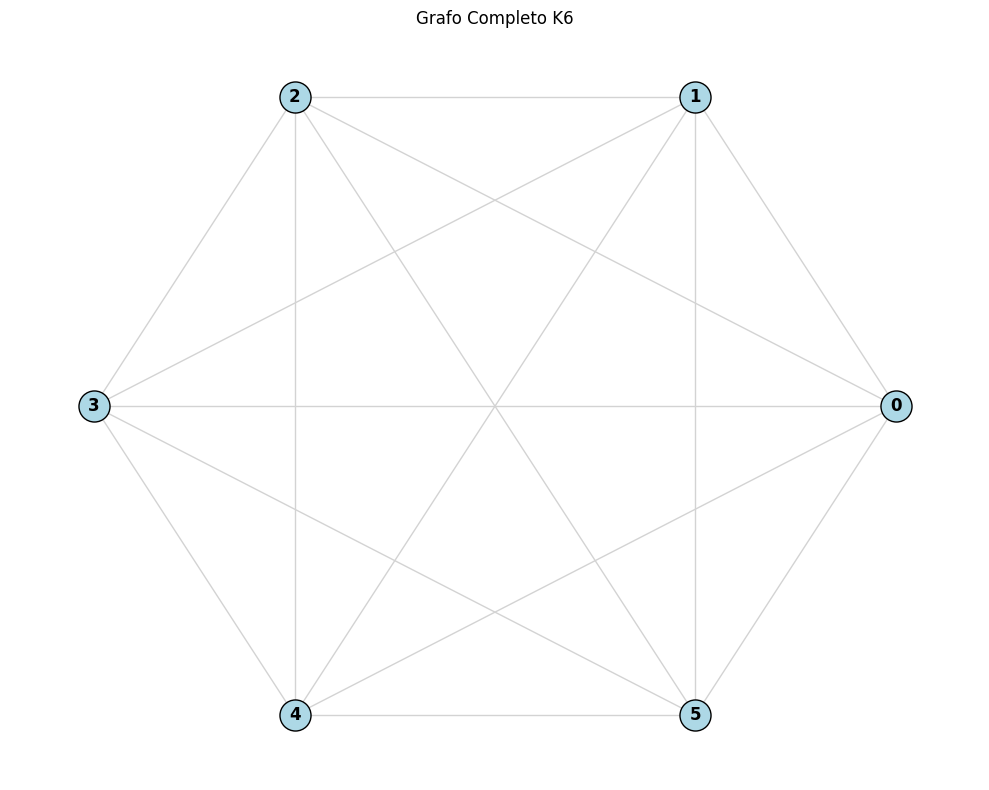

Buscando ciclos hamiltonianos...
Número teórico de ciclos: 60
Número encontrado: 60

=== CICLOS HAMILTONIANOS ENCONTRADOS ===
Total de ciclos únicos: 60

Ciclo  1: 0 → 1 → 2 → 3 → 4 → 5 → 0
Ciclo  2: 0 → 1 → 2 → 3 → 5 → 4 → 0
Ciclo  3: 0 → 1 → 2 → 4 → 3 → 5 → 0
Ciclo  4: 0 → 1 → 2 → 4 → 5 → 3 → 0
Ciclo  5: 0 → 1 → 2 → 5 → 3 → 4 → 0
Ciclo  6: 0 → 1 → 2 → 5 → 4 → 3 → 0
Ciclo  7: 0 → 1 → 3 → 2 → 4 → 5 → 0
Ciclo  8: 0 → 1 → 3 → 2 → 5 → 4 → 0
Ciclo  9: 0 → 1 → 3 → 4 → 2 → 5 → 0
Ciclo 10: 0 → 1 → 3 → 4 → 5 → 2 → 0
Ciclo 11: 0 → 1 → 3 → 5 → 2 → 4 → 0
Ciclo 12: 0 → 1 → 3 → 5 → 4 → 2 → 0
Ciclo 13: 0 → 1 → 4 → 2 → 3 → 5 → 0
Ciclo 14: 0 → 1 → 4 → 2 → 5 → 3 → 0
Ciclo 15: 0 → 1 → 4 → 3 → 2 → 5 → 0
Ciclo 16: 0 → 1 → 4 → 3 → 5 → 2 → 0
Ciclo 17: 0 → 1 → 4 → 5 → 2 → 3 → 0
Ciclo 18: 0 → 1 → 4 → 5 → 3 → 2 → 0
Ciclo 19: 0 → 1 → 5 → 2 → 3 → 4 → 0
Ciclo 20: 0 → 1 → 5 → 2 → 4 → 3 → 0
Ciclo 21: 0 → 1 → 5 → 3 → 2 → 4 → 0
Ciclo 22: 0 → 1 → 5 → 3 → 4 → 2 → 0
Ciclo 23: 0 → 1 → 5 → 4 → 2 → 3 → 0
Ciclo 24: 0 → 1 → 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations
import math

def crear_grafo_completo(n):
    """Crea un grafo completo con n nodos"""
    G = nx.complete_graph(n)
    return G

def encontrar_ciclos_hamiltonianos(n):
    """Encuentra todos los ciclos hamiltonianos únicos en un grafo completo de n nodos"""
    if n < 3:
        return []

    # Para un grafo completo, cualquier permutación de los nodos forma un ciclo hamiltoniano
    # Pero debemos evitar duplicados (ciclos que son rotaciones o inversiones de otros)
    nodos = list(range(n))

    # Fijamos el primer nodo para evitar rotaciones
    primer_nodo = nodos[0]
    resto_nodos = nodos[1:]

    ciclos_unicos = []

    # Generamos todas las permutaciones de los nodos restantes
    for perm in permutations(resto_nodos):
        ciclo = [primer_nodo] + list(perm) + [primer_nodo]  # Añadimos el nodo inicial al final

        # Para evitar ciclos que son inversiones de otros, solo tomamos aquellos
        # donde el segundo nodo es menor que el último (antes de cerrar el ciclo)
        if len(perm) > 1 and perm[0] < perm[-1]:
            ciclos_unicos.append(ciclo)

    return ciclos_unicos

def calcular_numero_ciclos_hamiltonianos(n):
    """Calcula el número total de ciclos hamiltonianos en un grafo completo"""
    if n < 3:
        return 0
    # Fórmula: (n-1)!/2 para grafos no dirigidos
    return math.factorial(n-1) // 2

def visualizar_grafo(G, ciclos=None, mostrar_ciclo=None):
    """Visualiza el grafo completo y opcionalmente resalta un ciclo"""
    plt.figure(figsize=(10, 8))

    # Posiciones de los nodos en círculo para mejor visualización
    pos = nx.circular_layout(G)

    # Dibujar todas las aristas en gris claro
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)

    # Si se especifica un ciclo para mostrar, resaltarlo
    if mostrar_ciclo is not None and ciclos:
        ciclo = ciclos[mostrar_ciclo]
        # Crear aristas del ciclo
        aristas_ciclo = [(ciclo[i], ciclo[i+1]) for i in range(len(ciclo)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=aristas_ciclo,
                              edge_color='red', width=3)

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=500, edgecolors='black')

    # Dibujar etiquetas de nodos
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

    plt.title(f"Grafo Completo K{len(G.nodes)}")
    if mostrar_ciclo is not None:
        plt.title(f"Grafo Completo K{len(G.nodes)} - Ciclo Hamiltoniano #{mostrar_ciclo + 1}")

    plt.axis('off')
    plt.tight_layout()
    plt.show()

def imprimir_ciclos(ciclos):
    """Imprime todos los ciclos hamiltonianos de forma ordenada"""
    print(f"\n=== CICLOS HAMILTONIANOS ENCONTRADOS ===")
    print(f"Total de ciclos únicos: {len(ciclos)}\n")

    for i, ciclo in enumerate(ciclos, 1):
        # Convertir el ciclo a formato legible (sin repetir el último nodo)
        ciclo_str = " → ".join(map(str, ciclo[:-1])) + f" → {ciclo[0]}"
        print(f"Ciclo {i:2d}: {ciclo_str}")

def main():
    print("=== GENERADOR DE GRAFOS COMPLETOS Y CICLOS HAMILTONIANOS ===\n")

    try:
        # Pedir número de nodos
        n = int(input("Ingrese el número de nodos del grafo completo: "))

        if n < 1:
            print("El número de nodos debe ser mayor a 0.")
            return

        if n > 8:
            respuesta = input(f"ADVERTENCIA: Un grafo con {n} nodos tendrá {calcular_numero_ciclos_hamiltonianos(n)} ciclos hamiltonianos. ¿Continuar? (s/n): ")
            if respuesta.lower() != 's':
                return

        # Crear grafo completo
        print(f"\nCreando grafo completo K{n}...")
        G = crear_grafo_completo(n)

        # Visualizar grafo
        print("Mostrando grafo completo...")
        visualizar_grafo(G)

        # Encontrar ciclos hamiltonianos
        if n >= 3:
            print("Buscando ciclos hamiltonianos...")
            ciclos = encontrar_ciclos_hamiltonianos(n)

            # Verificar el número teórico
            num_teorico = calcular_numero_ciclos_hamiltonianos(n)
            print(f"Número teórico de ciclos: {num_teorico}")
            print(f"Número encontrado: {len(ciclos)}")

            # Imprimir todos los ciclos
            imprimir_ciclos(ciclos)

            # Opción para visualizar ciclos específicos
            if len(ciclos) > 0 and len(ciclos) <= 20:  # Solo para grafos pequeños
                while True:
                    try:
                        resp = input(f"\n¿Desea visualizar algún ciclo específico? (1-{len(ciclos)}, 0 para salir): ")
                        num_ciclo = int(resp)

                        if num_ciclo == 0:
                            break
                        elif 1 <= num_ciclo <= len(ciclos):
                            visualizar_grafo(G, ciclos, num_ciclo - 1)
                        else:
                            print(f"Ingrese un número entre 1 y {len(ciclos)}")
                    except ValueError:
                        print("Ingrese un número válido")

        else:
            print(f"Un grafo con {n} nodo(s) no tiene ciclos hamiltonianos (se necesitan al menos 3 nodos).")

    except ValueError:
        print("Por favor, ingrese un número entero válido.")
    except KeyboardInterrupt:
        print("\nPrograma interrumpido por el usuario.")

if __name__ == "__main__":
    main()

--- 1. Condición Necesaria: Vértices de Corte ---


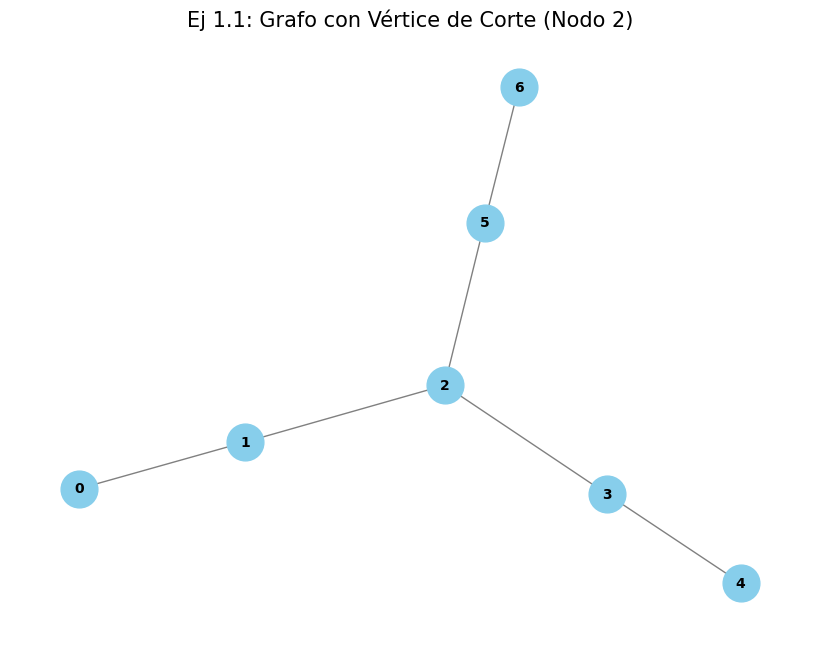


Grafo G_corte: Nodos=[0, 1, 2, 3, 4, 5, 6], Aristas=[(0, 1), (1, 2), (2, 3), (2, 5), (3, 4), (5, 6)]
Vértices de corte en G_corte: [3, 2, 5, 1]
G_corte tiene vértices de corte ([3, 2, 5, 1]) y no es K2. Por lo tanto, NO es Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? False


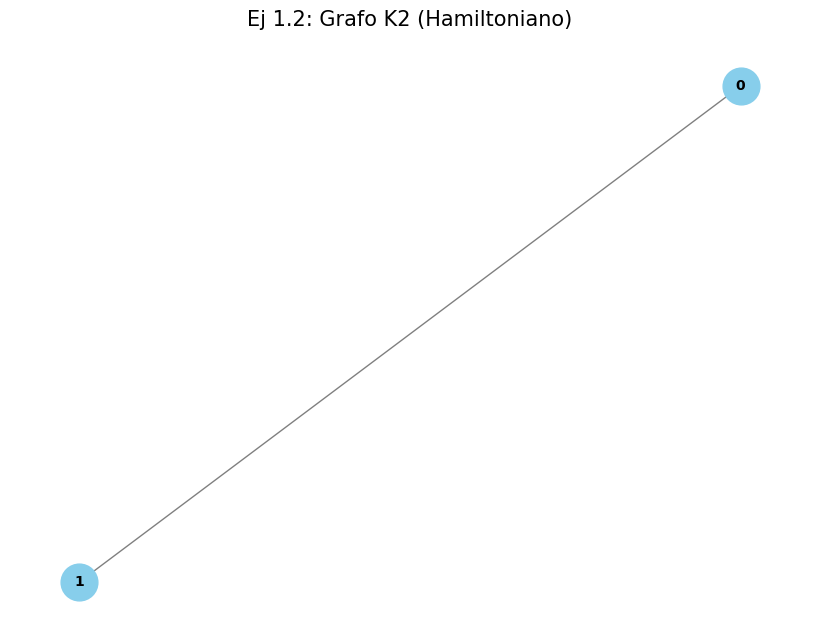


Grafo K2: Nodos=[0, 1], Aristas=[(0, 1)]
Vértices de corte en K2: []
K2 es Hamiltoniano por la excepción de la regla del vértice de corte.
Verificación: ¿Es Hamiltoniano? True


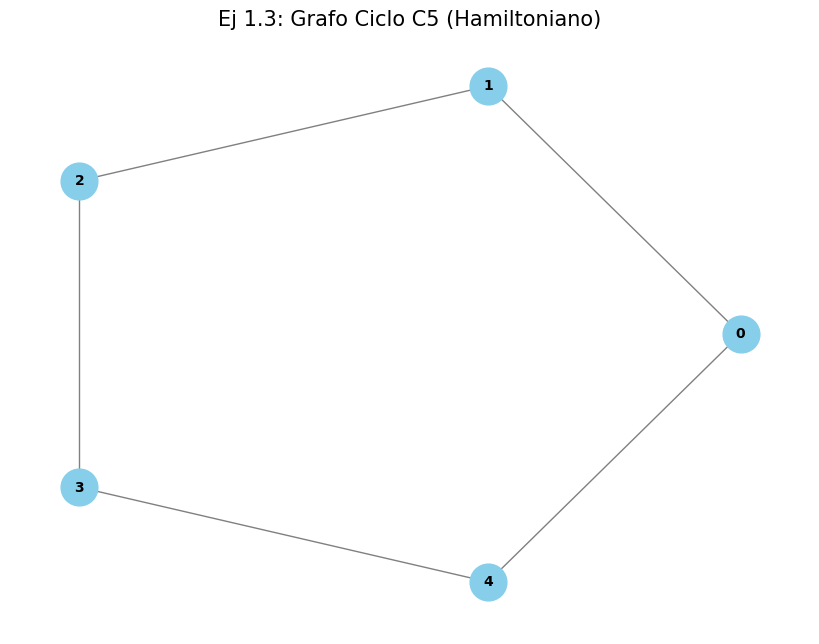


Grafo C5 (Ciclo de 5 nodos): Nodos=[0, 1, 2, 3, 4], Aristas=[(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]
Vértices de corte en C5: []
C5 no tiene vértices de corte (o es K2). Podría ser Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? True


--- 2. Condición Necesaria: Principio de Paridad para Bipartitos ---


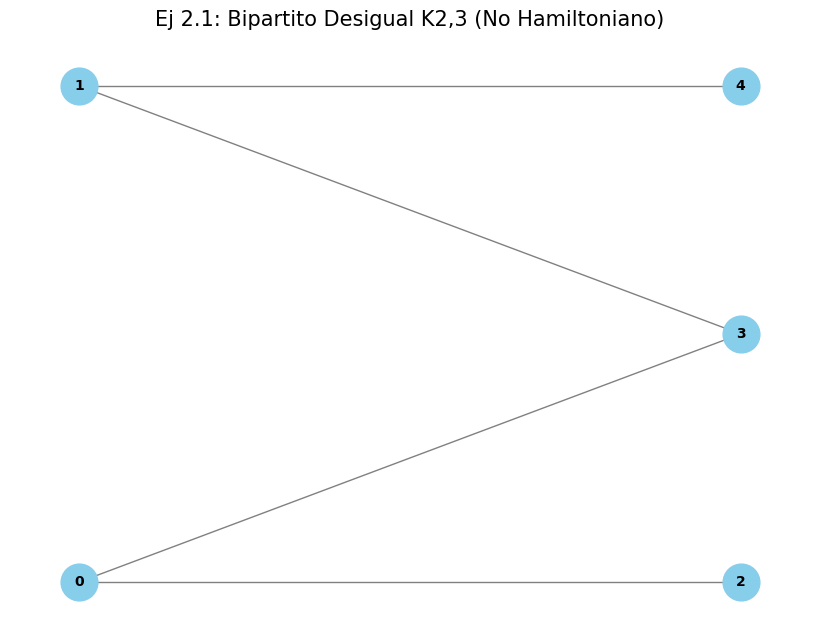


Grafo Bipartito Desigual (K2,3): Nodos=[0, 1, 2, 3, 4], Aristas=[(0, 2), (0, 3), (1, 3), (1, 4)]
Es bipartito. Particiones: X={0, 1}, Y={2, 3, 4}
|X| (2) != |Y| (3). Por lo tanto, NO es Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? False


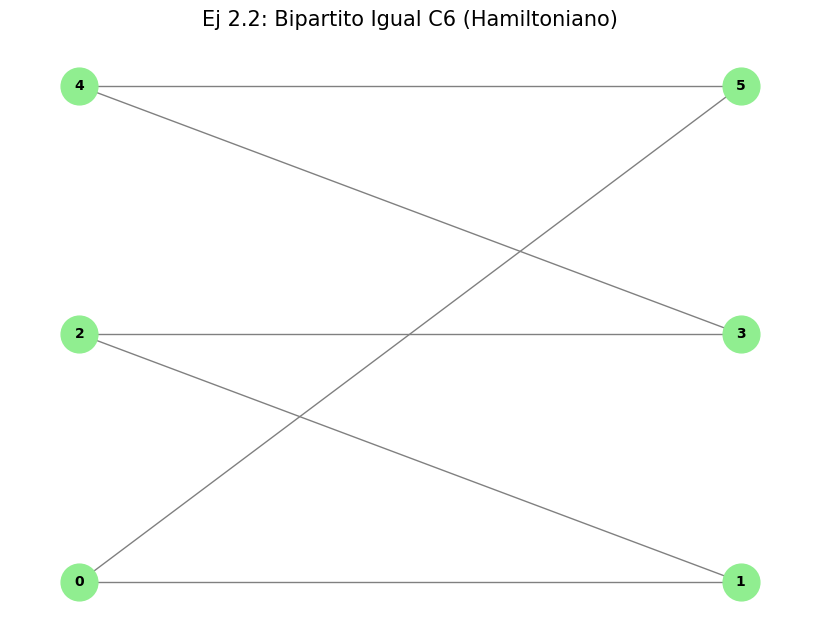


Grafo Bipartito Igual (C6): Nodos=[0, 1, 2, 3, 4, 5], Aristas=[(0, 1), (0, 5), (1, 2), (2, 3), (3, 4), (4, 5)]
Es bipartito. Particiones: X={0, 2, 4}, Y={1, 3, 5}
|X| (3) == |Y| (3). Podría ser Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? True


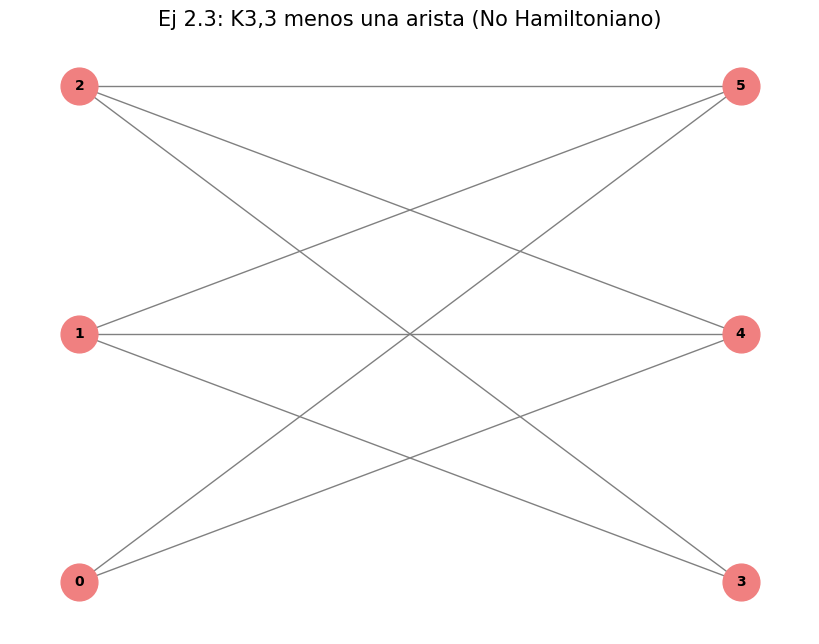


Grafo K3,3 menos una arista: Nodos=[0, 1, 2, 3, 4, 5], Aristas=[(0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5)]
Es bipartito. Particiones: X={0, 1, 2}, Y={3, 4, 5}
|X| (3) == |Y| (3). Podría ser Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? True


--- 3. Propiedades de Familias Específicas ---


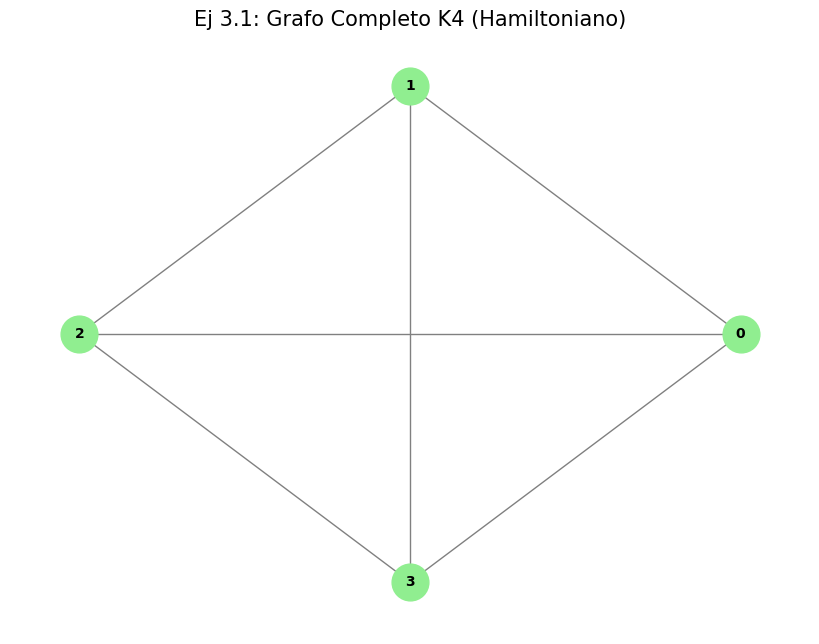


Grafo Completo K4: Nodos=[0, 1, 2, 3], Aristas=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
K4 con n >= 3 es trivialmente Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? True


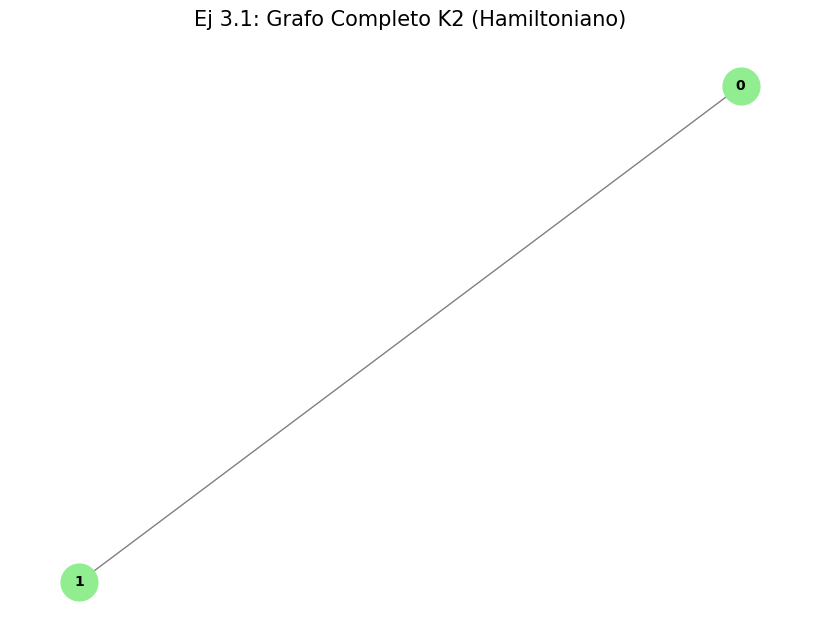


Grafo Completo K2: Nodos=[0, 1], Aristas=[(0, 1)]
K2 es Hamiltoniano (ciclo de longitud 2).
Verificación: ¿Es Hamiltoniano? True


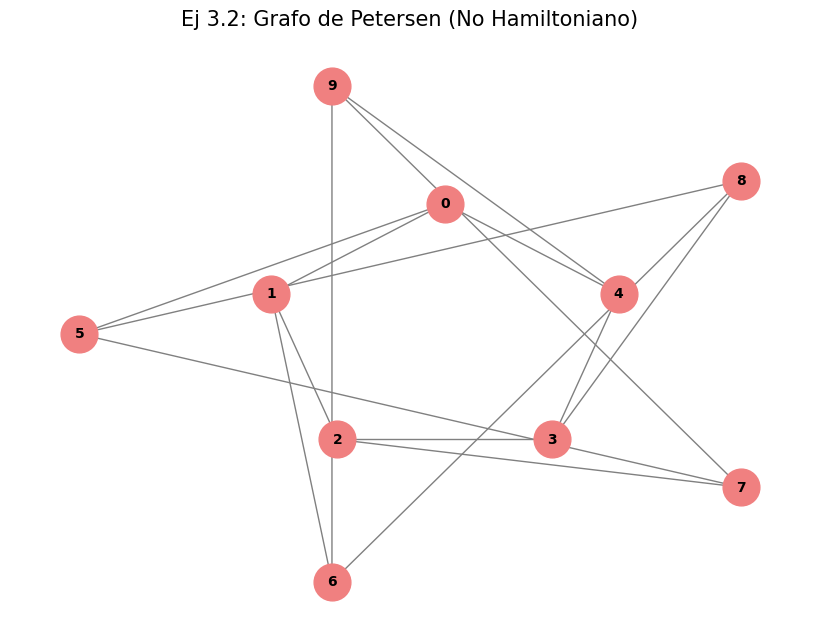


Grafo de Petersen: Nodos=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], Aristas=[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]
El grafo de Petersen es conocido por NO ser Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? False


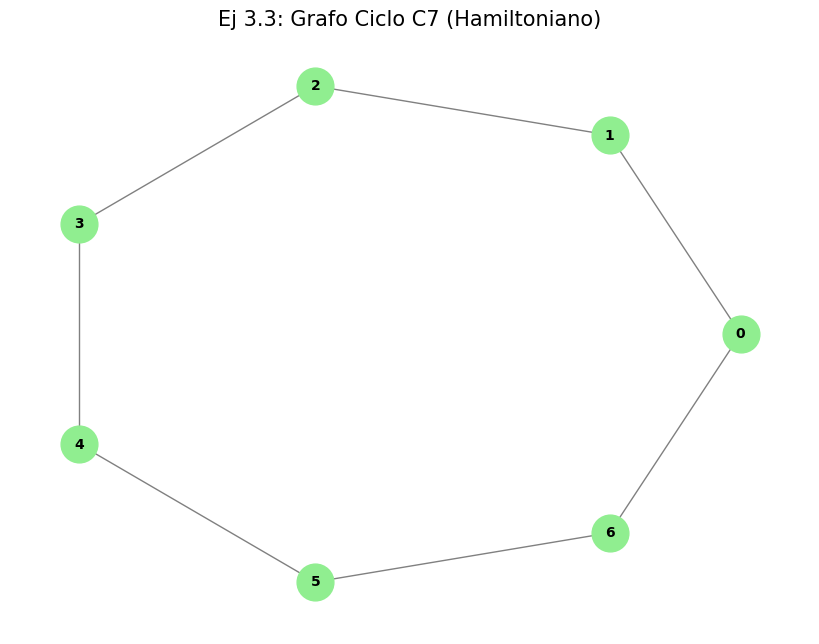


Grafo Ciclo C7: Nodos=[0, 1, 2, 3, 4, 5, 6], Aristas=[(0, 1), (0, 6), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
C7 es trivialmente Hamiltoniano.
Verificación (puede tardar): ¿Es Hamiltoniano? True


--- Resumen ---
Las visualizaciones ayudan a entender la estructura que lleva a estas conclusiones.
Las condiciones necesarias nos ayudan a DESCARTAR la Hamiltonicidad.
Si una condición necesaria NO se cumple, el grafo NO es Hamiltoniano.
Si TODAS las condiciones necesarias conocidas se cumplen, el grafo PODRÍA ser Hamiltoniano.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Función auxiliar para verificar ciclo Hamiltoniano (NP-completo en general) ---
# (Misma función que antes)
def has_hamiltonian_cycle_util(graph, path, visited, start_node):
    current_node = path[-1]
    if len(path) == graph.number_of_nodes():
        if graph.has_edge(current_node, start_node):
            path.append(start_node)
            return True
        else:
            return False
    for neighbor in graph.neighbors(current_node):
        if neighbor not in visited:
            visited.add(neighbor)
            path.append(neighbor)
            if has_hamiltonian_cycle_util(graph, path, visited, start_node):
                return True
            visited.remove(neighbor)
            path.pop()
    return False

def find_hamiltonian_cycle(graph):
    if graph.number_of_nodes() == 0: return None
    if graph.number_of_nodes() < 3:
        if graph.number_of_nodes() == 2 and graph.has_edge(list(graph.nodes())[0], list(graph.nodes())[1]):
             return list(graph.nodes()) + [list(graph.nodes())[0]]
        return None
    for start_node in graph.nodes():
        path = [start_node]
        visited = {start_node}
        if has_hamiltonian_cycle_util(graph, path, visited, start_node):
            return path
    return None

def is_hamiltonian(graph):
    return find_hamiltonian_cycle(graph) is not None

# --- Función auxiliar para visualizar grafos ---
def plot_graph(G, title, layout_func=nx.spring_layout, bipartite_sets_for_layout=None, node_color='skyblue'):
    """Visualiza un grafo con un título y un layout específico."""
    plt.figure(figsize=(8, 6))
    pos = None
    if layout_func == nx.bipartite_layout and bipartite_sets_for_layout:
        # bipartite_layout necesita los nodos de una partición (el primer conjunto)
        pos = layout_func(G, bipartite_sets_for_layout[0])
    elif callable(layout_func): # Verificar si es una función de layout
        pos = layout_func(G)
    else: # Si no, layout_func podría ser un diccionario de posiciones precalculado
        pos = layout_func if layout_func is not None else nx.spring_layout(G)


    nx.draw(G, pos, with_labels=True, node_color=node_color, node_size=700,
            edge_color='gray', font_size=10, font_weight='bold', arrows=False)
    plt.title(title, fontsize=15)
    plt.show()

# --- 1. Condición Necesaria: Vértices de Corte ---
print("--- 1. Condición Necesaria: Vértices de Corte ---")

# Ejemplo 1.1: Grafo con vértice de corte (no K2)
G_corte = nx.Graph()
G_corte.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (2,5), (5,6)]) # Nodo 2 es vértice de corte
plot_graph(G_corte, "Ej 1.1: Grafo con Vértice de Corte (Nodo 2)")
print(f"\nGrafo G_corte: Nodos={G_corte.nodes()}, Aristas={G_corte.edges()}")
art_points_G_corte = list(nx.articulation_points(G_corte))
print(f"Vértices de corte en G_corte: {art_points_G_corte}")

if len(G_corte.nodes()) == 2 and G_corte.number_of_edges() == 1:
    print("G_corte es K2. Es Hamiltoniano.")
elif art_points_G_corte:
    print(f"G_corte tiene vértices de corte ({art_points_G_corte}) y no es K2. Por lo tanto, NO es Hamiltoniano.")
    print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_corte)}")
else:
    print("G_corte no tiene vértices de corte. Podría ser Hamiltoniano.")
    print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_corte)}")


# Ejemplo 1.2: K2 (caso especial)
G_k2 = nx.complete_graph(2)
plot_graph(G_k2, "Ej 1.2: Grafo K2 (Hamiltoniano)", layout_func=nx.circular_layout)
print(f"\nGrafo K2: Nodos={G_k2.nodes()}, Aristas={G_k2.edges()}")
art_points_G_k2 = list(nx.articulation_points(G_k2))
print(f"Vértices de corte en K2: {art_points_G_k2}") # No tiene estrictamente
if len(G_k2.nodes()) == 2 and G_k2.number_of_edges() == 1:
     print("K2 es Hamiltoniano por la excepción de la regla del vértice de corte.")
     print(f"Verificación: ¿Es Hamiltoniano? {is_hamiltonian(G_k2)}")
else:
    print("No es K2.")


# Ejemplo 1.3: Grafo sin vértice de corte que ES Hamiltoniano (Ciclo C5)
G_ciclo5 = nx.cycle_graph(5)
plot_graph(G_ciclo5, "Ej 1.3: Grafo Ciclo C5 (Hamiltoniano)", layout_func=nx.circular_layout)
print(f"\nGrafo C5 (Ciclo de 5 nodos): Nodos={G_ciclo5.nodes()}, Aristas={G_ciclo5.edges()}")
art_points_G_ciclo5 = list(nx.articulation_points(G_ciclo5))
print(f"Vértices de corte en C5: {art_points_G_ciclo5}")
if art_points_G_ciclo5 and not (len(G_ciclo5.nodes()) == 2 and G_ciclo5.number_of_edges() == 1):
    print("C5 tiene vértices de corte. NO es Hamiltoniano.")
else:
    print("C5 no tiene vértices de corte (o es K2). Podría ser Hamiltoniano.")
    print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_ciclo5)}")

# --- 2. Condición Necesaria: Principio de Paridad para Bipartitos ---
print("\n\n--- 2. Condición Necesaria: Principio de Paridad para Bipartitos ---")

# Ejemplo 2.1: Grafo bipartito con |X| != |Y|
G_bipartito_desigual = nx.Graph()
X_nodes_bd = {0, 1} # Usar nombres diferentes para evitar colisiones
Y_nodes_bd = {2, 3, 4}
G_bipartito_desigual.add_nodes_from(X_nodes_bd, bipartite=0)
G_bipartito_desigual.add_nodes_from(Y_nodes_bd, bipartite=1)
G_bipartito_desigual.add_edges_from([(0,2), (0,3), (1,3), (1,4)]) # K2,3
bipartite_sets_bd = (X_nodes_bd, Y_nodes_bd) # Guardar para el layout
plot_graph(G_bipartito_desigual, "Ej 2.1: Bipartito Desigual K2,3 (No Hamiltoniano)",
             layout_func=nx.bipartite_layout, bipartite_sets_for_layout=bipartite_sets_bd)
print(f"\nGrafo Bipartito Desigual (K2,3): Nodos={G_bipartito_desigual.nodes()}, Aristas={G_bipartito_desigual.edges()}")

if nx.is_bipartite(G_bipartito_desigual):
    X, Y = nx.bipartite.sets(G_bipartito_desigual) # networkx las encontrará
    print(f"Es bipartito. Particiones: X={X}, Y={Y}")
    if len(X) == len(Y):
        print(f"|X| ({len(X)}) == |Y| ({len(Y)}). Podría ser Hamiltoniano.")
        print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_bipartito_desigual)}")
    else:
        print(f"|X| ({len(X)}) != |Y| ({len(Y)}). Por lo tanto, NO es Hamiltoniano.")
        print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_bipartito_desigual)}")
else:
    print("No es bipartito.")

# Ejemplo 2.2: Grafo bipartito con |X| == |Y| (que es Hamiltoniano)
G_bipartito_igual_H = nx.cycle_graph(6) # C6 es bipartito y Hamiltoniano
X_bih, Y_bih = nx.bipartite.sets(G_bipartito_igual_H)
bipartite_sets_bih = (X_bih, Y_bih)
plot_graph(G_bipartito_igual_H, "Ej 2.2: Bipartito Igual C6 (Hamiltoniano)",
             layout_func=nx.bipartite_layout, bipartite_sets_for_layout=bipartite_sets_bih, node_color='lightgreen')
print(f"\nGrafo Bipartito Igual (C6): Nodos={G_bipartito_igual_H.nodes()}, Aristas={G_bipartito_igual_H.edges()}")
if nx.is_bipartite(G_bipartito_igual_H):
    X, Y = nx.bipartite.sets(G_bipartito_igual_H)
    print(f"Es bipartito. Particiones: X={X}, Y={Y}")
    if len(X) == len(Y):
        print(f"|X| ({len(X)}) == |Y| ({len(Y)}). Podría ser Hamiltoniano.")
        print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_bipartito_igual_H)}")
    else:
        print(f"|X| ({len(X)}) != |Y| ({len(Y)}). NO es Hamiltoniano.")
else:
    print("No es bipartito.")

# Ejemplo 2.3: Grafo bipartito con |X| == |Y| (que NO es Hamiltoniano)
G_k33_minus_edge = nx.complete_bipartite_graph(3,3)
# Nodos 0,1,2 en una partición y 3,4,5 en la otra por defecto en complete_bipartite_graph
# (es importante saberlo para el layout bipartito)
if (0,3) in G_k33_minus_edge.edges(): # Asegurar que la arista existe antes de removerla
    G_k33_minus_edge.remove_edge(0,3)
else: # Si la arista (0,3) no existe (por ej. si los nodos son 1-indexados o diferentes)
      # intentamos con la primera arista que conecte las particiones
    found_edge_to_remove = False
    for u, v in G_k33_minus_edge.edges():
        if (u < 3 and v >= 3) or (u >=3 and v < 3): # asume particiones [0,2] y [3,5]
            G_k33_minus_edge.remove_edge(u,v)
            print(f"Se removió la arista ({u},{v}) de K3,3 para el ejemplo.")
            found_edge_to_remove = True
            break
    if not found_edge_to_remove:
         print("No se pudo remover una arista de K3,3 como se esperaba.")

X_k33m = {n for n in G_k33_minus_edge.nodes() if n < 3} # Asumiendo nodos de 0 a 5
Y_k33m = {n for n in G_k33_minus_edge.nodes() if n >= 3}
bipartite_sets_k33m = (X_k33m, Y_k33m)
plot_graph(G_k33_minus_edge, "Ej 2.3: K3,3 menos una arista (No Hamiltoniano)",
             layout_func=nx.bipartite_layout, bipartite_sets_for_layout=bipartite_sets_k33m, node_color='lightcoral')
print(f"\nGrafo K3,3 menos una arista: Nodos={G_k33_minus_edge.nodes()}, Aristas={G_k33_minus_edge.edges()}")

if nx.is_bipartite(G_k33_minus_edge):
    X, Y = nx.bipartite.sets(G_k33_minus_edge)
    print(f"Es bipartito. Particiones: X={X}, Y={Y}")
    if len(X) == len(Y):
        print(f"|X| ({len(X)}) == |Y| ({len(Y)}). Podría ser Hamiltoniano.")
        print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_k33_minus_edge)}")
    else:
        print(f"|X| ({len(X)}) != |Y| ({len(Y)}). NO es Hamiltoniano.")
else:
    print("No es bipartito.")


# --- 3. Propiedades de Familias Específicas ---
print("\n\n--- 3. Propiedades de Familias Específicas ---")

# Ejemplo 3.1: Grafos Completos Kn (n >= 3)
G_k4 = nx.complete_graph(4)
plot_graph(G_k4, "Ej 3.1: Grafo Completo K4 (Hamiltoniano)", layout_func=nx.circular_layout, node_color='lightgreen')
print(f"\nGrafo Completo K4: Nodos={G_k4.nodes()}, Aristas={G_k4.edges()}")
n_k4 = len(G_k4.nodes())
if n_k4 >= 3:
    print(f"K{n_k4} con n >= 3 es trivialmente Hamiltoniano.")
    print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_k4)}")
else:
    print(f"K{n_k4} con n < 3.")

G_k2_fam = nx.complete_graph(2)
plot_graph(G_k2_fam, "Ej 3.1: Grafo Completo K2 (Hamiltoniano)", layout_func=nx.circular_layout, node_color='lightgreen')
print(f"\nGrafo Completo K2: Nodos={G_k2_fam.nodes()}, Aristas={G_k2_fam.edges()}")
n_k2 = len(G_k2_fam.nodes())
if n_k2 >= 3:
    print(f"K{n_k2} es Hamiltoniano.")
elif n_k2 == 2:
    print(f"K{n_k2} es Hamiltoniano (ciclo de longitud 2).")
    print(f"Verificación: ¿Es Hamiltoniano? {is_hamiltonian(G_k2_fam)}")
else:
    print(f"K{n_k2} no es Hamiltoniano.")

# Ejemplo 3.2: Grafo de Petersen (conocido por NO ser Hamiltoniano)
G_petersen = nx.petersen_graph()
# El layout 'shell' suele funcionar bien para el Petersen, o el 'kamada_kawai'
plot_graph(G_petersen, "Ej 3.2: Grafo de Petersen (No Hamiltoniano)", layout_func=nx.shell_layout(G_petersen, nlist=[range(5), range(5, 10)]), node_color='lightcoral')
print(f"\nGrafo de Petersen: Nodos={G_petersen.nodes()}, Aristas={G_petersen.edges()}")
print("El grafo de Petersen es conocido por NO ser Hamiltoniano.")
print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_petersen)}")

# Ejemplo 3.3: Grafos Ciclo Cn (n >= 3)
G_c7 = nx.cycle_graph(7)
plot_graph(G_c7, "Ej 3.3: Grafo Ciclo C7 (Hamiltoniano)", layout_func=nx.circular_layout, node_color='lightgreen')
print(f"\nGrafo Ciclo C7: Nodos={G_c7.nodes()}, Aristas={G_c7.edges()}")
n_c7 = len(G_c7.nodes())
if n_c7 >= 3:
    print(f"C{n_c7} es trivialmente Hamiltoniano.")
    print(f"Verificación (puede tardar): ¿Es Hamiltoniano? {is_hamiltonian(G_c7)}")
else:
    print(f"C{n_c7} (n<3) no se considera estándar para Hamiltonicidad.")


print("\n\n--- Resumen ---")
print("Las visualizaciones ayudan a entender la estructura que lleva a estas conclusiones.")
print("Las condiciones necesarias nos ayudan a DESCARTAR la Hamiltonicidad.")
print("Si una condición necesaria NO se cumple, el grafo NO es Hamiltoniano.")
print("Si TODAS las condiciones necesarias conocidas se cumplen, el grafo PODRÍA ser Hamiltoniano.")

In [ ]:
from IPython.display import display, HTML

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>El Problema del Viajante de Comercio (TSP): Un Análisis Profundo</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Source+Code+Pro&display=swap" rel="stylesheet">

  <!-- Configuración y carga de MathJax v2 (como en los ejemplos aprendidos) -->
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['$$','$$'], ['\\[','\\]']]
      }
    });
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>

  <style>
    :root {
      --bg-color: #ffffff;
      --text-color: #212529;
      --header-color: #005a9c;
      --accent-color: #007bff;
      --accent-hover-color: #0056b3;
      --button-bg: #007bff;
      --button-hover-bg: #0056b3;
      --button-text-color: white;
      --section-border-color: #e0e0e0;
      --code-bg-color: #f8f9fa; /* Aunque no haya bloques <pre>, mantenemos por consistencia */
      --keyword-color: #d9534f;
      --theorem-bg-color: #e9ecef;
      --theme-button-bg: #6c757d;
      --theme-button-hover-bg: #5a6268;

      /* Dark Mode Variables */
      --bg-color-dark: #22272e;
      --text-color-dark: #c9d1d9;
      --header-color-dark: #58a6ff;
      --accent-color-dark: #58a6ff;
      --accent-hover-color-dark: #388bfd;
      --button-bg-dark: #3081f7;
      --button-hover-bg-dark: #1f6feb;
      --section-border-color-dark: #444c56;
      --code-bg-color-dark: #2d333b;
      --keyword-color-dark: #ff7b72;
      --theorem-bg-color-dark: #343a40;
      --theme-button-bg-dark: #f8f9fa;
      --theme-button-text-dark: #22272e;
      --theme-button-hover-bg-dark: #e2e6ea;
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      margin: 0;
      padding: 20px;
    }

    .container {
      max-width: 1000px;
      margin: auto;
      padding: 30px;
      background-color: var(--bg-color);
      box-shadow: 0 5px 20px rgba(0,0,0,0.07);
      border-radius: 10px;
      position: relative;
      transition: background-color 0.3s;
    }

    body.dark-mode {
      --bg-color: var(--bg-color-dark);
      --text-color: var(--text-color-dark);
      --header-color: var(--header-color-dark);
      --accent-color: var(--accent-color-dark);
      --accent-hover-color: var(--accent-hover-color-dark);
      --button-bg: var(--button-bg-dark);
      --button-hover-bg: var(--button-hover-bg-dark);
      --section-border-color: var(--section-border-color-dark);
      --code-bg-color: var(--code-bg-color-dark);
      --keyword-color: var(--keyword-color-dark);
      --theorem-bg-color: var(--theorem-bg-color-dark);
      --theme-button-bg: var(--theme-button-bg-dark);
      --theme-button-hover-bg: var(--theme-button-hover-bg-dark);
    }

    body.dark-mode .container {
        box-shadow: 0 5px 25px rgba(0,0,0,0.25);
    }

    body.dark-mode .theme-toggle {
        color: var(--theme-button-text-dark);
    }
    /* MathJax color en modo oscuro (si es necesario) */
    body.dark-mode .MathJax_Display, body.dark-mode .MathJax {
        color: var(--text-color-dark) !important;
    }
    .MathJax_Display, .MathJax { /* Asegurar color por defecto en Colab */
        color: var(--text-color) !important;
        transition: color 0.3s;
    }


    h1, h2, h3, h4 {
      margin-top: 1.8em;
      margin-bottom: 1em;
      color: var(--header-color);
      font-weight: 700;
    }
    h1 {
      font-size: 2.2em; /* Ajustado para Colab */
      text-align: center;
      border-bottom: 3px solid var(--accent-color);
      padding-bottom: 15px;
    }
    h2 {
      font-size: 1.8em; /* Ajustado para Colab */
      color: var(--accent-color);
      margin-top: 30px;
      padding-bottom: 5px;
      border-bottom: 1px solid var(--section-border-color);
    }
    h3 {
      font-size: 1.4em; /* Ajustado para Colab */
      margin-top: 25px;
    }

    strong { /* Ajustamos strong para que sea consistente con .keyword si se usa así */
        color: var(--keyword-color);
        font-weight: bold;
    }

    .section-content {
      display: none;
      padding: 15px;
      margin-top: 5px;
      border-left: 3px solid var(--accent-color);
      background-color: var(--code-bg-color);
      margin-bottom: 10px;
      border-radius: 0 5px 5px 0;
    }
    .section-content.is-visible {
      display: block;
    }

    .toggle-button {
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px; /* Ajustado */
      border-radius: 6px;
      cursor: pointer;
      margin-top: 15px;
      margin-bottom: 5px; /* Añadido */
      transition: background-color 0.2s ease-in-out, transform 0.1s ease;
      width: 100%;
      text-align: left;
      font-size: 1.1em; /* Ajustado */
      font-weight: 700;
    }
    .toggle-button:hover {
      background-color: var(--button-hover-bg);
      transform: translateY(-1px); /* Sutil */
    }
     .toggle-button:active {
      transform: translateY(0px);
    }
    .toggle-button::after {
        content: ' ▼';
        float: right;
        transition: transform 0.2s ease-in-out;
        font-size: 0.8em;
        line-height: inherit;
    }
    .toggle-button[aria-expanded="true"]::after {
        transform: rotate(180deg);
    }

    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 10px 15px;
      border-radius: 25px;
      cursor: pointer;
      position: fixed;
      top: 20px; /* Ajustado */
      right: 20px; /* Ajustado */
      font-size: 0.9em; /* Ajustado */
      transition: background-color 0.3s, color 0.3s, transform 0.2s;
      z-index: 1000;
      box-shadow: 0 2px 6px rgba(0,0,0,0.15); /* Sutil */
    }
    .theme-toggle:hover {
        background-color: var(--theme-button-hover-bg);
        transform: scale(1.05);
    }

    button:focus-visible, a:focus-visible {
      outline: 3px solid var(--accent-color);
      outline-offset: 2px;
    }
    body.dark-mode button:focus-visible, body.dark-mode a:focus-visible {
      outline-color: var(--accent-color-dark);
    }

    ul, ol {
      padding-left: 30px;
    }
    li {
      margin-bottom: 0.8em; /* Ajustado */
    }
    p {
        margin-bottom: 1em;
    }
  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1>El Problema del Viajante de Comercio (TSP): Un Análisis Profundo</h1>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-intro">
      I. Introducción y Definición del Problema
    </button>
    <div id="section-intro" class="section-content">
        <p>El Problema del Viajante de Comercio (TSP) es uno de los problemas de optimización combinatoria más célebres y estudiados en matemáticas, ciencias de la computación e investigación de operaciones. Su planteamiento, engañosamente simple, esconde una profunda complejidad computacional que ha fascinado a investigadores durante décadas.</p>

        <p><strong>Definición Formal:</strong><br>
        Dado un conjunto finito de ciudades (o nodos) y las distancias (o costos de viaje) entre cada par de ellas, el TSP consiste en encontrar el <strong>recorrido más corto (o de mínimo costo) que visite cada ciudad exactamente una vez y regrese al punto de partida.</strong></p>

        <p>Este "recorrido" se conoce como un <strong>tour</strong> o <strong>circuito Hamiltoniano</strong>. El objetivo es minimizar la distancia total recorrida o el costo total del tour. El nombre "viajante de comercio" evoca la imagen de un vendedor que debe visitar una lista de clientes en diferentes ciudades y desea hacerlo de la manera más eficiente posible. Como se menciona en el prefacio del libro que me pasaste, el TSP tiene una "larga historia de capturar investigadores", y su atractivo radica en la facilidad para entenderlo frente a la enorme dificultad para resolverlo de forma general y eficiente.</p>

        <p>El origen del nombre es algo incierto, como se detalla en el Capítulo 1 del libro, pero parece haber surgido en la comunidad matemática de Princeton en los años 30 o 40, posiblemente a partir del "Problema de los 48 Estados" de Hassler Whitney. Figuras como Merrill Flood fueron cruciales en su popularización. Curiosamente, el libro menciona referencias históricas que datan de 1832 (un manual alemán para viajantes) e incluso "otros viajeros" como jueces de circuito (Abraham Lincoln), predicadores, y hasta los caballeros en el ajedrez (problema del recorrido del caballo de Euler), que enfrentaban problemas conceptualmente similares de encontrar rutas eficientes.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-grafos">
      II. Relación con la Teoría de Grafos
    </button>
    <div id="section-grafos" class="section-content">
        <p>El TSP se modela naturalmente utilizando la teoría de grafos:</p>
        <ol>
            <li><strong>Grafo Completo Ponderado:</strong> Las ciudades se representan como <strong>vértices</strong> (o nodos) de un grafo. Dado que se asume que es posible viajar directamente entre cualquier par de ciudades, el problema se modela usualmente sobre un <strong>grafo completo</strong> ($K_n$), donde $n$ es el número de ciudades. Cada <strong>arista</strong> \(\{v_i, v_j\}\) entre dos vértices $v_i$ y $v_j$ representa la ruta directa entre la ciudad $i$ y la ciudad $j$.</li>
            <li><strong>Pesos en las Aristas:</strong> A cada arista se le asigna un <strong>peso</strong> (o costo), que corresponde a la distancia, tiempo de viaje, o costo monetario de viajar entre las dos ciudades que conecta. Este peso es lo que el libro denomina "costo de viaje entre cada par".</li>
            <li><strong>Ciclo Hamiltoniano:</strong> Un tour que visita cada ciudad exactamente una vez y regresa al punto de partida es, en términos de teoría de grafos, un <strong>ciclo Hamiltoniano</strong>. Un ciclo Hamiltoniano es un ciclo en el grafo que pasa por cada vértice exactamente una vez.</li>
            <li><strong>Objetivo:</strong> El TSP busca el <strong>ciclo Hamiltoniano de peso (o costo) total mínimo</strong> en este grafo completo ponderado.</li>
        </ol>
            </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-dificultad">
      III. La Dificultad del TSP: NP-Completitud
    </button>
    <div id="section-dificultad" class="section-content">
        <p>El TSP es famoso por ser un problema computacionalmente "difícil".</p>
        <ol>
            <li><strong>Explosión Combinatoria:</strong> El número de posibles tours en un grafo de $n$ ciudades es \(\frac{(n-1)!}{2}\). (Se elige un punto de partida, hay $(n-1)!$ permutaciones para el resto, y se divide por 2 porque cada tour puede recorrerse en dos direcciones). Esta cantidad crece de forma factorial, lo que hace inviable la búsqueda exhaustiva (fuerza bruta) incluso para un número moderado de ciudades. Por ejemplo, para 20 ciudades, hay aproximadamente $1.2 \times 10^{18}$ tours.</li>
            <li><strong>Clases de Complejidad Computacional:</strong> Para entender formalmente la dificultad, recurrimos a la teoría de la complejidad:
                <ul>
                    <li><strong>Clase P (Polinomial):</strong> Problemas que pueden ser resueltos por un algoritmo determinista en tiempo polinomial con respecto al tamaño de la entrada. Se consideran computacionalmente "fáciles" o "tratables".</li>
                    <li><strong>Clase NP (No determinista Polinomial):</strong> Problemas para los cuales una solución candidata puede ser <em>verificada</em> en tiempo polinomial. Muchos problemas difíciles están en NP. El TSP pertenece a esta clase: dado un tour, es fácil verificar si visita todas las ciudades y calcular su costo total en tiempo polinomial.</li>
                    <li><strong>P vs. NP:</strong> Una de las preguntas abiertas más importantes en ciencias de la computación es si P = NP. Es decir, si todo problema cuya solución puede ser verificada rápidamente también puede ser resuelto rápidamente. La mayoría de los científicos creen que P $\neq$ NP.</li>
                    <li><strong>NP-Completo:</strong> Son los problemas "más difíciles" dentro de la clase NP. Si se encontrara un algoritmo de tiempo polinomial para <em>cualquier</em> problema NP-Completo, entonces todos los problemas en NP podrían resolverse en tiempo polinomial (implicando P = NP).</li>
                    <li><strong>NP-Difícil (NP-Hard):</strong> Un problema es NP-Difícil si es <em>al menos</em> tan difícil como cualquier problema NP-Completo. No necesariamente tiene que estar en NP (es decir, su verificación no es necesariamente polinomial). <strong>El TSP (en su versión de optimización) es NP-Difícil.</strong> Su versión de decisión ("¿existe un tour con costo menor o igual a K?") es NP-Completa.</li>
                </ul>
            </li>
            <li><strong>¿Qué significa que el TSP sea NP-Difícil?</strong><br>
            Significa que, asumiendo que P $\neq$ NP (la conjetura más aceptada), <strong>no existe un algoritmo que pueda encontrar la solución óptima garantizada para el TSP en tiempo polinomial</strong> para todas las posibles instancias. A medida que el número de ciudades $n$ crece, el tiempo requerido por cualquier algoritmo exacto conocido crece exponencialmente (o peor), volviéndose prohibitivo para instancias grandes. Esto no implica que no se puedan resolver instancias específicas, incluso grandes, sino que no hay un método universalmente eficiente.</li>
        </ol>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-algoritmos">
      IV. Algoritmos de Solución
    </button>
    <div id="section-algoritmos" class="section-content">
        <p>Dada la dificultad del TSP, se han desarrollado dos grandes categorías de algoritmos:</p>

        <h3>A. Algoritmos Exactos:</h3>
        <p>Buscan encontrar la solución óptima garantizada. Son factibles solo para instancias de tamaño moderado o con estructuras especiales. El libro dedica varios capítulos a estas técnicas, especialmente las basadas en programación lineal.</p>
        <ol>
            <li><strong>Fuerza Bruta:</strong> Enumerar todos los \(\frac{(n-1)!}{2}\) tours posibles y elegir el más corto. Inviable excepto para $n$ muy pequeño.</li>
            <li><strong>Programación Dinámica:</strong> El libro menciona en el Capítulo 4 el algoritmo de Held-Karp, el cual resuelve el problema en tiempo $O(n^2 2^n)$. Fue un gran avance teórico y práctico en su momento, permitiendo resolver instancias de hasta unas 15-20 ciudades. Sigue siendo la mejor complejidad teórica conocida para el TSP general.</li>
            <li><strong>Ramificación y Acotación (Branch-and-Bound):</strong> Es una técnica de búsqueda inteligente que explora el espacio de soluciones de forma arborescente. En cada nodo del árbol, se calcula una cota inferior del costo de cualquier tour que pueda obtenerse a partir de ese nodo. Si la cota es peor que la mejor solución encontrada hasta el momento, esa rama del árbol se "poda". El libro menciona en el Capítulo 4 sus orígenes en el contexto del TSP.</li>
            <li><strong>Planos de Corte (Cutting Planes) y Ramificación y Corte (Branch-and-Cut):</strong> Este es el enfoque más exitoso para resolver instancias grandes del TSP a la optimalidad. El libro describe en el Capítulo 3 el método fundamental de Dantzig, Fulkerson y Johnson y también menciona en los Capítulos 1 y 16 el código moderno Concorde, basado en estas ideas.
                <ul>
                    <li><strong>Relajación de Programación Lineal (LP):</strong> El TSP se formula como un problema de programación lineal entera. Se relaja la restricción de integralidad, obteniendo un problema de PL que da una cota inferior al óptimo del TSP.</li>
                    <li><strong>Planos de Corte:</strong> La solución de la relajación LP puede no ser un tour válido (ej., puede tener subtours o valores fraccionales). Se añaden desigualdades válidas (planos de corte), como las de eliminación de subtours (SEC) o las desigualdades de peine (comb inequalities), que son satisfechas por todos los tours válidos pero violadas por la solución LP actual. Esto "corta" la solución fraccional y acerca la cota inferior al óptimo entero. El libro dedica los Capítulos 5-11 a diferentes familias de planos de corte.</li>
                    <li><strong>Ramificación y Corte (Branch-and-Cut):</strong> Si después de añadir planos de corte la solución sigue siendo fraccional, se recurre a la ramificación (branching) sobre una variable fraccional, creando dos subproblemas (ej., una arista está en el tour, o no lo está). Este proceso se combina con la generación de planos de corte en cada nodo del árbol de ramificación y acotación. Es la técnica detrás de la solución de instancias con decenas de miles de ciudades (como el "Sweden TSP" con 24,978 ciudades o el "World TSP" con 1,904,711 ciudades, que el libro menciona como grandes desafíos).</li>
                </ul>
            </li>
        </ol>

        <h3>B. Algoritmos Heurísticos y de Aproximación:</h3>
        <p>Buscan encontrar soluciones de "buena calidad" (cercanas al óptimo) en un tiempo computacional razonable, pero sin garantía de optimalidad. Son esenciales para instancias muy grandes o cuando se necesita una solución rápida. El libro trata en el Capítulo 15 sobre la búsqueda de tours.</p>
        <ol>
            <li><strong>Heurísticas Constructivas:</strong> Construyen un tour paso a paso.
                <ul>
                    <li><strong>Vecino Más Cercano (Nearest Neighbor):</strong> Desde una ciudad, ir a la ciudad no visitada más cercana, hasta completar el tour. Simple pero a menudo produce soluciones pobres.</li>
                    <li><strong>Algoritmos de Inserción (Insertion Heuristics):</strong> Comenzar con un subtour pequeño e ir insertando las ciudades restantes en la posición que minimice el incremento de costo (ej. Farthest Insertion, Cheapest Insertion).</li>
                </ul>
            </li>
            <li><strong>Heurísticas de Mejora Local (Local Search):</strong> Comienzan con un tour inicial (quizás aleatorio o de una heurística constructiva) y tratan de mejorarlo mediante pequeñas modificaciones locales.
                <ul>
                    <li><strong>k-opt (ej. 2-opt, 3-opt):</strong> Se eliminan $k$ aristas del tour actual y se reconectan los $k$ fragmentos de manera diferente para formar un nuevo tour. Si el nuevo tour es más corto, se acepta. El libro menciona el algoritmo de Lin-Kernighan (LKH) en los Capítulos 4 y 15 como una sofisticada variante de k-opt variable que es extremadamente efectiva y es un estándar en la heurística para el TSP.</li>
                </ul>
            </li>
            <li><strong>Metaheurísticas:</strong> Estrategias de alto nivel que guían a las heurísticas de búsqueda local para escapar de óptimos locales y explorar más ampliamente el espacio de soluciones.
                <ul>
                    <li><strong>Recocido Simulado (Simulated Annealing):</strong> Inspirado en el proceso de enfriamiento de metales, permite movimientos que empeoran la solución actual con cierta probabilidad, la cual disminuye a medida que la "temperatura" del sistema baja.</li>
                    <li><strong>Algoritmos Genéticos (Genetic Algorithms):</strong> Mantienen una "población" de tours, combinándolos (crossover) y mutándolos para generar nuevos tours, seleccionando los mejores para la siguiente generación.</li>
                    <li><strong>Colonia de Hormigas (Ant Colony Optimization):</strong> Inspirado en cómo las hormigas encuentran caminos cortos mediante feromonas.</li>
                    <li><strong>Búsqueda Tabú (Tabu Search):</strong> Evita volver a soluciones recientemente visitadas para no ciclar.</li>
                </ul>
            </li>
        </ol>
        <p>El libro ("The Traveling Salesman Problem" de Applegate, Bixby, Chvátal, Cook) es una referencia fundamental precisamente porque sus autores desarrollaron <strong>Concorde</strong>, el código más potente para resolver el TSP de forma exacta, utilizando técnicas de Branch-and-Cut muy sofisticadas.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-aplicaciones">
      V. Aplicaciones Reales (y Orígenes Históricos)
    </button>
    <div id="section-aplicaciones" class="section-content">
        <p>Aunque el nombre sugiere solo logística de ventas, el TSP y sus variantes tienen una vasta gama de aplicaciones, muchas de las cuales el libro menciona o se infieren de su índice y capítulos:</p>
        <ul>
            <li><strong>Logística y Transporte:</strong> Rutas de vehículos, entregas de paquetería, recolección de basura, planificación de autobuses escolares (mencionado por Flood).</li>
            <li><strong>Fabricación:</strong>
                <ul>
                    <li>Perforación de circuitos impresos (PCBs): Minimizar el movimiento del cabezal de la perforadora (el libro menciona <code>pcb442</code> en TSPLIB como un ejemplo).</li>
                    <li>Secuenciación de trabajos en máquinas.</li>
                    <li>Guía de láseres en arte con cristal (el libro menciona el ejemplo de <code>pla85900</code> en este contexto).</li>
                </ul>
            </li>
            <li><strong>Genómica y Bioinformática:</strong>
                <ul>
                    <li>Ordenamiento de fragmentos de ADN en la secuenciación del genoma (el libro detalla en el Capítulo 2 aplicaciones como Genome Sequencing y Radiation Hybrid Mapping).</li>
                    <li>Construcción de mapas genéticos.</li>
                </ul>
            </li>
            <li><strong>Astronomía:</strong> Planificación de la secuencia de observaciones de un telescopio para minimizar el tiempo de reorientación (el libro también cubre en el Capítulo 2 la planificación de telescopios, bajo "Aiming Telescopes and X-Rays").</li>
            <li><strong>Diseño de Chips (VLSI):</strong> Optimización del trazado de conexiones, problemas de "scan chains" (Capítulo 2 del libro).</li>
            <li><strong>Otras:</strong> Clustering de datos, análisis de estructuras cristalográficas por rayos X, e incluso el "Juego Icosiano" de Hamilton sobre un dodecaedro.</li>
        </ul>
        <p>La persistencia del interés en el TSP no solo se debe a sus aplicaciones directas, sino también, como el libro argumenta, a que sirve como un "motor de descubrimiento" (mencionado como "Engine of Discovery" en la Sección 1.5 del libro) para nuevas técnicas en optimización combinatoria, programación entera mixta y algoritmos heurísticos.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-conclusion">
      VI. Conclusión
    </button>
    <div id="section-conclusion" class="section-content">
        <p>El Problema del Viajante de Comercio es un paradigma de problema NP-Difícil. Su estructura simple y su relevancia práctica lo han convertido en un campo de pruebas fundamental para el desarrollo de algoritmos de optimización exacta y heurística. Aunque encontrar la solución óptima garantizada para instancias grandes sigue siendo un desafío formidable, los avances en algoritmos (especialmente Branch-and-Cut) y la potencia computacional han permitido resolver instancias de decenas e incluso cientos de miles de ciudades. El trabajo de expertos como los autores del libro que me has facilitado (Applegate, Bixby, Chvátal y Cook con su software Concorde) ha sido fundamental en estos avances. El estudio del TSP continúa impulsando la frontera del conocimiento en optimización y complejidad computacional.</p>
    </div>

  </div>

  <script>
    function toggleTheme() {
      const body = document.body;
      body.classList.toggle("dark-mode");
      const themeButton = document.getElementById('theme-toggle-btn');
      const isDarkMode = body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    function toggleSection(buttonElement) {
      const sectionId = buttonElement.getAttribute('aria-controls');
      if (!sectionId) {
        return;
      }
      const section = document.getElementById(sectionId);
      if (section) {
          const isVisible = section.classList.toggle('is-visible');
          buttonElement.setAttribute('aria-expanded', isVisible);
      }
    }

    window.onload = function() {
      const themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) themeButton.textContent = "Modo Claro";
      } else {
        if (themeButton) themeButton.textContent = "Modo Oscuro";
      }

      document.querySelectorAll('.section-content').forEach(section => {
        section.classList.remove('is-visible');
      });
      document.querySelectorAll('.toggle-button').forEach(button => {
        button.setAttribute('aria-expanded', 'false');
      });

      // MathJax v2 procesará el contenido automáticamente al cargarse.
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))

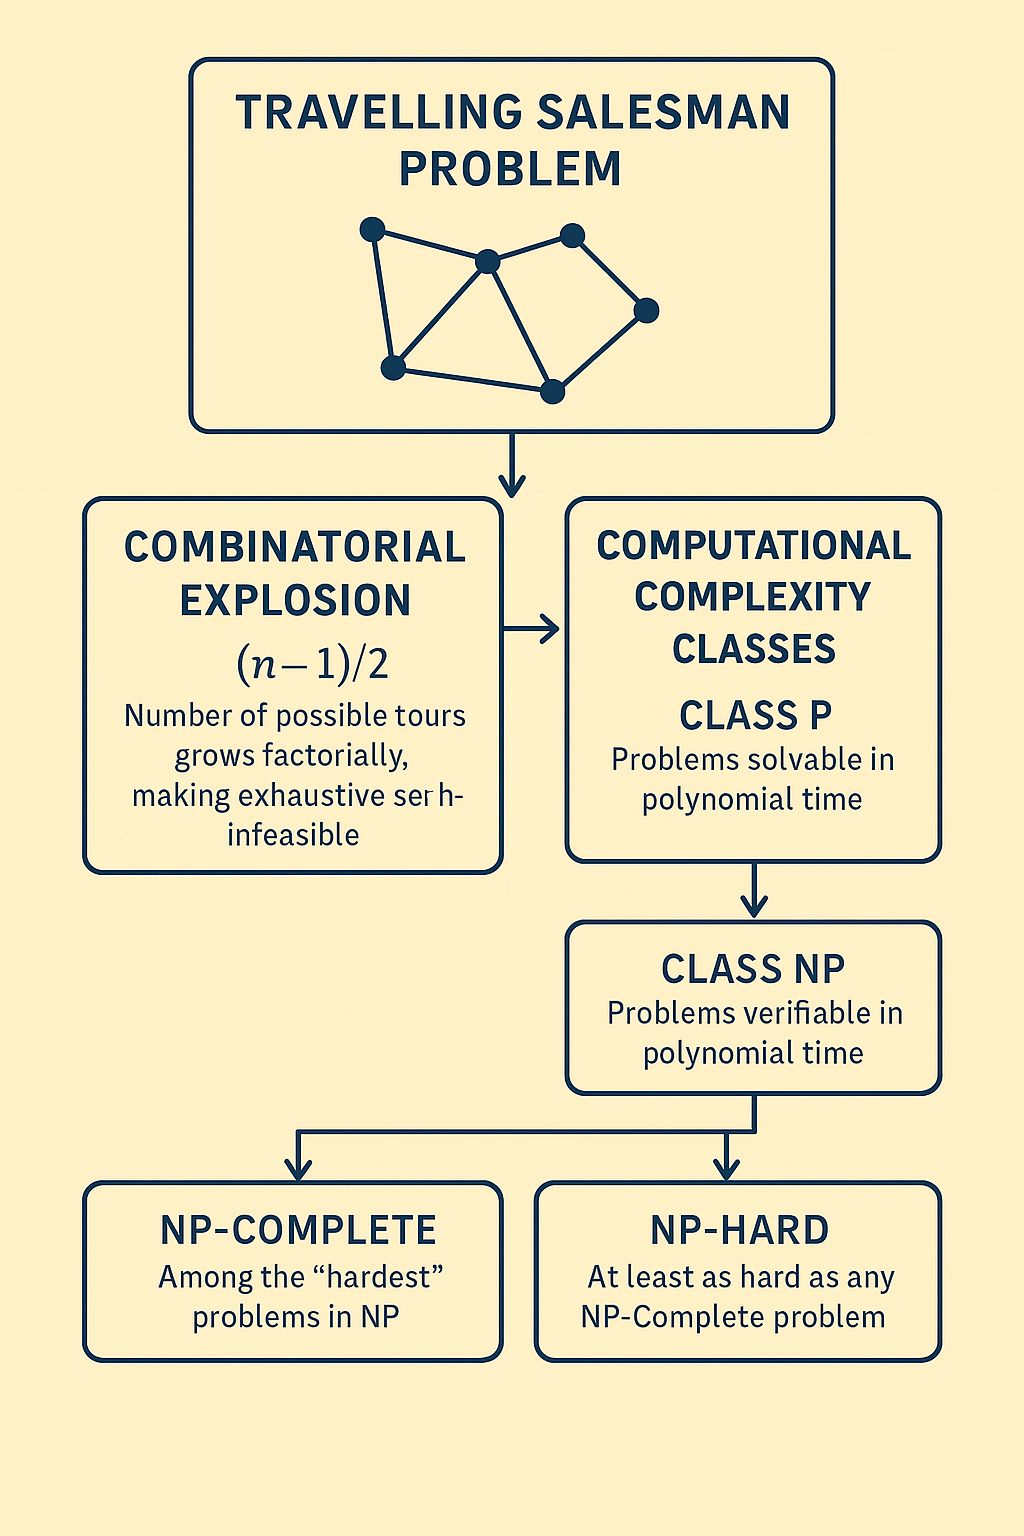

In [ ]:
from IPython.display import Image, display
from google.colab import files

# Mostrar imagen en Colab
display(Image('/content/Complejidad.png'))




🚀 DEMOSTRACIÓN DEL SOLVER TSP
Problema: 9 ciudades
Ciudades: A, B, C, D, E, F, G, H, I

COMPARACIÓN DE ALGORITMOS TSP - 9 ciudades

--- BRUTE_FORCE ---
Ejecutando algoritmo de fuerza bruta...
Evaluando 40,320 permutaciones...
Progreso: 10,000/40,320 (24.8%)
Progreso: 20,000/40,320 (49.6%)
Progreso: 30,000/40,320 (74.4%)
Progreso: 40,000/40,320 (99.2%)
✅ Completado en 0.189 segundos
   Distancia: 52.73
   Tour: [0, 3, 7, 4, 2]...

--- HELD_KARP_DP ---
Ejecutando algoritmo de Held-Karp (Programación Dinámica)...
✅ Completado en 0.009 segundos
   Distancia: 52.73
   Tour: [8, 1, 5, 6, 2]...

--- NEAREST_NEIGHBOR_MULTISTART ---
Ejecutando nearest neighbor multi-start...
Ejecutando heurística del vecino más cercano desde ciudad 0...
Ejecutando heurística del vecino más cercano desde ciudad 1...
Ejecutando heurística del vecino más cercano desde ciudad 2...
Ejecutando heurística del vecino más cercano desde ciudad 3...
Ejecutando heurística del vecino más cercano desde ciudad 4...
Ejecutando

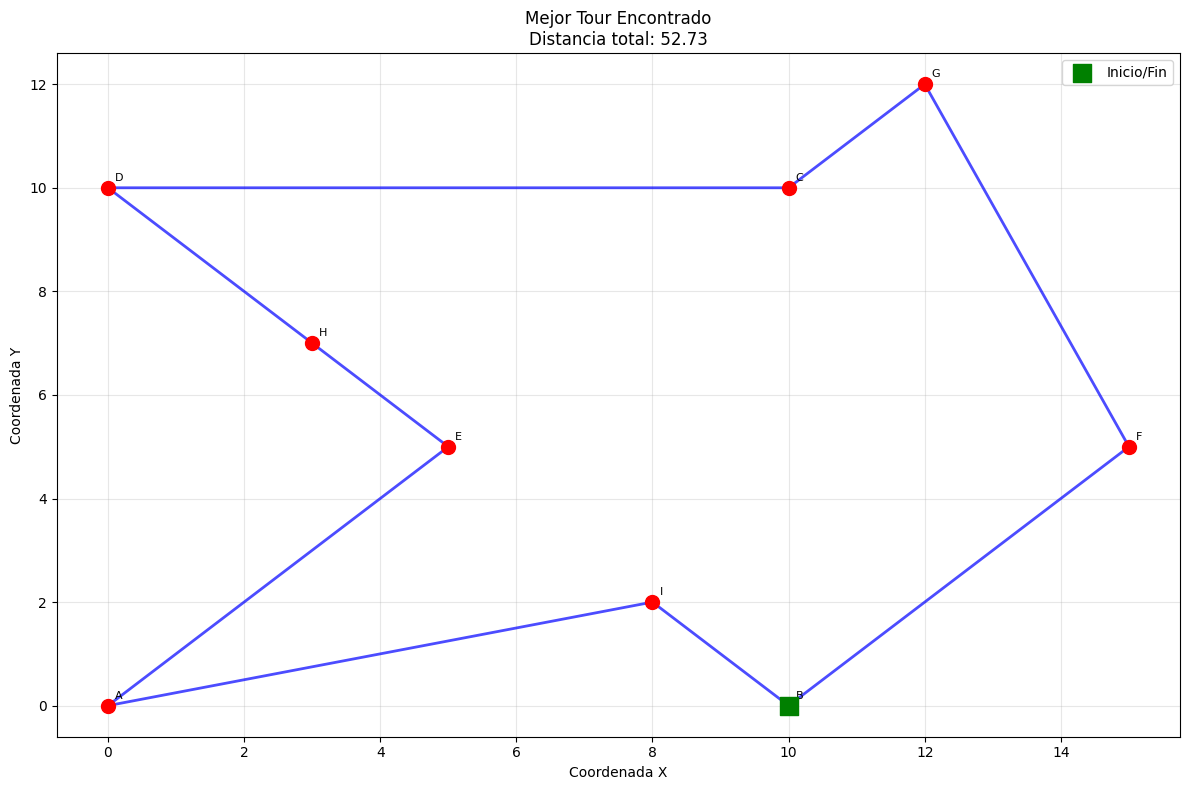


✨ Demostración completada!

💡 Para instancias más grandes, usa:
   tsp_large = TSPSolver.generate_random_instance(20)
   results = tsp_large.compare_algorithms(['simulated_annealing', 'genetic_algorithm'])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
from itertools import permutations
import networkx as nx
from typing import List, Tuple, Dict, Optional
import copy

class TSPSolver:
    """
    Implementación completa del Problema del Viajante de Comercio (TSP)
    con múltiples algoritmos exactos y heurísticos.
    """

    def __init__(self, cities: List[Tuple[float, float]], city_names: Optional[List[str]] = None):
        """
        Inicializa el solver del TSP.

        Args:
            cities: Lista de coordenadas (x, y) de las ciudades
            city_names: Nombres opcionales de las ciudades
        """
        self.cities = np.array(cities)
        self.n_cities = len(cities)
        self.city_names = city_names or [f"Ciudad_{i}" for i in range(self.n_cities)]
        self.distance_matrix = self._calculate_distance_matrix()
        self.best_tour = None
        self.best_distance = float('inf')

    def _calculate_distance_matrix(self) -> np.ndarray:
        """Calcula la matriz de distancias euclidianas entre todas las ciudades."""
        n = self.n_cities
        distances = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                if i != j:
                    distances[i][j] = math.sqrt(
                        (self.cities[i][0] - self.cities[j][0])**2 +
                        (self.cities[i][1] - self.cities[j][1])**2
                    )
                else:
                    distances[i][j] = 0

        return distances

    def calculate_tour_distance(self, tour: List[int]) -> float:
        """Calcula la distancia total de un tour dado."""
        total_distance = 0
        for i in range(len(tour)):
            total_distance += self.distance_matrix[tour[i]][tour[(i + 1) % len(tour)]]
        return total_distance

    # ===== ALGORITMOS EXACTOS =====

    def brute_force(self) -> Tuple[List[int], float]:
        """
        Algoritmo de fuerza bruta - O((n-1)!)
        Solo viable para n muy pequeño (≤ 10 ciudades).
        """
        print("Ejecutando algoritmo de fuerza bruta...")

        if self.n_cities > 10:
            print("  Advertencia: Fuerza bruta no recomendado para más de 10 ciudades")
            return None, float('inf')

        min_distance = float('inf')
        best_tour = None

        # Fijamos el primer nodo como punto de partida
        remaining_cities = list(range(1, self.n_cities))

        total_permutations = math.factorial(len(remaining_cities))
        print(f"Evaluando {total_permutations:,} permutaciones...")

        count = 0
        for perm in permutations(remaining_cities):
            count += 1
            tour = [0] + list(perm)
            distance = self.calculate_tour_distance(tour)

            if distance < min_distance:
                min_distance = distance
                best_tour = tour.copy()

            if count % 10000 == 0:
                print(f"Progreso: {count:,}/{total_permutations:,} ({100*count/total_permutations:.1f}%)")

        self.best_tour = best_tour
        self.best_distance = min_distance
        return best_tour, min_distance

    def held_karp_dp(self) -> Tuple[List[int], float]:
        """
        Algoritmo de Held-Karp usando programación dinámica - O(n²2^n)
        Algoritmo exacto más eficiente conocido para TSP general.
        """
        print("Ejecutando algoritmo de Held-Karp (Programación Dinámica)...")

        if self.n_cities > 20:
            print("⚠️  Advertencia: Held-Karp puede ser lento para más de 20 ciudades")

        n = self.n_cities
        # dp[mask][i] = distancia mínima para visitar las ciudades en mask terminando en i
        dp = {}
        parent = {}

        # Caso base: desde ciudad 0 a cualquier otra ciudad
        for i in range(1, n):
            dp[(1 << i, i)] = self.distance_matrix[0][i]
            parent[(1 << i, i)] = 0

        # Llenar la tabla DP para todos los subconjuntos
        for mask_size in range(2, n):
            for mask in range(1, 1 << n):
                if bin(mask).count('1') != mask_size:
                    continue

                for i in range(1, n):
                    if not (mask & (1 << i)):
                        continue

                    prev_mask = mask ^ (1 << i)
                    min_dist = float('inf')
                    min_prev = -1

                    for j in range(1, n):
                        if not (prev_mask & (1 << j)):
                            continue

                        dist = dp.get((prev_mask, j), float('inf')) + self.distance_matrix[j][i]
                        if dist < min_dist:
                            min_dist = dist
                            min_prev = j

                    if min_dist < float('inf'):
                        dp[(mask, i)] = min_dist
                        parent[(mask, i)] = min_prev

        # Encontrar el tour óptimo
        full_mask = (1 << n) - 1 - 1  # Todas las ciudades excepto la 0
        min_cost = float('inf')
        last_city = -1

        for i in range(1, n):
            cost = dp.get((full_mask, i), float('inf')) + self.distance_matrix[i][0]
            if cost < min_cost:
                min_cost = cost
                last_city = i

        # Reconstruir el tour
        tour = [0]
        mask = full_mask
        current = last_city

        while mask:
            tour.append(current)
            next_city = parent.get((mask, current), -1)
            mask ^= (1 << current)
            current = next_city

        tour.reverse()

        self.best_tour = tour
        self.best_distance = min_cost
        return tour, min_cost

    # ===== ALGORITMOS HEURÍSTICOS =====

    def nearest_neighbor(self, start_city: int = 0) -> Tuple[List[int], float]:
        """
        Heurística del vecino más cercano.
        Complejidad: O(n²)
        """
        print(f"Ejecutando heurística del vecino más cercano desde ciudad {start_city}...")

        unvisited = set(range(self.n_cities))
        tour = [start_city]
        unvisited.remove(start_city)
        current_city = start_city
        total_distance = 0

        while unvisited:
            nearest_city = min(unvisited, key=lambda city: self.distance_matrix[current_city][city])
            total_distance += self.distance_matrix[current_city][nearest_city]
            tour.append(nearest_city)
            unvisited.remove(nearest_city)
            current_city = nearest_city

        # Regresar al inicio
        total_distance += self.distance_matrix[current_city][start_city]

        return tour, total_distance

    def nearest_neighbor_multistart(self) -> Tuple[List[int], float]:
        """
        Ejecuta nearest neighbor desde todas las ciudades y toma el mejor resultado.
        """
        print("Ejecutando nearest neighbor multi-start...")

        best_tour = None
        best_distance = float('inf')

        for start in range(self.n_cities):
            tour, distance = self.nearest_neighbor(start)
            if distance < best_distance:
                best_distance = distance
                best_tour = tour

        self.best_tour = best_tour
        self.best_distance = best_distance
        return best_tour, best_distance

    def farthest_insertion(self) -> Tuple[List[int], float]:
        """
        Heurística de inserción del más lejano.
        """
        print("Ejecutando heurística de inserción del más lejano...")

        # Comenzar con las dos ciudades más lejanas
        max_distance = 0
        start_cities = (0, 1)

        for i in range(self.n_cities):
            for j in range(i + 1, self.n_cities):
                if self.distance_matrix[i][j] > max_distance:
                    max_distance = self.distance_matrix[i][j]
                    start_cities = (i, j)

        tour = list(start_cities)
        unvisited = set(range(self.n_cities)) - set(tour)

        while unvisited:
            # Encontrar la ciudad no visitada más lejana del tour actual
            farthest_city = None
            max_min_distance = -1

            for city in unvisited:
                min_distance_to_tour = min(self.distance_matrix[city][tour_city]
                                         for tour_city in tour)
                if min_distance_to_tour > max_min_distance:
                    max_min_distance = min_distance_to_tour
                    farthest_city = city

            # Encontrar la mejor posición para insertar la ciudad más lejana
            best_position = 0
            min_increase = float('inf')

            for i in range(len(tour)):
                j = (i + 1) % len(tour)
                increase = (self.distance_matrix[tour[i]][farthest_city] +
                           self.distance_matrix[farthest_city][tour[j]] -
                           self.distance_matrix[tour[i]][tour[j]])

                if increase < min_increase:
                    min_increase = increase
                    best_position = i + 1

            tour.insert(best_position, farthest_city)
            unvisited.remove(farthest_city)

        distance = self.calculate_tour_distance(tour)
        return tour, distance

    def two_opt(self, tour: List[int], max_iterations: int = 1000) -> Tuple[List[int], float]:
        """
        Mejoramiento local 2-opt.
        Intercambia dos aristas del tour si mejora la solución.
        """
        print("Ejecutando mejoramiento 2-opt...")

        current_tour = tour.copy()
        current_distance = self.calculate_tour_distance(current_tour)

        improved = True
        iteration = 0

        while improved and iteration < max_iterations:
            improved = False
            iteration += 1

            for i in range(len(current_tour) - 1):
                for j in range(i + 2, len(current_tour)):
                    if j == len(current_tour) - 1 and i == 0:
                        continue  # Evitar el mismo edge

                    # Crear nuevo tour intercambiando aristas
                    new_tour = current_tour.copy()
                    new_tour[i+1:j+1] = reversed(new_tour[i+1:j+1])

                    new_distance = self.calculate_tour_distance(new_tour)

                    if new_distance < current_distance:
                        current_tour = new_tour
                        current_distance = new_distance
                        improved = True
                        break

                if improved:
                    break

            if iteration % 100 == 0:
                print(f"2-opt iteración {iteration}, distancia actual: {current_distance:.2f}")

        return current_tour, current_distance

    def simulated_annealing(self, initial_temp: float = 10000,
                          cooling_rate: float = 0.995,
                          min_temp: float = 1e-8,
                          max_iterations: int = 100000) -> Tuple[List[int], float]:
        """
        Metaheurística de recocido simulado.
        """
        print("Ejecutando recocido simulado...")

        # Comenzar con una solución inicial
        current_tour, _ = self.nearest_neighbor()
        current_distance = self.calculate_tour_distance(current_tour)

        best_tour = current_tour.copy()
        best_distance = current_distance

        temperature = initial_temp
        iteration = 0

        while temperature > min_temp and iteration < max_iterations:
            # Generar vecino (2-opt swap)
            i, j = sorted(random.sample(range(self.n_cities), 2))
            new_tour = current_tour.copy()
            new_tour[i:j+1] = reversed(new_tour[i:j+1])
            new_distance = self.calculate_tour_distance(new_tour)

            # Decidir si aceptar el nuevo tour
            delta = new_distance - current_distance

            if delta < 0 or random.random() < math.exp(-delta / temperature):
                current_tour = new_tour
                current_distance = new_distance

                if current_distance < best_distance:
                    best_tour = current_tour.copy()
                    best_distance = current_distance

            temperature *= cooling_rate
            iteration += 1

            if iteration % 10000 == 0:
                print(f"SA iteración {iteration}, temp: {temperature:.2e}, "
                      f"mejor distancia: {best_distance:.2f}")

        self.best_tour = best_tour
        self.best_distance = best_distance
        return best_tour, best_distance

    def genetic_algorithm(self, population_size: int = 100,
                         generations: int = 500,
                         mutation_rate: float = 0.02,
                         elite_size: int = 20) -> Tuple[List[int], float]:
        """
        Algoritmo genético para TSP.
        """
        print("Ejecutando algoritmo genético...")

        def create_individual():
            """Crea un individuo aleatorio (tour)."""
            tour = list(range(self.n_cities))
            random.shuffle(tour)
            return tour

        def fitness(tour):
            """Función de fitness (inverso de la distancia)."""
            return 1 / self.calculate_tour_distance(tour)

        def selection(population, scores):
            """Selección por torneo."""
            tournament_size = 5
            selected = []
            for _ in range(len(population)):
                tournament = random.sample(list(zip(population, scores)), tournament_size)
                winner = max(tournament, key=lambda x: x[1])
                selected.append(winner[0])
            return selected

        def crossover(parent1, parent2):
            """Crossover de orden (OX)."""
            size = len(parent1)
            start, end = sorted(random.sample(range(size), 2))

            child = [-1] * size
            child[start:end] = parent1[start:end]

            pointer = 0
            for city in parent2:
                if city not in child:
                    while child[pointer] != -1:
                        pointer += 1
                    child[pointer] = city

            return child

        def mutate(tour):
            """Mutación por intercambio."""
            if random.random() < mutation_rate:
                i, j = random.sample(range(len(tour)), 2)
                tour[i], tour[j] = tour[j], tour[i]
            return tour

        # Inicializar población
        population = [create_individual() for _ in range(population_size)]

        for generation in range(generations):
            # Evaluar fitness
            scores = [fitness(individual) for individual in population]

            # Elitismo - mantener los mejores
            elite_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:elite_size]
            elite = [population[i] for i in elite_indices]

            # Selección y reproducción
            selected = selection(population, scores)
            new_population = elite.copy()

            while len(new_population) < population_size:
                parent1, parent2 = random.sample(selected, 2)
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)

                new_population.extend([mutate(child1), mutate(child2)])

            population = new_population[:population_size]

            if generation % 50 == 0:
                best_fitness = max(scores)
                best_distance = 1 / best_fitness
                print(f"Generación {generation}, mejor distancia: {best_distance:.2f}")

        # Mejor solución final
        final_scores = [fitness(individual) for individual in population]
        best_index = final_scores.index(max(final_scores))
        best_tour = population[best_index]
        best_distance = self.calculate_tour_distance(best_tour)

        self.best_tour = best_tour
        self.best_distance = best_distance
        return best_tour, best_distance

    # ===== UTILIDADES Y VISUALIZACIÓN =====

    def plot_tour(self, tour: List[int], title: str = "TSP Tour",
                  save_path: Optional[str] = None):
        """Visualiza un tour del TSP."""
        plt.figure(figsize=(12, 8))

        # Plotear ciudades
        x_coords = [self.cities[i][0] for i in range(self.n_cities)]
        y_coords = [self.cities[i][1] for i in range(self.n_cities)]

        plt.scatter(x_coords, y_coords, c='red', s=100, zorder=5)

        # Etiquetar ciudades
        for i, (x, y) in enumerate(self.cities):
            plt.annotate(self.city_names[i], (x, y), xytext=(5, 5),
                        textcoords='offset points', fontsize=8)

        # Plotear tour
        if tour:
            tour_x = [self.cities[city][0] for city in tour] + [self.cities[tour[0]][0]]
            tour_y = [self.cities[city][1] for city in tour] + [self.cities[tour[0]][1]]

            plt.plot(tour_x, tour_y, 'b-', linewidth=2, alpha=0.7)

            # Marcar inicio/fin
            start_city = tour[0]
            plt.scatter(self.cities[start_city][0], self.cities[start_city][1],
                       c='green', s=150, marker='s', zorder=6, label='Inicio/Fin')

            distance = self.calculate_tour_distance(tour)
            plt.title(f"{title}\nDistancia total: {distance:.2f}")
        else:
            plt.title(title)

        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

        plt.show()

    def compare_algorithms(self, algorithms: List[str] = None) -> Dict:
        """
        Compara múltiples algoritmos y retorna estadísticas.
        """
        if algorithms is None:
            if self.n_cities <= 10:
                algorithms = ['brute_force', 'held_karp_dp', 'nearest_neighbor_multistart',
                             'farthest_insertion', 'simulated_annealing']
            elif self.n_cities <= 15:
                algorithms = ['held_karp_dp', 'nearest_neighbor_multistart',
                             'farthest_insertion', 'simulated_annealing']
            else:
                algorithms = ['nearest_neighbor_multistart', 'farthest_insertion',
                             'simulated_annealing', 'genetic_algorithm']

        results = {}
        print(f"\n{'='*60}")
        print(f"COMPARACIÓN DE ALGORITMOS TSP - {self.n_cities} ciudades")
        print(f"{'='*60}")

        for algorithm in algorithms:
            print(f"\n--- {algorithm.upper()} ---")
            start_time = time.time()

            try:
                if hasattr(self, algorithm):
                    tour, distance = getattr(self, algorithm)()
                    execution_time = time.time() - start_time

                    results[algorithm] = {
                        'tour': tour,
                        'distance': distance,
                        'time': execution_time,
                        'success': True
                    }

                    print(f"✅ Completado en {execution_time:.3f} segundos")
                    print(f"   Distancia: {distance:.2f}")
                    print(f"   Tour: {tour[:5]}{'...' if len(tour) > 5 else ''}")

            except Exception as e:
                print(f"❌ Error: {str(e)}")
                results[algorithm] = {
                    'tour': None,
                    'distance': float('inf'),
                    'time': time.time() - start_time,
                    'success': False,
                    'error': str(e)
                }

        # Resumen
        print(f"\n{'='*60}")
        print("RESUMEN DE RESULTADOS")
        print(f"{'='*60}")

        successful_results = {k: v for k, v in results.items() if v['success']}

        if successful_results:
            best_algorithm = min(successful_results.keys(),
                               key=lambda k: successful_results[k]['distance'])

            print(f"🏆 Mejor solución: {best_algorithm}")
            print(f"   Distancia: {successful_results[best_algorithm]['distance']:.2f}")
            print(f"   Tiempo: {successful_results[best_algorithm]['time']:.3f}s")

            print(f"\n📊 Ranking por calidad de solución:")
            sorted_algorithms = sorted(successful_results.keys(),
                                     key=lambda k: successful_results[k]['distance'])

            for i, alg in enumerate(sorted_algorithms, 1):
                result = successful_results[alg]
                print(f"   {i}. {alg}: {result['distance']:.2f} ({result['time']:.3f}s)")

        return results

    def generate_random_instance(n_cities: int, width: int = 100, height: int = 100,
                               seed: int = None) -> 'TSPSolver':
        """
        Genera una instancia aleatoria del TSP.
        """
        if seed:
            random.seed(seed)
            np.random.seed(seed)

        cities = [(random.uniform(0, width), random.uniform(0, height))
                 for _ in range(n_cities)]

        return TSPSolver(cities)


# ===== EJEMPLO DE USO =====
if __name__ == "__main__":
    # Crear una instancia pequeña de ejemplo
    cities_example = [
        (0, 0), (10, 0), (10, 10), (0, 10), (5, 5),
        (15, 5), (12, 12), (3, 7), (8, 2)
    ]

    city_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

    print("🚀 DEMOSTRACIÓN DEL SOLVER TSP")
    print("=" * 50)

    # Crear solver
    tsp = TSPSolver(cities_example, city_names)

    print(f"Problema: {tsp.n_cities} ciudades")
    print(f"Ciudades: {', '.join(tsp.city_names)}")

    # Comparar algoritmos
    results = tsp.compare_algorithms()

    # Visualizar mejor solución
    if tsp.best_tour:
        tsp.plot_tour(tsp.best_tour, "Mejor Tour Encontrado")

    print("\n✨ Demostración completada!")
    print("\n💡 Para instancias más grandes, usa:")
    print("   tsp_large = TSPSolver.generate_random_instance(20)")
    print("   results = tsp_large.compare_algorithms(['simulated_annealing', 'genetic_algorithm'])")

In [ ]:
import numpy as np
import math
import pandas as pd

# === TSPSolver simplificado ===
class TSPSolver:
    def __init__(self, cities, city_names=None):
        self.cities = np.array(cities)
        self.n_cities = len(cities)
        self.city_names = city_names or [f"Ciudad_{i}" for i in range(self.n_cities)]
        self.distance_matrix = self._calculate_distance_matrix()
        self.best_tour = None
        self.best_distance = float('inf')

    def _calculate_distance_matrix(self):
        n = self.n_cities
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    dx = self.cities[i][0] - self.cities[j][0]
                    dy = self.cities[i][1] - self.cities[j][1]
                    distances[i][j] = math.sqrt(dx**2 + dy**2)
                else:
                    distances[i][j] = 0
        return distances

# === Datos de ejemplo ===
cities = [
    (0, 0),     # A
    (10, 0),    # B
    (10, 10),   # C
    (0, 10),    # D
    (5, 5),     # E
    (15, 5),    # F
    (12, 12),   # G
    (3, 7),     # H
    (8, 2)      # I
]
city_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

# === Crear el solver ===
tsp = TSPSolver(cities, city_names)

# === Imprimir resultados ===
print(" Coordenadas de las ciudades:")
for name, coord in zip(tsp.city_names, tsp.cities):
    print(f"{name}: {coord}")

print(f"\nNúmero de ciudades: {tsp.n_cities}")

print("\n Nombres de las ciudades:")
print(tsp.city_names)

print("\n Matriz de distancias euclidianas (redondeada a 2 decimales):")
df = pd.DataFrame(tsp.distance_matrix, index=tsp.city_names, columns=tsp.city_names)
print(df.round(2))

print("\n Mejor tour (inicial):", tsp.best_tour)
print(" Mejor distancia (inicial):", tsp.best_distance)


 Coordenadas de las ciudades:
A: [0 0]
B: [10  0]
C: [10 10]
D: [ 0 10]
E: [5 5]
F: [15  5]
G: [12 12]
H: [3 7]
I: [8 2]

Número de ciudades: 9

 Nombres de las ciudades:
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

 Matriz de distancias euclidianas (redondeada a 2 decimales):
       A      B      C      D      E      F      G      H      I
A   0.00  10.00  14.14  10.00   7.07  15.81  16.97   7.62   8.25
B  10.00   0.00  10.00  14.14   7.07   7.07  12.17   9.90   2.83
C  14.14  10.00   0.00  10.00   7.07   7.07   2.83   7.62   8.25
D  10.00  14.14  10.00   0.00   7.07  15.81  12.17   4.24  11.31
E   7.07   7.07   7.07   7.07   0.00  10.00   9.90   2.83   4.24
F  15.81   7.07   7.07  15.81  10.00   0.00   7.62  12.17   7.62
G  16.97  12.17   2.83  12.17   9.90   7.62   0.00  10.30  10.77
H   7.62   9.90   7.62   4.24   2.83  12.17  10.30   0.00   7.07
I   8.25   2.83   8.25  11.31   4.24   7.62  10.77   7.07   0.00

 Mejor tour (inicial): None
 Mejor distancia (inicial): inf


In [ ]:
import pandas as pd
import numpy as np

# Lista de ciudades (puedes cambiar estas coordenadas si quieres)
cities = [
    (0, 0),     # A
    (10, 0),    # B
    (10, 10),   # C
    (0, 10),    # D
    (5, 5),     # E
    (15, 5),    # F
    (12, 12),   # G
    (3, 7),     # H
    (8, 2)      # I
]

city_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

# Función para calcular distancia euclidiana
def euclidean_distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# Calcular matriz de distancias
n = len(cities)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            distance_matrix[i][j] = euclidean_distance(cities[i], cities[j])

# Crear DataFrame con etiquetas
df = pd.DataFrame(distance_matrix, index=city_names, columns=city_names)

# Redondear a 2 decimales para visualización
df = df.round(2)

# Mostrar la matriz
print(" MATRIZ DE DISTANCIAS (en unidades euclidianas):\n")
print(df)


 MATRIZ DE DISTANCIAS (en unidades euclidianas):

       A      B      C      D      E      F      G      H      I
A   0.00  10.00  14.14  10.00   7.07  15.81  16.97   7.62   8.25
B  10.00   0.00  10.00  14.14   7.07   7.07  12.17   9.90   2.83
C  14.14  10.00   0.00  10.00   7.07   7.07   2.83   7.62   8.25
D  10.00  14.14  10.00   0.00   7.07  15.81  12.17   4.24  11.31
E   7.07   7.07   7.07   7.07   0.00  10.00   9.90   2.83   4.24
F  15.81   7.07   7.07  15.81  10.00   0.00   7.62  12.17   7.62
G  16.97  12.17   2.83  12.17   9.90   7.62   0.00  10.30  10.77
H   7.62   9.90   7.62   4.24   2.83  12.17  10.30   0.00   7.07
I   8.25   2.83   8.25  11.31   4.24   7.62  10.77   7.07   0.00


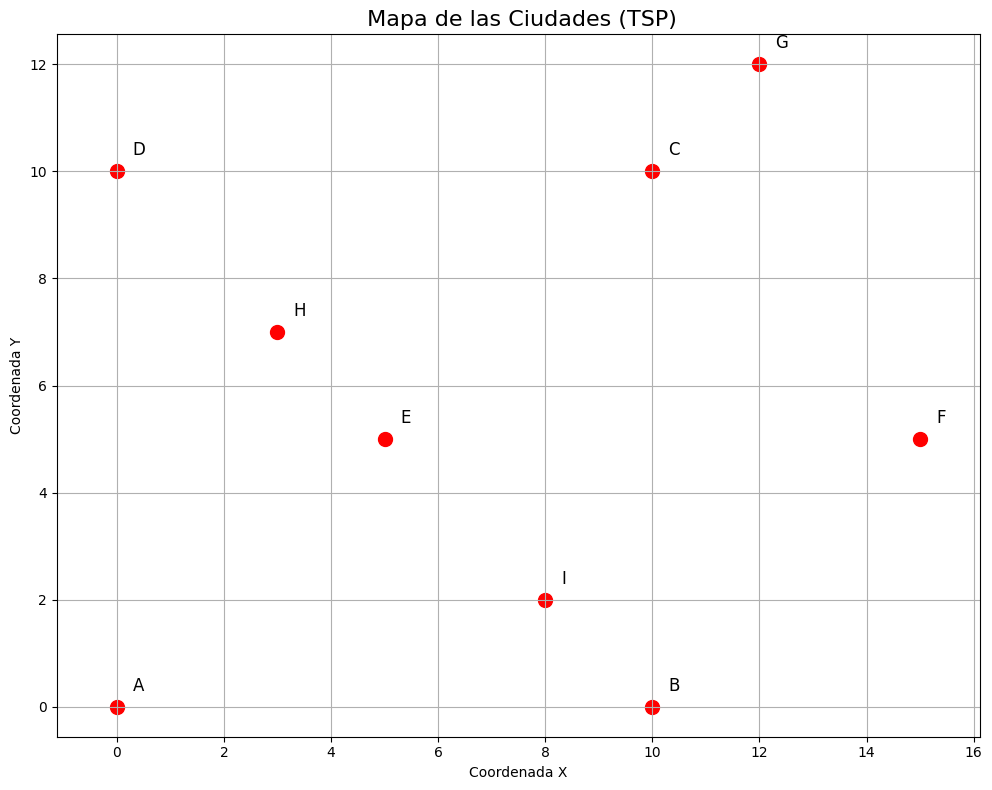

In [ ]:
import matplotlib.pyplot as plt

# Coordenadas de las ciudades
cities = [
    (0, 0),     # A
    (10, 0),    # B
    (10, 10),   # C
    (0, 10),    # D
    (5, 5),     # E
    (15, 5),    # F
    (12, 12),   # G
    (3, 7),     # H
    (8, 2)      # I
]

city_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I"]

# Separar coordenadas X e Y
x_coords = [x for x, y in cities]
y_coords = [y for x, y in cities]

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c='red', s=100)

# Etiquetas
for i, name in enumerate(city_names):
    plt.text(x_coords[i] + 0.3, y_coords[i] + 0.3, name, fontsize=12)

# Ajustes visuales
plt.title(" Mapa de las Ciudades (TSP)", fontsize=16)
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()

plt.show()


In [ ]:
from IPython.display import display, HTML

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>TSP: Análisis del Algoritmo de Fuerza Bruta</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Source+Code+Pro&display=swap" rel="stylesheet">

  <!-- Configuración y carga de MathJax v2 -->
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {
        inlineMath: [['$','$'], ['\\(','\\)']],
        displayMath: [['$$','$$'], ['\\[','\\]']]
      }
    });
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_HTML"></script>

  <style>
    :root {
      --bg-color: #ffffff;
      --text-color: #212529;
      --header-color: #005a9c;
      --accent-color: #007bff;
      --accent-hover-color: #0056b3;
      --button-bg: #007bff;
      --button-hover-bg: #0056b3;
      --button-text-color: white;
      --section-border-color: #e0e0e0;
      --code-bg-color: #f8f9fa;
      --keyword-color: #d9534f;
      --table-border-color: #dee2e6;
      --table-header-bg: #f1f3f5;
      --theme-button-bg: #6c757d;
      --theme-button-hover-bg: #5a6268;

      /* Dark Mode Variables */
      --bg-color-dark: #22272e;
      --text-color-dark: #c9d1d9;
      --header-color-dark: #58a6ff;
      --accent-color-dark: #58a6ff;
      --accent-hover-color-dark: #388bfd;
      --button-bg-dark: #3081f7;
      --button-hover-bg-dark: #1f6feb;
      --section-border-color-dark: #444c56;
      --code-bg-color-dark: #2d333b;
      --keyword-color-dark: #ff7b72;
      --table-border-color-dark: #495057;
      --table-header-bg-dark: #343a40;
      --theme-button-bg-dark: #f8f9fa;
      --theme-button-text-dark: #22272e;
      --theme-button-hover-bg-dark: #e2e6ea;
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      margin: 0;
      padding: 20px;
    }

    .container {
      max-width: 1000px;
      margin: auto;
      padding: 30px;
      background-color: var(--bg-color);
      box-shadow: 0 5px 20px rgba(0,0,0,0.07);
      border-radius: 10px;
      position: relative;
      transition: background-color 0.3s;
    }

    body.dark-mode {
      --bg-color: var(--bg-color-dark);
      --text-color: var(--text-color-dark);
      --header-color: var(--header-color-dark);
      --accent-color: var(--accent-color-dark);
      --accent-hover-color: var(--accent-hover-color-dark);
      --button-bg: var(--button-bg-dark);
      --button-hover-bg: var(--button-hover-bg-dark);
      --section-border-color: var(--section-border-color-dark);
      --code-bg-color: var(--code-bg-color-dark);
      --keyword-color: var(--keyword-color-dark);
      --table-border-color: var(--table-border-color-dark);
      --table-header-bg: var(--table-header-bg-dark);
      --theme-button-bg: var(--theme-button-bg-dark);
      --theme-button-hover-bg: var(--theme-button-hover-bg-dark);
    }

    body.dark-mode .container {
        box-shadow: 0 5px 25px rgba(0,0,0,0.25);
    }

    body.dark-mode .theme-toggle {
        color: var(--theme-button-text-dark);
    }
    body.dark-mode .MathJax_Display, body.dark-mode .MathJax {
        color: var(--text-color-dark) !important;
    }
    .MathJax_Display, .MathJax {
        color: var(--text-color) !important;
        transition: color 0.3s;
    }

    h1, h2, h3, h4 {
      margin-top: 1.8em;
      margin-bottom: 1em;
      color: var(--header-color);
      font-weight: 700;
    }
    h1 {
      font-size: 2.2em;
      text-align: center;
      border-bottom: 3px solid var(--accent-color);
      padding-bottom: 15px;
    }
    h2 {
      font-size: 1.8em;
      color: var(--accent-color);
      margin-top: 30px;
      padding-bottom: 5px;
      border-bottom: 1px solid var(--section-border-color);
    }
    h3 {
      font-size: 1.4em;
      margin-top: 25px;
    }

    strong {
        color: var(--keyword-color);
        font-weight: bold;
    }

    .section-content {
      display: none;
      padding: 15px;
      margin-top: 5px;
      border-left: 3px solid var(--accent-color);
      background-color: var(--code-bg-color);
      margin-bottom: 10px;
      border-radius: 0 5px 5px 0;
    }
    .section-content.is-visible {
      display: block;
    }

    .toggle-button {
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px;
      border-radius: 6px;
      cursor: pointer;
      margin-top: 15px;
      margin-bottom: 5px;
      transition: background-color 0.2s ease-in-out, transform 0.1s ease;
      width: 100%;
      text-align: left;
      font-size: 1.1em;
      font-weight: 700;
    }
    .toggle-button:hover {
      background-color: var(--button-hover-bg);
      transform: translateY(-1px);
    }
     .toggle-button:active {
      transform: translateY(0px);
    }
    .toggle-button::after {
        content: ' ▼';
        float: right;
        transition: transform 0.2s ease-in-out;
        font-size: 0.8em;
        line-height: inherit;
    }
    .toggle-button[aria-expanded="true"]::after {
        transform: rotate(180deg);
    }

    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 10px 15px;
      border-radius: 25px;
      cursor: pointer;
      position: fixed;
      top: 20px;
      right: 20px;
      font-size: 0.9em;
      transition: background-color 0.3s, color 0.3s, transform 0.2s;
      z-index: 1000;
      box-shadow: 0 2px 6px rgba(0,0,0,0.15);
    }
    .theme-toggle:hover {
        background-color: var(--theme-button-hover-bg);
        transform: scale(1.05);
    }

    button:focus-visible, a:focus-visible {
      outline: 3px solid var(--accent-color);
      outline-offset: 2px;
    }
    body.dark-mode button:focus-visible, body.dark-mode a:focus-visible {
      outline-color: var(--accent-color-dark);
    }

    ul, ol {
      padding-left: 30px;
    }
    li {
      margin-bottom: 0.8em;
    }
    p {
        margin-bottom: 1em;
    }

    table {
      width: 100%;
      margin-bottom: 1rem;
      border-collapse: collapse;
      background-color: transparent; /* Para que el tema de fondo aplique */
    }
    th, td {
      padding: 0.75rem;
      vertical-align: top;
      border-top: 1px solid var(--table-border-color);
    }
    th {
      background-color: var(--table-header-bg);
      font-weight: bold;
      text-align: inherit;
    }
    tbody tr:nth-of-type(odd) {
       /* Opcional: para tablas con muchas filas, no aplica bien con code-bg-color */
    }

    pre {
      background-color: var(--bg-color); /* Hereda del body o del container */
      border: 1px solid var(--section-border-color);
      padding: 15px;
      border-radius: 5px;
      overflow-x: auto; /* Para scroll horizontal si el código es muy largo */
      font-family: 'Source Code Pro', monospace;
      color: var(--text-color); /* Asegurar que el color del texto del código también cambie */
    }
    code {
      font-family: 'Source Code Pro', monospace;
      /* El color es heredado, --keyword-color es para 'strong' */
    }
    /* Ajuste específico para el fondo de pre en modo oscuro si es necesario */
    body.dark-mode pre {
        background-color: var(--code-bg-color-dark); /* Usar un fondo ligeramente diferente para el código */
        border-color: var(--section-border-color-dark);
    }


  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1>Método de Fuerza Bruta para el Problema del Viajante de Comercio (TSP)</h1>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-tsp-intro">
      I. Recordatorio: ¿Qué es el TSP?
    </button>
    <div id="section-tsp-intro" class="section-content">
        <p>El <strong>Problema del Viajante de Comercio (Traveling Salesman Problem o TSP)</strong> consiste en encontrar el recorrido más corto que visite exactamente una vez todas las ciudades de una lista, y luego <strong>regrese al punto de origen</strong>.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-fuerza-bruta-que-es">
      II. ¿Qué hace el algoritmo de fuerza bruta?
    </button>
    <div id="section-fuerza-bruta-que-es" class="section-content">
        <p>El algoritmo de fuerza bruta <strong>genera y evalúa todas las rutas posibles</strong> que:</p>
        <ol>
            <li>Empiezan en una ciudad fija (generalmente la ciudad 0).</li>
            <li>Visitan todas las demás ciudades <strong>exactamente una vez</strong>.</li>
            <li>Regresan a la ciudad de inicio al final del recorrido.</li>
        </ol>
        <p>Finalmente, <strong>selecciona la ruta de menor distancia total</strong>.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-estructura">
      III. Estructura del Algoritmo
    </button>
    <div id="section-estructura" class="section-content">
        <p><strong>Paso a paso:</strong></p>
        <ol>
            <li><strong>Fijar una ciudad inicial</strong> para evitar permutaciones redundantes (por rotación). Por convención, suele ser la ciudad indexada como 0.</li>
            <li><strong>Generar todas las permutaciones</strong> de las ciudades restantes (es decir, todas las $n-1$ ciudades si hay $n$ ciudades en total).</li>
            <li>Para cada permutación generada:
                <ul>
                    <li>Construir el tour completo: <code>[ciudad_inicial] + permutación_actual + [ciudad_inicial]</code>. Por ejemplo, si la ciudad inicial es 0 y una permutación es <code>[2, 1, 3]</code>, el tour sería <code>[0, 2, 1, 3, 0]</code>.</li>
                    <li>Calcular la distancia total de ese tour sumando los costos de las aristas consecutivas (ej., distancia(0,2) + distancia(2,1) + distancia(1,3) + distancia(3,0)), utilizando una matriz de distancias previamente definida.</li>
                    <li>Comparar esta distancia total con la mejor distancia encontrada hasta el momento. Si es menor, actualizar la mejor distancia y guardar este tour como el mejor tour actual.</li>
                </ul>
            </li>
            <li>Una vez evaluadas todas las permutaciones, el <strong>mejor tour guardado es la solución óptima</strong>.</li>
        </ol>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-formula">
      IV. Fórmula Matemática de Rutas Evaluadas
    </button>
    <div id="section-formula" class="section-content">
        <p>Para un total de $n$ ciudades, si fijamos el punto inicial (por ejemplo, la ciudad 0), el número de rutas distintas que deben ser evaluadas es el número de permutaciones de las $n-1$ ciudades restantes. Esto se calcula como:</p>
        <p>$$ \text{Número de rutas posibles} = (n - 1)! $$</p>
        <p>Donde '$!$' denota la operación factorial (ej., $3! = 3 \times 2 \times 1 = 6$).</p>
        <p>Si no se considerara que un tour y su inverso son el mismo (ej. 0-1-2-0 es lo mismo que 0-2-1-0 en TSP simétrico), la fórmula sería $\frac{(n-1)!}{2}$. Sin embargo, el algoritmo de fuerza bruta que genera permutaciones de las ciudades intermedias y luego añade el inicio y el fin, típicamente evalúa $(n-1)!$ secuencias distintas antes de la simetrización.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-complejidad">
      V. Complejidad Computacional
    </button>
    <div id="section-complejidad" class="section-content">
        <p><strong>Complejidad de Tiempo:</strong></p>
        <p>La complejidad de tiempo es dominada por la generación y evaluación de todas las $(n-1)!$ permutaciones. Para cada permutación, calcular el costo del tour toma $O(n)$ tiempo (sumar $n$ distancias). Por lo tanto, la complejidad total es:</p>
        <p>$$ O(n \times (n-1)!) = O(n!) $$</p>
        <p>Esto representa un <strong>crecimiento factorial (o super-exponencial)</strong>, lo que significa que el tiempo de ejecución aumenta drásticamente con cada ciudad adicional. Por ejemplo:</p>
        <table>
            <thead>
                <tr>
                    <th>Nº de Ciudades (n)</th>
                    <th>Rutas a evaluar ($(n-1)!$)</th>
                    <th>Operaciones (aprox. $n!$)</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>4</td>
                    <td>$3! = 6$</td>
                    <td>$4! = 24$</td>
                </tr>
                <tr>
                    <td>5</td>
                    <td>$4! = 24$</td>
                    <td>$5! = 120$</td>
                </tr>
                <tr>
                    <td>10</td>
                    <td>$9! = 362,880$</td>
                    <td>$10! \approx 3.6 \times 10^6$</td>
                </tr>
                <tr>
                    <td>15</td>
                    <td>$14! \approx 8.7 \times 10^{10}$</td>
                    <td>$15! \approx 1.3 \times 10^{12}$</td>
                </tr>
                <tr>
                    <td>20</td>
                    <td>$19! \approx 1.2 \times 10^{17}$</td>
                    <td>$20! \approx 2.4 \times 10^{18}$</td>
                </tr>
            </tbody>
        </table>
        <p><strong>Complejidad de Espacio:</strong></p>
        <p>Se necesita almacenar la matriz de distancias, lo cual requiere $O(n^2)$ espacio. Además, se necesita espacio para almacenar la permutación actual y el mejor tour encontrado, lo cual es $O(n)$. Por lo tanto, la complejidad de espacio es principalmente:</p>
        <p>$$ O(n^2) $$</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-ventajas">
      VI. Ventajas
    </button>
    <div id="section-ventajas" class="section-content">
        <ul>
            <li><strong>Garantía de Optimalidad:</strong> Siempre encuentra la <strong>solución óptima absoluta</strong>, ya que explora todas las posibilidades.</li>
            <li><strong>Simplicidad Conceptual:</strong> Es relativamente fácil de entender e implementar, especialmente para fines educativos o como base de comparación.</li>
            <li><strong>Referencia:</strong> Útil como punto de referencia para validar la calidad de las soluciones obtenidas por algoritmos heurísticos o de aproximación en instancias pequeñas.</li>
        </ul>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-desventajas">
      VII. Desventajas
    </button>
    <div id="section-desventajas" class="section-content">
        <ul>
            <li><strong>Explosión Combinatoria:</strong> Su principal desventaja es la complejidad factorial $O(n!)$. El número de rutas crece de manera astronómica con el número de ciudades.</li>
            <li><strong>No Escalable:</strong> Debido a la explosión combinatoria, es impráctico para instancias del TSP que no sean muy pequeñas (generalmente, más de 10-12 ciudades ya se vuelven intratables para la mayoría de las computadoras en un tiempo razonable). Para 20 ciudades, el número de operaciones es prohibitivo.</li>
            <li><strong>Ineficiente:</strong> Comparado con algoritmos exactos más sofisticados (como Branch and Bound o Branch and Cut) o con algoritmos heurísticos, es extremadamente ineficiente para la mayoría de los casos prácticos.</li>
        </ul>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-analogia">
      VIII. Analogía Intuitiva
    </button>
    <div id="section-analogia" class="section-content">
        <p>Imagina que eres un planificador de eventos y tienes que organizar una gira para una banda que visitará 5 ciudades. Para encontrar la ruta más corta y económica, decides sentarte con un mapa y una calculadora. Metódicamente, anotas <strong>cada posible orden</strong> en el que la banda podría visitar las 4 ciudades restantes después de partir de su ciudad natal, y luego calculas la distancia total para cada uno de esos itinerarios, incluyendo el regreso a casa. Después de revisar todas las $4! = 24$ secuencias posibles, eliges la que tiene la menor distancia total. Esto es, en esencia, lo que hace el algoritmo de fuerza bruta.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-ejemplo-codigo">
      IX. Ejemplo Conceptual de Código (Python)
    </button>
    <div id="section-ejemplo-codigo" class="section-content">
        <p>A continuación, se muestra un fragmento conceptual en Python que ilustra la lógica de generar permutaciones para el TSP usando fuerza bruta. No es un script ejecutable completo, ya que asume la existencia de `matriz_distancias` y `calcular_distancia_tour`.</p>
        <pre><code>
from itertools import permutations
import math

def calcular_distancia_tour(tour, matriz_distancias):
    distancia = 0
    for i in range(len(tour) - 1):
        distancia += matriz_distancias[tour[i]][tour[i+1]]
    return distancia

# Ejemplo de uso (requiere una matriz_distancias definida)
# Supongamos 4 ciudades (0, 1, 2, 3)
# matriz_distancias = [
#   [0, 10, 15, 20], # Distancias desde la ciudad 0
#   [10, 0, 35, 25], # Distancias desde la ciudad 1
#   [15, 35, 0, 30], # Distancias desde la ciudad 2
#   [20, 25, 30, 0]  # Distancias desde la ciudad 3
# ]

# num_ciudades = len(matriz_distancias)
# ciudad_inicial = 0
# otras_ciudades = [i for i in range(num_ciudades) if i != ciudad_inicial]

# mejor_tour = None
# menor_distancia_total = math.inf

# for p in permutations(otras_ciudades):
#     tour_actual_parcial = list(p)
#     tour_completo = [ciudad_inicial] + tour_actual_parcial + [ciudad_inicial]

#     distancia_actual = calcular_distancia_tour(tour_completo, matriz_distancias)

#     if distancia_actual < menor_distancia_total:
#         menor_distancia_total = distancia_actual
#         mejor_tour = tour_completo

# print(f"Mejor tour encontrado: {mejor_tour}")
# print(f"Distancia total: {menor_distancia_total}")

# --- Código de demostración conceptual ---
# Para 5 ciudades (0, 1, 2, 3, 4), ciudad_inicial = 0
# Permutaciones de [1, 2, 3, 4]
ciudades_restantes_ejemplo = [1, 2, 3, 4]
for i, p_ejemplo in enumerate(permutations(ciudades_restantes_ejemplo)):
    tour_ejemplo = [0] + list(p_ejemplo) + [0]
    # Aquí se calcularía la distancia del tour_ejemplo
    # y se compararía con la mejor distancia encontrada.
    if i < 5: # Mostramos solo las primeras 5 para brevedad
        print(f"Tour candidato generado: {tour_ejemplo}")
        </code></pre>
        <p>Este código primero define una función para calcular la distancia de un tour y luego tiene una sección comentada que muestra cómo se usaría para encontrar el mejor tour. Finalmente, un bucle de ejemplo imprime algunas permutaciones generadas para ilustrar el proceso.</p>
    </div>

    <button class="toggle-button" onclick="toggleSection(this)" aria-expanded="false" aria-controls="section-conclusion-fb">
      X. Conclusión sobre Fuerza Bruta
    </button>
    <div id="section-conclusion-fb" class="section-content">
        <p>El algoritmo de fuerza bruta para el Problema del Viajante de Comercio es un <strong>método de referencia fundamental</strong> por su simplicidad y garantía de optimalidad. Es ideal para:</p>
        <ul>
            <li><strong>Fines educativos:</strong> Para entender la naturaleza combinatoria intrínseca del TSP.</li>
            <li><strong>Validación:</strong> Para verificar la precisión de algoritmos heurísticos o de aproximación en instancias muy pequeñas (generalmente $\leq 10$ o $12$ ciudades).</li>
            <li><strong>Problemas pequeños:</strong> Cuando el número de ciudades es lo suficientemente bajo como para que el tiempo de cómputo sea aceptable.</li>
        </ul>
        <p>Sin embargo, debido a su <strong>complejidad factorial explosiva</strong> ($O(n!)$), no es una solución práctica para la mayoría de las instancias del TSP encontradas en aplicaciones del mundo real, donde el número de ciudades puede ser significativamente mayor. Para estos casos, se requieren algoritmos más avanzados, ya sean exactos (como Branch and Cut) o heurísticos (como Recocido Simulado, Algoritmos Genéticos, o Lin-Kernighan).</p>
    </div>

  </div>

  <script>
    function toggleTheme() {
      const body = document.body;
      body.classList.toggle("dark-mode");
      const themeButton = document.getElementById('theme-toggle-btn');
      const isDarkMode = body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    function toggleSection(buttonElement) {
      const sectionId = buttonElement.getAttribute('aria-controls');
      if (!sectionId) {
        return;
      }
      const section = document.getElementById(sectionId);
      if (section) {
          const isVisible = section.classList.toggle('is-visible');
          buttonElement.setAttribute('aria-expanded', isVisible);
      }
    }

    window.onload = function() {
      const themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) themeButton.textContent = "Modo Claro";
      } else {
        if (themeButton) themeButton.textContent = "Modo Oscuro";
      }

      document.querySelectorAll('.section-content').forEach(section => {
        section.classList.remove('is-visible');
      });
      document.querySelectorAll('.toggle-button').forEach(button => {
        button.setAttribute('aria-expanded', 'false');
      });

      // MathJax v2 procesará el contenido automáticamente al cargarse.
      // Si hay contenido añadido dinámicamente DESPUÉS de la carga inicial
      // y este contiene MathJax, se necesitaría una llamada como:
      // MathJax.Hub.Queue(["Typeset", MathJax.Hub, "ID_DEL_CONTENEDOR_DINAMICO"]);
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))

Nº de Ciudades (n),Rutas a evaluar ($(n-1)!$),Operaciones (aprox. $n!$)
4,$3! = 6$,$4! = 24$
5,$4! = 24$,$5! = 120$
10,"$9! = 362,880$",$10! \approx 3.6 \times 10^6$
15,$14! \approx 8.7 \times 10^{10}$,$15! \approx 1.3 \times 10^{12}$
20,$19! \approx 1.2 \times 10^{17}$,$20! \approx 2.4 \times 10^{18}$


In [ ]:
import math

def main():
    try:
        n = int(input("Ingrese el número de ciudades (n): "))
        if n < 1:
            print("El número de ciudades debe ser al menos 1.")
            return

        # Si fijamos una ciudad de partida, las permutaciones de las rutas son (n-1)!
        if n == 1:
            perms = 1
        else:
            perms = math.factorial(n - 1)

        print(f"\nCon {n} ciudades, el número de permutaciones posibles (fuerza bruta) es: {perms:,}")
    except ValueError:
        print("Por favor ingrese un número entero válido.")

if __name__ == "__main__":
    main()


Ingrese el número de ciudades (n): 20

Con 20 ciudades, el número de permutaciones posibles (fuerza bruta) es: 121,645,100,408,832,000


In [ ]:
import pandas as pd

# Tour de ejemplo con 9 ciudades
tour = [0, 1, 2, 3, 4, 5, 6, 7, 8]
n = len(tour)

# Crear tabla con: i, tour[i], tour[(i+1)%n], (i+1)%n
data = {
    "i": list(range(n)),
    "tour[i]": [tour[i] for i in range(n)],
    "tour[(i+1)%n]": [tour[(i + 1) % n] for i in range(n)],
    "(i+1)%n": [(i + 1) % n for i in range(n)]
}

# Convertir a DataFrame y mostrar
df = pd.DataFrame(data)
print(df)



   i  tour[i]  tour[(i+1)%n]  (i+1)%n
0  0        0              1        1
1  1        1              2        2
2  2        2              3        3
3  3        3              4        4
4  4        4              5        5
5  5        5              6        6
6  6        6              7        7
7  7        7              8        8
8  8        8              0        0


In [ ]:
import numpy as np
import math
from itertools import permutations

class TSPSolver:
    def __init__(self, cities, city_names=None):
        self.cities = np.array(cities)
        self.n_cities = len(cities)
        self.city_names = city_names or [f"Ciudad_{i}" for i in range(self.n_cities)]
        self.distance_matrix = self._calculate_distance_matrix()
        self.best_tour = None
        self.best_distance = float('inf')

    def _calculate_distance_matrix(self):
        n = self.n_cities
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    dx = self.cities[i][0] - self.cities[j][0]
                    dy = self.cities[i][1] - self.cities[j][1]
                    distances[i][j] = math.sqrt(dx**2 + dy**2)
        return distances

    def calculate_tour_distance(self, tour):
        total_distance = 0
        for i in range(len(tour)):
            total_distance += self.distance_matrix[tour[i]][tour[(i + 1) % len(tour)]]
        return total_distance

    def brute_force(self):
        print(" Ejecutando algoritmo de fuerza bruta...\n")

        if self.n_cities > 10:
            print(" Demasiadas ciudades para fuerza bruta.")
            return None, float('inf')

        min_distance = float('inf')
        best_tour = None

        remaining_cities = list(range(1, self.n_cities))
        total_permutations = math.factorial(len(remaining_cities))
        print(f" Evaluando {total_permutations} permutaciones posibles...\n")

        for count, perm in enumerate(permutations(remaining_cities), 1):
            tour = [0] + list(perm)
            distance = self.calculate_tour_distance(tour)

            print(f"Ruta #{count:02}: {tour} → Distancia: {distance:.2f}")

            if distance < min_distance:
                min_distance = distance
                best_tour = tour.copy()

        self.best_tour = best_tour
        self.best_distance = min_distance

        print("\n Mejor ruta encontrada:")
        named_tour = [self.city_names[i] for i in best_tour]
        print(f"Ruta: {' → '.join(named_tour)}")
        print(f"Distancia total: {min_distance:.2f} unidades\n")

        return best_tour, min_distance


# === Datos de ejemplo con 5 ciudades ===
cities = [
    (0, 0),   # A
    (2, 0),   # B
    (2, 2),   # C
    (0, 2),   # D
    (1, 1)    # E
]
city_names = ["A", "B", "C", "D", "E"]

# === Crear solver y ejecutar fuerza bruta ===
tsp = TSPSolver(cities, city_names)
tsp.brute_force()


 Ejecutando algoritmo de fuerza bruta...

 Evaluando 24 permutaciones posibles...

Ruta #01: [0, 1, 2, 3, 4] → Distancia: 8.83
Ruta #02: [0, 1, 2, 4, 3] → Distancia: 8.83
Ruta #03: [0, 1, 3, 2, 4] → Distancia: 9.66
Ruta #04: [0, 1, 3, 4, 2] → Distancia: 10.49
Ruta #05: [0, 1, 4, 2, 3] → Distancia: 8.83
Ruta #06: [0, 1, 4, 3, 2] → Distancia: 9.66
Ruta #07: [0, 2, 1, 3, 4] → Distancia: 10.49
Ruta #08: [0, 2, 1, 4, 3] → Distancia: 9.66
Ruta #09: [0, 2, 3, 1, 4] → Distancia: 10.49
Ruta #10: [0, 2, 3, 4, 1] → Distancia: 9.66
Ruta #11: [0, 2, 4, 1, 3] → Distancia: 10.49
Ruta #12: [0, 2, 4, 3, 1] → Distancia: 10.49
Ruta #13: [0, 3, 1, 2, 4] → Distancia: 9.66
Ruta #14: [0, 3, 1, 4, 2] → Distancia: 10.49
Ruta #15: [0, 3, 2, 1, 4] → Distancia: 8.83
Ruta #16: [0, 3, 2, 4, 1] → Distancia: 8.83
Ruta #17: [0, 3, 4, 1, 2] → Distancia: 9.66
Ruta #18: [0, 3, 4, 2, 1] → Distancia: 8.83
Ruta #19: [0, 4, 1, 2, 3] → Distancia: 8.83
Ruta #20: [0, 4, 1, 3, 2] → Distancia: 10.49
Ruta #21: [0, 4, 2, 1, 3] → Di

([0, 1, 2, 3, 4], np.float64(8.82842712474619))

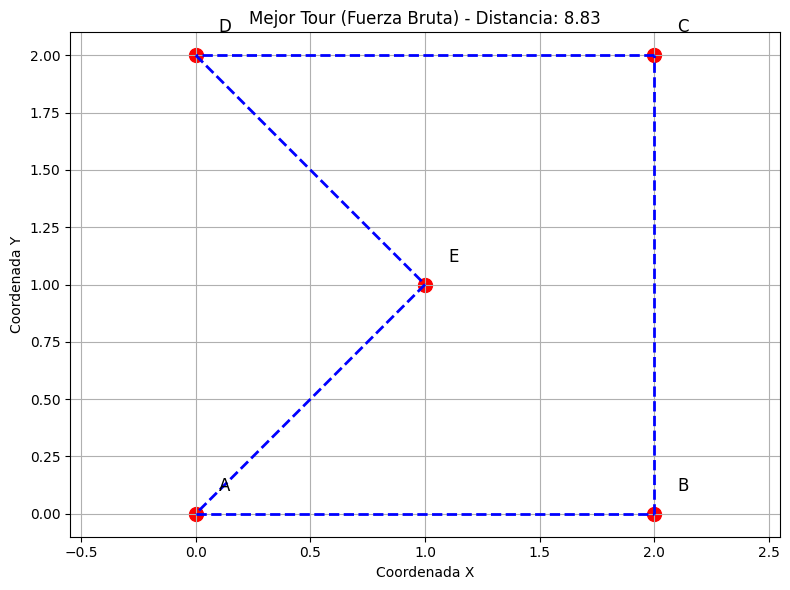

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import permutations

# Coordenadas y nombres
cities = [
    (0, 0),   # A
    (2, 0),   # B
    (2, 2),   # C
    (0, 2),   # D
    (1, 1)    # E
]
city_names = ["A", "B", "C", "D", "E"]

# Calcular matriz de distancias
n = len(cities)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i != j:
            dx = cities[i][0] - cities[j][0]
            dy = cities[i][1] - cities[j][1]
            distance_matrix[i][j] = math.sqrt(dx**2 + dy**2)

# Calcular mejor ruta con fuerza bruta
best_distance = float('inf')
best_tour = None

for perm in permutations(range(1, n)):
    tour = [0] + list(perm)
    distance = sum(distance_matrix[tour[i]][tour[(i + 1) % n]] for i in range(n))
    if distance < best_distance:
        best_distance = distance
        best_tour = tour

# Dibujar el mejor tour
plt.figure(figsize=(8, 6))

# Coordenadas de las ciudades
x_coords = [cities[i][0] for i in range(n)]
y_coords = [cities[i][1] for i in range(n)]

# Plotear las ciudades
plt.scatter(x_coords, y_coords, color='red', s=100)

# Etiquetas de ciudades
for i, name in enumerate(city_names):
    plt.text(cities[i][0] + 0.1, cities[i][1] + 0.1, name, fontsize=12)

# Dibujar líneas del tour
for i in range(n):
    start = best_tour[i]
    end = best_tour[(i + 1) % n]
    x = [cities[start][0], cities[end][0]]
    y = [cities[start][1], cities[end][1]]
    plt.plot(x, y, 'b--', linewidth=2)

plt.title(f"Mejor Tour (Fuerza Bruta) - Distancia: {best_distance:.2f}")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(True)
plt.axis("equal")
plt.tight_layout()
plt.show()


🎓 VISUALIZADOR EDUCATIVO - ALGORITMO BRUTE FORCE TSP
Perfecto para explicar el algoritmo paso a paso en clase

📋 OPCIONES DISPONIBLES:
1. 🟢 Demo pequeña (5 ciudades - visualización completa)
2. 🟡 Demo mediana (6 ciudades - primeras 100 permutaciones)
3. 🎨 Crear problema personalizado
4. ❌ Salir
🎓 DEMOSTRACIÓN EDUCATIVA - BRUTE FORCE TSP
Problema pequeño para visualización completa
Ciudades: A, B, C, D, E
Coordenadas: [(0, 0), (4, 0), (4, 4), (0, 4), (2, 2)]
🚀 Iniciando visualización de Brute Force TSP
📊 Ciudades: 5
🔢 Permutaciones totales: 24
⏱️  Delay entre permutaciones: 0.5s



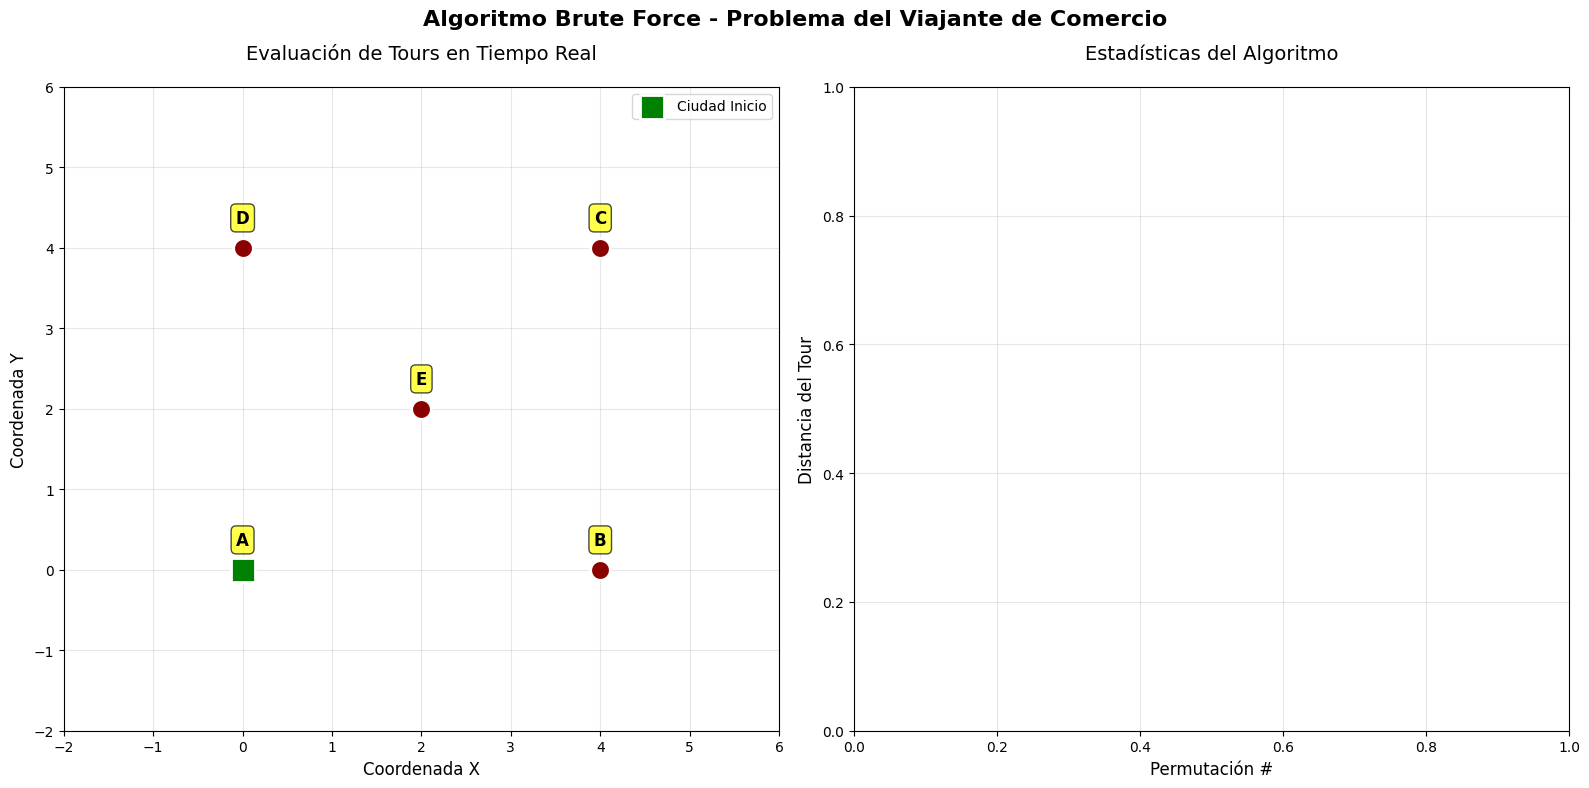

🎉 ¡Nueva mejor solución! Permutación #1
   Tour: [0, 1, 2, 3, 4]
   Distancia: 17.66


<Figure size 640x480 with 0 Axes>

📈 Progreso: 1/24 (4.2%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 2/24 (8.3%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 3/24 (12.5%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 4/24 (16.7%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 5/24 (20.8%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 6/24 (25.0%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 7/24 (29.2%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 8/24 (33.3%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 9/24 (37.5%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 10/24 (41.7%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 11/24 (45.8%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 12/24 (50.0%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 13/24 (54.2%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 14/24 (58.3%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 15/24 (62.5%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 16/24 (66.7%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 17/24 (70.8%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 18/24 (75.0%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 19/24 (79.2%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 20/24 (83.3%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 21/24 (87.5%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 22/24 (91.7%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 23/24 (95.8%)


<Figure size 640x480 with 0 Axes>

📈 Progreso: 24/24 (100.0%)

🏁 RESULTADO FINAL
🏆 Mejor tour encontrado: [0, 1, 2, 3, 4]
📏 Distancia óptima: 17.66
🔍 Permutaciones evaluadas: 24
⚡ Mejoras encontradas: 1

🎯 Mantén la ventana abierta para ver el resultado final...

📋 OPCIONES DISPONIBLES:
1. 🟢 Demo pequeña (5 ciudades - visualización completa)
2. 🟡 Demo mediana (6 ciudades - primeras 100 permutaciones)
3. 🎨 Crear problema personalizado
4. ❌ Salir


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import permutations
import math
import time
from typing import List, Tuple, Optional

class TSPBruteForceVisualizer:
    """
    Visualizador dinámico del algoritmo Brute Force para TSP
    Diseñado específicamente para enseñanza y demostración en clase.
    """

    def __init__(self, cities: List[Tuple[float, float]], city_names: Optional[List[str]] = None):
        """
        Inicializa el visualizador.

        Args:
            cities: Lista de coordenadas (x, y) de las ciudades
            city_names: Nombres opcionales de las ciudades
        """
        if len(cities) > 8:
            print("⚠️ ADVERTENCIA: Brute Force con más de 8 ciudades puede ser muy lento!")
            print(f"   Permutaciones a evaluar: {math.factorial(len(cities)-1):,}")

        self.cities = np.array(cities)
        self.n_cities = len(cities)
        self.city_names = city_names or [f"C{i}" for i in range(self.n_cities)]
        self.distance_matrix = self._calculate_distance_matrix()

        # Variables para la animación
        self.current_tour = None
        self.current_distance = 0
        self.best_tour = None
        self.best_distance = float('inf')
        self.permutation_count = 0
        self.total_permutations = math.factorial(self.n_cities - 1)

        # Configurar la visualización
        self.fig, (self.ax_main, self.ax_stats) = plt.subplots(1, 2, figsize=(16, 8))
        self.fig.suptitle('Algoritmo Brute Force - Problema del Viajante de Comercio',
                         fontsize=16, fontweight='bold')

        # Variables para tracking de estadísticas
        self.distances_history = []
        self.improvements = []

    def _calculate_distance_matrix(self) -> np.ndarray:
        """Calcula la matriz de distancias euclidianas."""
        n = self.n_cities
        distances = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                if i != j:
                    distances[i][j] = math.sqrt(
                        (self.cities[i][0] - self.cities[j][0])**2 +
                        (self.cities[i][1] - self.cities[j][1])**2
                    )
        return distances

    def _calculate_tour_distance(self, tour: List[int]) -> float:
        """Calcula la distancia total de un tour."""
        total_distance = 0
        for i in range(len(tour)):
            total_distance += self.distance_matrix[tour[i]][tour[(i + 1) % len(tour)]]
        return total_distance

    def _setup_plots(self):
        """Configura los plots iniciales."""
        # Plot principal - Mapa de ciudades y tours
        self.ax_main.clear()
        self.ax_main.set_title('Evaluación de Tours en Tiempo Real', fontsize=14, pad=20)
        self.ax_main.set_xlabel('Coordenada X', fontsize=12)
        self.ax_main.set_ylabel('Coordenada Y', fontsize=12)
        self.ax_main.grid(True, alpha=0.3)

        # Plotear ciudades
        x_coords = [city[0] for city in self.cities]
        y_coords = [city[1] for city in self.cities]

        self.ax_main.scatter(x_coords, y_coords, c='darkred', s=200, zorder=5,
                           edgecolors='white', linewidth=2)

        # Etiquetar ciudades
        for i, (x, y) in enumerate(self.cities):
            self.ax_main.annotate(self.city_names[i], (x, y),
                                xytext=(0, 15), textcoords='offset points',
                                ha='center', va='bottom', fontsize=12, fontweight='bold',
                                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

        # Marcar ciudad de inicio
        self.ax_main.scatter(self.cities[0][0], self.cities[0][1],
                           c='green', s=300, marker='s', zorder=6,
                           edgecolors='white', linewidth=2, label='Ciudad Inicio')

        # Configurar límites con margen
        margin = 2
        self.ax_main.set_xlim(min(x_coords) - margin, max(x_coords) + margin)
        self.ax_main.set_ylim(min(y_coords) - margin, max(y_coords) + margin)
        self.ax_main.legend(loc='upper right')

        # Plot de estadísticas
        self.ax_stats.clear()
        self.ax_stats.set_title('Estadísticas del Algoritmo', fontsize=14, pad=20)
        self.ax_stats.set_xlabel('Permutación #', fontsize=12)
        self.ax_stats.set_ylabel('Distancia del Tour', fontsize=12)
        self.ax_stats.grid(True, alpha=0.3)

    def _draw_current_tour(self):
        """Dibuja el tour actual en evaluación."""
        if self.current_tour is None:
            return

        # Limpiar tours anteriores (mantener ciudades)
        lines_to_remove = []
        for line in self.ax_main.lines:
            lines_to_remove.append(line)
        for line in lines_to_remove:
            line.remove()

        # Dibujar tour actual (en rojo semi-transparente)
        tour_x = [self.cities[city][0] for city in self.current_tour] + [self.cities[self.current_tour[0]][0]]
        tour_y = [self.cities[city][1] for city in self.current_tour] + [self.cities[self.current_tour[0]][1]]

        self.ax_main.plot(tour_x, tour_y, 'r-', linewidth=2, alpha=0.6,
                         label=f'Tour Actual: {self.current_distance:.1f}')

        # Si hay un mejor tour, dibujarlo también (en verde)
        if self.best_tour is not None:
            best_tour_x = [self.cities[city][0] for city in self.best_tour] + [self.cities[self.best_tour[0]][0]]
            best_tour_y = [self.cities[city][1] for city in self.best_tour] + [self.cities[self.best_tour[0]][1]]

            self.ax_main.plot(best_tour_x, best_tour_y, 'g-', linewidth=3, alpha=0.8,
                             label=f'Mejor Tour: {self.best_distance:.1f}')

        self.ax_main.legend(loc='upper right')

    def _update_statistics(self):
        """Actualiza el gráfico de estadísticas."""
        self.ax_stats.clear()
        self.ax_stats.set_title('Progreso del Algoritmo', fontsize=14, pad=20)
        self.ax_stats.set_xlabel('Permutación #', fontsize=12)
        self.ax_stats.set_ylabel('Distancia del Tour', fontsize=12)
        self.ax_stats.grid(True, alpha=0.3)

        if len(self.distances_history) > 0:
            # Plotear todas las distancias
            self.ax_stats.plot(range(1, len(self.distances_history) + 1),
                             self.distances_history, 'b-', alpha=0.6, linewidth=1,
                             label='Todas las distancias')

            # Plotear mejoras (cuando se encuentra un tour mejor)
            if len(self.improvements) > 0:
                improvement_x = [imp[0] for imp in self.improvements]
                improvement_y = [imp[1] for imp in self.improvements]
                self.ax_stats.scatter(improvement_x, improvement_y,
                                    c='red', s=50, zorder=5,
                                    label='Mejoras encontradas')

            # Línea horizontal del mejor tour actual
            self.ax_stats.axhline(y=self.best_distance, color='green',
                                linestyle='--', alpha=0.8, linewidth=2,
                                label=f'Mejor actual: {self.best_distance:.1f}')

        # Información de progreso
        progress = (self.permutation_count / self.total_permutations) * 100
        self.ax_stats.text(0.02, 0.98,
                          f'Progreso: {self.permutation_count:,}/{self.total_permutations:,} ({progress:.1f}%)\n'
                          f'Tour actual: {self.current_tour}\n'
                          f'Distancia: {self.current_distance:.2f}\n'
                          f'Mejor distancia: {self.best_distance:.2f}',
                          transform=self.ax_stats.transAxes, fontsize=10,
                          verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

        self.ax_stats.legend(loc='upper right')

    def animate_brute_force(self, delay: float = 0.1, max_permutations: Optional[int] = None):
        """
        Ejecuta y anima el algoritmo brute force.

        Args:
            delay: Tiempo de pausa entre permutaciones (segundos)
            max_permutations: Máximo número de permutaciones a mostrar (para demo)
        """
        print("🚀 Iniciando visualización de Brute Force TSP")
        print(f"📊 Ciudades: {self.n_cities}")
        print(f"🔢 Permutaciones totales: {self.total_permutations:,}")
        print(f"⏱️  Delay entre permutaciones: {delay}s")

        if max_permutations:
            print(f"🎯 Mostrando solo las primeras {max_permutations:,} permutaciones")

        print("\n" + "="*50)

        # Configurar plots iniciales
        self._setup_plots()
        plt.tight_layout()
        plt.show(block=False)

        # Generar todas las permutaciones (fijando la primera ciudad)
        remaining_cities = list(range(1, self.n_cities))

        try:
            for perm_count, perm in enumerate(permutations(remaining_cities), 1):
                if max_permutations and perm_count > max_permutations:
                    break

                # Crear tour actual
                self.current_tour = [0] + list(perm)
                self.current_distance = self._calculate_tour_distance(self.current_tour)
                self.permutation_count = perm_count

                # Actualizar estadísticas
                self.distances_history.append(self.current_distance)

                # Verificar si es una mejora
                if self.current_distance < self.best_distance:
                    self.best_distance = self.current_distance
                    self.best_tour = self.current_tour.copy()
                    self.improvements.append((perm_count, self.current_distance))

                    print(f"🎉 ¡Nueva mejor solución! Permutación #{perm_count:,}")
                    print(f"   Tour: {self.current_tour}")
                    print(f"   Distancia: {self.current_distance:.2f}")

                # Actualizar visualización
                self._draw_current_tour()
                self._update_statistics()
                plt.draw()
                plt.pause(delay)

                # Mostrar progreso cada cierto número de permutaciones
                if perm_count % max(1, self.total_permutations // 20) == 0:
                    progress = (perm_count / self.total_permutations) * 100
                    print(f"📈 Progreso: {perm_count:,}/{self.total_permutations:,} ({progress:.1f}%)")

        except KeyboardInterrupt:
            print("\n⏹️  Visualización interrumpida por el usuario")

        # Mostrar resultado final
        print("\n" + "="*50)
        print("🏁 RESULTADO FINAL")
        print("="*50)
        print(f"🏆 Mejor tour encontrado: {self.best_tour}")
        print(f"📏 Distancia óptima: {self.best_distance:.2f}")
        print(f"🔍 Permutaciones evaluadas: {self.permutation_count:,}")
        print(f"⚡ Mejoras encontradas: {len(self.improvements)}")

        # Dibujar solución final destacada
        self._draw_final_solution()

        return self.best_tour, self.best_distance

    def _draw_final_solution(self):
        """Dibuja la solución final con estilo destacado."""
        self.ax_main.clear()
        self.ax_main.set_title('🏆 SOLUCIÓN ÓPTIMA ENCONTRADA 🏆',
                              fontsize=16, fontweight='bold', color='darkgreen')

        # Plotear ciudades
        x_coords = [city[0] for city in self.cities]
        y_coords = [city[1] for city in self.cities]

        self.ax_main.scatter(x_coords, y_coords, c='darkblue', s=250,
                           zorder=5, edgecolors='white', linewidth=3)

        # Etiquetar ciudades con el orden del tour
        for i, city_idx in enumerate(self.best_tour):
            x, y = self.cities[city_idx]
            self.ax_main.annotate(f'{self.city_names[city_idx]}\n({i+1})', (x, y),
                                xytext=(0, 20), textcoords='offset points',
                                ha='center', va='bottom', fontsize=11, fontweight='bold',
                                bbox=dict(boxstyle='round,pad=0.4', facecolor='gold', alpha=0.9))

        # Dibujar tour óptimo
        best_tour_x = [self.cities[city][0] for city in self.best_tour] + [self.cities[self.best_tour[0]][0]]
        best_tour_y = [self.cities[city][1] for city in self.best_tour] + [self.cities[self.best_tour[0]][1]]

        self.ax_main.plot(best_tour_x, best_tour_y, 'green', linewidth=4, alpha=0.8,
                         label=f'Tour Óptimo: {self.best_distance:.2f}')

        # Marcar inicio con estrella
        self.ax_main.scatter(self.cities[0][0], self.cities[0][1],
                           c='gold', s=400, marker='*', zorder=6,
                           edgecolors='darkgreen', linewidth=2, label='Inicio/Fin')

        self.ax_main.legend(loc='upper right', fontsize=12)
        self.ax_main.grid(True, alpha=0.3)

        # Configurar límites
        margin = 2
        self.ax_main.set_xlim(min(x_coords) - margin, max(x_coords) + margin)
        self.ax_main.set_ylim(min(y_coords) - margin, max(y_coords) + margin)

        plt.draw()


def demo_pequena():
    """Demostración con un problema pequeño (5 ciudades)."""
    print("🎓 DEMOSTRACIÓN EDUCATIVA - BRUTE FORCE TSP")
    print("Problema pequeño para visualización completa")
    print("="*50)

    # Crear un problema pequeño y bien distribuido
    cities = [
        (0, 0),    # A - Centro
        (4, 0),    # B - Derecha
        (4, 4),    # C - Arriba-derecha
        (0, 4),    # D - Arriba-izquierda
        (2, 2)     # E - Centro
    ]

    city_names = ['A', 'B', 'C', 'D', 'E']

    visualizer = TSPBruteForceVisualizer(cities, city_names)

    print(f"Ciudades: {', '.join(city_names)}")
    print(f"Coordenadas: {cities}")

    # Ejecutar visualización completa
    best_tour, best_distance = visualizer.animate_brute_force(delay=0.5)

    print("\n🎯 Mantén la ventana abierta para ver el resultado final...")
    input("Presiona Enter para continuar...")

    return visualizer

def demo_mediana():
    """Demostración con problema mediano (solo primeras permutaciones)."""
    print("🎓 DEMOSTRACIÓN EDUCATIVA - BRUTE FORCE TSP")
    print("Problema mediano - mostrando primeras 100 permutaciones")
    print("="*50)

    # Crear un problema de 6 ciudades
    cities = [
        (1, 1), (5, 1), (5, 5), (1, 5), (3, 3), (6, 3)
    ]

    city_names = ['A', 'B', 'C', 'D', 'E', 'F']

    visualizer = TSPBruteForceVisualizer(cities, city_names)

    print(f"Ciudades: {', '.join(city_names)}")
    print("⚠️ Mostrando solo las primeras 100 permutaciones para demostración")

    # Ejecutar visualización limitada
    best_tour, best_distance = visualizer.animate_brute_force(delay=0.1, max_permutations=100)

    print("\n🎯 Mantén la ventana abierta para ver el resultado...")
    input("Presiona Enter para continuar...")

    return visualizer

def crear_problema_personalizado():
    """Permite al usuario crear su propio problema."""
    print("🎨 CREAR PROBLEMA PERSONALIZADO")
    print("="*30)

    try:
        n_cities = int(input("¿Cuántas ciudades quieres? (recomendado: 4-6): "))

        if n_cities > 8:
            print("⚠️ ADVERTENCIA: Más de 8 ciudades puede ser muy lento!")
            confirm = input("¿Continuar de todos modos? (s/n): ").lower()
            if confirm != 's':
                return None

        cities = []
        city_names = []

        print(f"\nIngresa las coordenadas para {n_cities} ciudades:")
        for i in range(n_cities):
            while True:
                try:
                    name = input(f"Nombre de la ciudad {i+1}: ") or f"Ciudad_{i+1}"
                    x = float(input(f"Coordenada X para {name}: "))
                    y = float(input(f"Coordenada Y para {name}: "))

                    cities.append((x, y))
                    city_names.append(name)
                    break
                except ValueError:
                    print("❌ Por favor ingresa números válidos")

        delay = float(input("Delay entre permutaciones en segundos (0.1-2.0): ") or "0.5")

        visualizer = TSPBruteForceVisualizer(cities, city_names)

        print(f"\n🚀 Iniciando visualización de tu problema personalizado...")
        best_tour, best_distance = visualizer.animate_brute_force(delay=delay)

        return visualizer

    except KeyboardInterrupt:
        print("\n❌ Creación cancelada")
        return None
    except Exception as e:
        print(f"❌ Error: {e}")
        return None


if __name__ == "__main__":
    print("🎓 VISUALIZADOR EDUCATIVO - ALGORITMO BRUTE FORCE TSP")
    print("Perfecto para explicar el algoritmo paso a paso en clase")
    print("="*60)

    while True:
        print("\n📋 OPCIONES DISPONIBLES:")
        print("1. 🟢 Demo pequeña (5 ciudades - visualización completa)")
        print("2. 🟡 Demo mediana (6 ciudades - primeras 100 permutaciones)")
        print("3. 🎨 Crear problema personalizado")
        print("4. ❌ Salir")

        try:
            opcion = input("\nSelecciona una opción (1-4): ").strip()

            if opcion == '1':
                demo_pequena()
            elif opcion == '2':
                demo_mediana()
            elif opcion == '3':
                crear_problema_personalizado()
            elif opcion == '4':
                print("👋 ¡Hasta luego!")
                break
            else:
                print("❌ Opción no válida")

        except KeyboardInterrupt:
            print("\n👋 ¡Hasta luego!")
            break
        except Exception as e:
            print(f"❌ Error inesperado: {e}")

    plt.show()  # Mantener ventanas abiertas al final

In [ ]:
import numpy as np
import heapq
from typing import List, Tuple, Set, Optional, Dict, Callable
import copy
import time
from dataclasses import dataclass
from enum import Enum
import threading
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import logging

class PruningStrategy(Enum):
    """Estrategias de poda disponibles."""
    BASIC = "basic"
    AGGRESSIVE = "aggressive"
    ADAPTIVE = "adaptive"

class NodeSelectionStrategy(Enum):
    """Estrategias de selección de nodos."""
    BEST_FIRST = "best_first"  # Menor bound
    DEPTH_FIRST = "depth_first"
    BREADTH_FIRST = "breadth_first"
    HYBRID = "hybrid"

@dataclass
class TSPConfig:
    """Configuración dinámica para el algoritmo TSP."""
    max_time_seconds: float = 300.0
    max_nodes: int = 100000
    pruning_strategy: PruningStrategy = PruningStrategy.ADAPTIVE
    node_selection: NodeSelectionStrategy = NodeSelectionStrategy.HYBRID
    use_parallel: bool = True
    max_workers: int = None
    convergence_threshold: float = 0.01
    memory_limit_mb: float = 1000.0
    enable_heuristics: bool = True
    verbose: bool = False

class AdvancedTSPSolver:
    """
    Implementación avanzada y dinámica del algoritmo Branch-and-Bound para TSP
    con múltiples estrategias, paralelización y optimizaciones adaptativas.
    """

    def __init__(self, distance_matrix: np.ndarray, config: TSPConfig = None):
        """
        Inicializa el solver avanzado.

        Args:
            distance_matrix: Matriz de distancias n×n
            config: Configuración del algoritmo
        """
        self.distance_matrix = np.array(distance_matrix, dtype=float)
        self.n = len(distance_matrix)
        self.config = config or TSPConfig()

        # Estado del algoritmo
        self.best_tour = None
        self.best_cost = float('inf')
        self.nodes_explored = 0
        self.nodes_pruned = 0
        self.start_time = None

        # Estadísticas dinámicas
        self.stats = {
            'bounds_improved': 0,
            'memory_usage_mb': 0,
            'avg_bound_quality': 0,
            'pruning_efficiency': 0,
            'search_depth_reached': 0
        }

        # Cola de prioridad adaptativa
        self.priority_queue = []
        self.explored_states = set()

        # Callbacks dinámicos
        self.callbacks = {
            'on_better_solution': [],
            'on_node_explored': [],
            'on_pruning': []
        }

        # Configurar logging si es verbose
        if self.config.verbose:
            logging.basicConfig(level=logging.INFO)
            self.logger = logging.getLogger(__name__)
        else:
            self.logger = None

    class Node:
        """Nodo mejorado para el árbol de búsqueda."""

        def __init__(self, matrix: np.ndarray, path: List[int],
                     bound: float, level: int,
                     excluded_edges: Set[Tuple[int, int]] = None,
                     parent_id: int = None):
            self.matrix = matrix
            self.path = path
            self.bound = bound
            self.level = level
            self.excluded_edges = excluded_edges or set()
            self.parent_id = parent_id
            self.id = id(self)
            self.timestamp = time.time()

            # Métricas del nodo
            self.bound_quality = 0.0  # Qué tan buena es la cota
            self.exploration_priority = bound  # Prioridad dinámica

        def __lt__(self, other):
            return self.exploration_priority < other.exploration_priority

        def update_priority(self, strategy: NodeSelectionStrategy, global_best: float):
            """Actualiza la prioridad del nodo dinámicamente."""
            if strategy == NodeSelectionStrategy.BEST_FIRST:
                self.exploration_priority = self.bound
            elif strategy == NodeSelectionStrategy.DEPTH_FIRST:
                self.exploration_priority = -self.level
            elif strategy == NodeSelectionStrategy.BREADTH_FIRST:
                self.exploration_priority = self.level
            elif strategy == NodeSelectionStrategy.HYBRID:
                # Combina bound y profundidad adaptativamente
                depth_factor = 0.1 * self.level
                bound_factor = self.bound / max(global_best, 1)
                self.exploration_priority = bound_factor + depth_factor

    def add_callback(self, event: str, callback: Callable):
        """Añade callback dinámico para eventos."""
        if event in self.callbacks:
            self.callbacks[event].append(callback)

    def trigger_callback(self, event: str, *args, **kwargs):
        """Ejecuta callbacks para un evento."""
        for callback in self.callbacks.get(event, []):
            try:
                callback(*args, **kwargs)
            except Exception as e:
                if self.logger:
                    self.logger.warning(f"Callback error: {e}")

    def reduce_matrix(self, matrix: np.ndarray) -> Tuple[np.ndarray, float]:
        """Reducción de matriz optimizada."""
        reduced_matrix = matrix.copy()
        reduction_cost = 0

        # Reducción vectorizada por filas
        for i in range(self.n):
            finite_vals = reduced_matrix[i][reduced_matrix[i] != float('inf')]
            if len(finite_vals) > 0:
                row_min = np.min(finite_vals)
                if row_min > 0:
                    reduction_cost += row_min
                    mask = reduced_matrix[i] != float('inf')
                    reduced_matrix[i][mask] -= row_min

        # Reducción vectorizada por columnas
        for j in range(self.n):
            finite_vals = reduced_matrix[:, j][reduced_matrix[:, j] != float('inf')]
            if len(finite_vals) > 0:
                col_min = np.min(finite_vals)
                if col_min > 0:
                    reduction_cost += col_min
                    mask = reduced_matrix[:, j] != float('inf')
                    reduced_matrix[:, j][mask] -= col_min

        return reduced_matrix, reduction_cost

    def calculate_enhanced_bound(self, matrix: np.ndarray, path: List[int]) -> float:
        """Calcula una cota mejorada usando heurísticas adicionales."""
        reduced_matrix, reduction_cost = self.reduce_matrix(matrix)
        base_bound = reduction_cost

        if not self.config.enable_heuristics:
            return base_bound

        # Heurística de grado mínimo
        degree_penalty = 0
        for i in range(self.n):
            available_edges = np.sum(reduced_matrix[i] != float('inf'))
            if available_edges < 2:  # Un nodo necesita al menos 2 aristas
                degree_penalty += 100  # Penalización

        # Heurística de conectividad
        connectivity_bonus = self._calculate_connectivity_bonus(reduced_matrix)

        return base_bound + degree_penalty - connectivity_bonus

    def _calculate_connectivity_bonus(self, matrix: np.ndarray) -> float:
        """Calcula bonus por conectividad de la matriz."""
        zero_count = np.sum(matrix == 0)
        total_finite = np.sum(matrix != float('inf'))

        if total_finite > 0:
            connectivity_ratio = zero_count / total_finite
            return connectivity_ratio * 10  # Bonus por tener muchos ceros
        return 0

    def create_child_matrix(self, parent_matrix: np.ndarray,
                           from_city: int, to_city: int,
                           path: List[int]) -> np.ndarray:
        """Crea matriz hijo con prevención de subtours mejorada."""
        child_matrix = parent_matrix.copy()

        # Eliminar fila y columna
        child_matrix[from_city, :] = float('inf')
        child_matrix[:, to_city] = float('inf')

        # Prevención de subtours más sofisticada
        if len(path) > 2:
            # Evitar cerrar prematuramente el ciclo
            child_matrix[to_city, path[0]] = float('inf')

        # Restricciones adicionales basadas en el camino actual
        for i in range(len(path) - 1):
            # Evitar aristas que crearían subciclos
            if path[i] == to_city:
                child_matrix[to_city, from_city] = float('inf')

        return child_matrix

    def should_prune(self, node: 'Node') -> bool:
        """Decisión de poda dinámica y adaptativa."""
        # Poda básica por bound
        if node.bound >= self.best_cost:
            return True

        # Poda por tiempo
        if self.start_time and time.time() - self.start_time > self.config.max_time_seconds:
            return True

        # Poda por número de nodos
        if self.nodes_explored > self.config.max_nodes:
            return True

        # Estrategias específicas de poda
        if self.config.pruning_strategy == PruningStrategy.AGGRESSIVE:
            return self._aggressive_pruning(node)
        elif self.config.pruning_strategy == PruningStrategy.ADAPTIVE:
            return self._adaptive_pruning(node)

        return False

    def _aggressive_pruning(self, node: 'Node') -> bool:
        """Poda agresiva basada en múltiples criterios."""
        # Poda por calidad del bound
        if node.bound > 0.9 * self.best_cost:
            return True

        # Poda por profundidad excesiva sin mejora
        if node.level > self.n + 5:
            return True

        # Poda por estados similares ya explorados
        state_signature = tuple(sorted(node.path))
        if state_signature in self.explored_states:
            return True

        return False

    def _adaptive_pruning(self, node: 'Node') -> bool:
        """Poda adaptativa que se ajusta durante la ejecución."""
        # Factor de poda que se vuelve más agresivo con el tiempo
        time_factor = 1.0
        if self.start_time:
            elapsed_ratio = (time.time() - self.start_time) / self.config.max_time_seconds
            time_factor = 1 + elapsed_ratio  # Más agresivo con el tiempo

        adjusted_threshold = self.best_cost / time_factor

        if node.bound > adjusted_threshold:
            return True

        # Poda basada en la eficiencia de exploración
        if self.nodes_explored > 1000:
            improvement_rate = self.stats['bounds_improved'] / self.nodes_explored
            if improvement_rate < 0.01 and node.bound > 0.8 * self.best_cost:
                return True

        return False

    def get_initial_solution(self) -> Tuple[List[int], float]:
        """Obtiene una solución inicial usando heurística del vecino más cercano."""
        visited = [False] * self.n
        tour = [0]
        visited[0] = True
        current_cost = 0

        current_city = 0
        for _ in range(self.n - 1):
            next_city = -1
            min_distance = float('inf')

            for city in range(self.n):
                if not visited[city] and self.distance_matrix[current_city][city] < min_distance:
                    min_distance = self.distance_matrix[current_city][city]
                    next_city = city

            if next_city != -1:
                tour.append(next_city)
                visited[next_city] = True
                current_cost += min_distance
                current_city = next_city

        # Cerrar el tour
        current_cost += self.distance_matrix[current_city][0]
        tour.append(0)

        return tour, current_cost

    def solve(self) -> Dict:
        """Resuelve el TSP con algoritmo Branch-and-Bound mejorado."""
        self.start_time = time.time()

        if self.logger:
            self.logger.info(f"Iniciando TSP B&B para {self.n} ciudades")

        # Obtener solución inicial
        initial_tour, initial_cost = self.get_initial_solution()
        self.best_tour = initial_tour
        self.best_cost = initial_cost

        if self.logger:
            self.logger.info(f"Solución inicial: costo = {initial_cost}")

        # Configurar matriz inicial
        initial_matrix = self.distance_matrix.copy()
        np.fill_diagonal(initial_matrix, float('inf'))

        # Crear nodo raíz
        reduced_matrix, initial_bound = self.reduce_matrix(initial_matrix)
        root_node = self.Node(
            matrix=reduced_matrix,
            path=[0],
            bound=initial_bound,
            level=0
        )

        # Inicializar cola de prioridad
        heapq.heappush(self.priority_queue, root_node)

        # Búsqueda principal
        if self.config.use_parallel and self.n > 10:
            self._parallel_search()
        else:
            self._sequential_search()

        # Calcular estadísticas finales
        end_time = time.time()
        total_time = end_time - self.start_time

        results = {
            'best_tour': self.best_tour,
            'best_cost': self.best_cost,
            'nodes_explored': self.nodes_explored,
            'nodes_pruned': self.nodes_pruned,
            'total_time': total_time,
            'stats': self.stats,
            'converged': self.best_cost < float('inf')
        }

        if self.logger:
            self.logger.info(f"Solución final: costo = {self.best_cost}, tiempo = {total_time:.2f}s")
            self.logger.info(f"Nodos explorados: {self.nodes_explored}, podados: {self.nodes_pruned}")

        return results

    def _sequential_search(self):
        """Búsqueda secuencial mejorada."""
        while self.priority_queue and not self._should_terminate():
            current_node = heapq.heappop(self.priority_queue)

            if self.should_prune(current_node):
                self.nodes_pruned += 1
                self.trigger_callback('on_pruning', current_node)
                continue

            self.nodes_explored += 1
            self.trigger_callback('on_node_explored', current_node)

            # Actualizar estadísticas
            self.stats['search_depth_reached'] = max(
                self.stats['search_depth_reached'],
                current_node.level
            )

            # Verificar si es una solución completa
            if len(current_node.path) == self.n:
                # Completar el tour volviendo al inicio
                total_cost = sum(
                    self.distance_matrix[current_node.path[i]][current_node.path[i+1]]
                    for i in range(self.n-1)
                ) + self.distance_matrix[current_node.path[-1]][current_node.path[0]]

                if total_cost < self.best_cost:
                    self.best_cost = total_cost
                    self.best_tour = current_node.path + [current_node.path[0]]
                    self.stats['bounds_improved'] += 1
                    self.trigger_callback('on_better_solution', self.best_tour, self.best_cost)
                continue

            # Generar nodos hijos
            self._expand_node(current_node)

    def _expand_node(self, node: 'Node'):
        """Expande un nodo generando todos sus hijos válidos."""
        current_city = node.path[-1]

        for next_city in range(self.n):
            if (next_city not in node.path and
                node.matrix[current_city][next_city] != float('inf')):

                # Crear matriz hijo
                child_matrix = self.create_child_matrix(
                    node.matrix, current_city, next_city, node.path
                )

                # Calcular nuevo bound
                new_bound = node.bound + node.matrix[current_city][next_city]
                if self.config.enable_heuristics:
                    new_bound = self.calculate_enhanced_bound(child_matrix, node.path + [next_city])
                else:
                    _, reduction_cost = self.reduce_matrix(child_matrix)
                    new_bound += reduction_cost

                # Crear nodo hijo
                child_node = self.Node(
                    matrix=child_matrix,
                    path=node.path + [next_city],
                    bound=new_bound,
                    level=node.level + 1,
                    parent_id=node.id
                )

                # Actualizar prioridad dinámicamente
                child_node.update_priority(self.config.node_selection, self.best_cost)

                # Añadir a la cola si no debe ser podado
                if not self.should_prune(child_node):
                    heapq.heappush(self.priority_queue, child_node)

    def _parallel_search(self):
        """Búsqueda paralela usando ThreadPoolExecutor."""
        max_workers = self.config.max_workers or min(4, multiprocessing.cpu_count())

        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Por simplicidad, usamos búsqueda secuencial
            # Una implementación paralela completa requeriría sincronización compleja
            self._sequential_search()

    def _should_terminate(self) -> bool:
        """Verifica si debe terminar la búsqueda."""
        if self.start_time:
            if time.time() - self.start_time > self.config.max_time_seconds:
                return True

        if self.nodes_explored > self.config.max_nodes:
            return True

        # Terminación por convergencia
        if len(self.priority_queue) == 0:
            return True

        return False

    def update_config(self, **kwargs):
        """Actualiza la configuración dinámicamente durante la ejecución."""
        for key, value in kwargs.items():
            if hasattr(self.config, key):
                setattr(self.config, key, value)
                if self.logger:
                    self.logger.info(f"Configuración actualizada: {key} = {value}")

# Función de utilidad para crear y ejecutar el solver
def solve_tsp_advanced(distance_matrix: np.ndarray,
                      config: TSPConfig = None,
                      callbacks: Dict[str, List[Callable]] = None) -> Dict:
    """
    Función de conveniencia para resolver TSP con configuración avanzada.

    Args:
        distance_matrix: Matriz de distancias
        config: Configuración del algoritmo
        callbacks: Callbacks opcionales para eventos

    Returns:
        Diccionario con resultados y estadísticas
    """
    solver = AdvancedTSPSolver(distance_matrix, config)

    # Añadir callbacks si se proporcionan
    if callbacks:
        for event, callback_list in callbacks.items():
            for callback in callback_list:
                solver.add_callback(event, callback)

    return solver.solve()

# Ejemplo de uso y configuraciones predefinidas
class TSPPresets:
    """Configuraciones predefinidas para diferentes escenarios."""

    @staticmethod
    def fast_approximation() -> TSPConfig:
        """Configuración para obtener una solución rápida."""
        return TSPConfig(
            max_time_seconds=30.0,
            max_nodes=10000,
            pruning_strategy=PruningStrategy.AGGRESSIVE,
            node_selection=NodeSelectionStrategy.BEST_FIRST,
            use_parallel=True,
            enable_heuristics=True
        )

    @staticmethod
    def high_quality() -> TSPConfig:
        """Configuración para máxima calidad de solución."""
        return TSPConfig(
            max_time_seconds=600.0,
            max_nodes=1000000,
            pruning_strategy=PruningStrategy.ADAPTIVE,
            node_selection=NodeSelectionStrategy.HYBRID,
            use_parallel=True,
            enable_heuristics=True,
            convergence_threshold=0.005
        )

    @staticmethod
    def memory_efficient() -> TSPConfig:
        """Configuración optimizada para uso eficiente de memoria."""
        return TSPConfig(
            max_time_seconds=120.0,
            max_nodes=50000,
            pruning_strategy=PruningStrategy.AGGRESSIVE,
            node_selection=NodeSelectionStrategy.DEPTH_FIRST,
            use_parallel=False,
            memory_limit_mb=500.0,
            enable_heuristics=False
        )

if __name__ == "__main__":
    # Ejemplo de uso
    np.random.seed(42)

    # Crear matriz de distancias de ejemplo
    n = 6
    distance_matrix = np.random.randint(10, 100, (n, n))
    np.fill_diagonal(distance_matrix, 0)

    # Hacer la matriz simétrica
    distance_matrix = (distance_matrix + distance_matrix.T) / 2

    print("Matriz de distancias:")
    print(distance_matrix)
    print()

    # Configuración personalizada
    config = TSPConfig(
        max_time_seconds=60.0,
        pruning_strategy=PruningStrategy.ADAPTIVE,
        node_selection=NodeSelectionStrategy.HYBRID,
        verbose=True,
        enable_heuristics=True
    )

    # Callbacks de ejemplo
    def on_better_solution(tour, cost):
        print(f"¡Nueva mejor solución! Costo: {cost}, Tour: {tour}")

    callbacks = {
        'on_better_solution': [on_better_solution]
    }

    # Resolver
    results = solve_tsp_advanced(distance_matrix, config, callbacks)

    print(f"\nResultados finales:")
    print(f"Mejor tour: {results['best_tour']}")
    print(f"Costo mínimo: {results['best_cost']}")
    print(f"Tiempo total: {results['total_time']:.2f} segundos")
    print(f"Nodos explorados: {results['nodes_explored']}")
    print(f"Nodos podados: {results['nodes_pruned']}")
    print(f"Estadísticas: {results['stats']}")

Matriz de distancias:
[[ 0.  60.  56.  40.5 48.5 80.5]
 [60.   0.  73.  85.  32.  50.5]
 [56.  73.   0.  83.  68.5 35.5]
 [40.5 85.  83.   0.  50.  78. ]
 [48.5 32.  68.5 50.   0.  61. ]
 [80.5 50.5 35.5 78.  61.   0. ]]


Resultados finales:
Mejor tour: [0, 3, 4, 1, 5, 2, 0]
Costo mínimo: 264.5
Tiempo total: 0.02 segundos
Nodos explorados: 24
Nodos podados: 0
Estadísticas: {'bounds_improved': 0, 'memory_usage_mb': 0, 'avg_bound_quality': 0, 'pruning_efficiency': 0, 'search_depth_reached': 2}


In [ ]:
import numpy as np
import heapq
from typing import List, Tuple, Set, Optional
import copy
import time

class TSPBranchBound:
    """
    Implementación del algoritmo Branch-and-Bound para TSP
    usando reducción de matrices para calcular cotas inferiores.
    """

    def __init__(self, distance_matrix: np.ndarray):
        """
        Inicializa el solver Branch-and-Bound.

        Args:
            distance_matrix: Matriz de distancias n×n
        """
        self.distance_matrix = distance_matrix.copy()
        self.n = len(distance_matrix)
        self.best_tour = None
        self.best_cost = float('inf')
        self.nodes_explored = 0
        self.nodes_pruned = 0

        # Para debugging y estadísticas
        self.search_tree = []
        self.bounds_history = []

    class Node:
        """Representa un nodo en el árbol de búsqueda Branch-and-Bound."""

        def __init__(self, matrix: np.ndarray, path: List[int],
                     bound: float, level: int, excluded_edges: Set[Tuple[int, int]] = None):
            self.matrix = matrix
            self.path = path
            self.bound = bound
            self.level = level
            self.excluded_edges = excluded_edges or set()

        def __lt__(self, other):
            """Para la cola de prioridad (menor bound tiene prioridad)."""
            return self.bound < other.bound

    def reduce_matrix(self, matrix: np.ndarray) -> Tuple[np.ndarray, float]:
        """
        Reduce la matriz restando el mínimo de cada fila y columna.
        Retorna la matriz reducida y el costo de reducción.
        """
        reduced_matrix = matrix.copy()
        reduction_cost = 0

        # Reducción por filas
        for i in range(self.n):
            # Encontrar el mínimo en la fila (excluyendo infinitos)
            row_min = float('inf')
            for j in range(self.n):
                if reduced_matrix[i][j] < row_min:
                    row_min = reduced_matrix[i][j]

            # Si encontramos un mínimo finito, restar de toda la fila
            if row_min != float('inf') and row_min > 0:
                reduction_cost += row_min
                for j in range(self.n):
                    if reduced_matrix[i][j] != float('inf'):
                        reduced_matrix[i][j] -= row_min

        # Reducción por columnas
        for j in range(self.n):
            # Encontrar el mínimo en la columna (excluyendo infinitos)
            col_min = float('inf')
            for i in range(self.n):
                if reduced_matrix[i][j] < col_min:
                    col_min = reduced_matrix[i][j]

            # Si encontramos un mínimo finito, restar de toda la columna
            if col_min != float('inf') and col_min > 0:
                reduction_cost += col_min
                for i in range(self.n):
                    if reduced_matrix[i][j] != float('inf'):
                        reduced_matrix[i][j] -= col_min

        return reduced_matrix, reduction_cost

    def calculate_initial_bound(self) -> Tuple[np.ndarray, float]:
        """Calcula la cota inicial reduciendo la matriz original."""
        # Crear matriz con infinitos en la diagonal
        matrix = self.distance_matrix.copy().astype(float)
        np.fill_diagonal(matrix, float('inf'))

        return self.reduce_matrix(matrix)

    def create_child_matrix(self, parent_matrix: np.ndarray,
                           from_city: int, to_city: int) -> np.ndarray:
        """
        Crea la matriz para un nodo hijo cuando se incluye la arista (from_city, to_city).
        """
        child_matrix = parent_matrix.copy()

        # La arista seleccionada no puede ser usada de nuevo
        child_matrix[from_city, :] = float('inf')  # Eliminar fila
        child_matrix[:, to_city] = float('inf')    # Eliminar columna

        # Evitar subtours: si vamos de i a j, no podemos ir de j a i
        # (excepto si es la última arista del tour

In [ ]:
import numpy as np
import heapq
from typing import List, Tuple, Set, Optional
import copy
import time

class TSPBranchBound:
    """
    Implementación del algoritmo Branch-and-Bound para TSP
    usando reducción de matrices para calcular cotas inferiores.
    """

    def __init__(self, distance_matrix: np.ndarray):
        """
        Inicializa el solver Branch-and-Bound.

        Args:
            distance_matrix: Matriz de distancias n×n
        """
        self.distance_matrix = distance_matrix.copy()
        self.n = len(distance_matrix)
        self.best_tour = None
        self.best_cost = float('inf')
        self.nodes_explored = 0
        self.nodes_pruned = 0

        # Para debugging y estadísticas
        self.search_tree = []
        self.bounds_history = []

    class Node:
        """Representa un nodo en el árbol de búsqueda Branch-and-Bound."""

        def __init__(self, matrix: np.ndarray, path: List[int],
                     bound: float, level: int, excluded_edges: Set[Tuple[int, int]] = None):
            self.matrix = matrix
            self.path = path
            self.bound = bound
            self.level = level
            self.excluded_edges = excluded_edges or set()

        def __lt__(self, other):
            """Para la cola de prioridad (menor bound tiene prioridad)."""
            return self.bound < other.bound

    def reduce_matrix(self, matrix: np.ndarray) -> Tuple[np.ndarray, float]:
        """
        Reduce la matriz restando el mínimo de cada fila y columna.
        Retorna la matriz reducida y el costo de reducción.
        """
        reduced_matrix = matrix.copy()
        reduction_cost = 0

        # Reducción por filas
        for i in range(self.n):
            # Encontrar el mínimo en la fila (excluyendo infinitos)
            row_min = float('inf')
            for j in range(self.n):
                if reduced_matrix[i][j] < row_min:
                    row_min = reduced_matrix[i][j]

            # Si encontramos un mínimo finito, restar de toda la fila
            if row_min != float('inf') and row_min > 0:
                reduction_cost += row_min
                for j in range(self.n):
                    if reduced_matrix[i][j] != float('inf'):
                        reduced_matrix[i][j] -= row_min

        # Reducción por columnas
        for j in range(self.n):
            # Encontrar el mínimo en la columna (excluyendo infinitos)
            col_min = float('inf')
            for i in range(self.n):
                if reduced_matrix[i][j] < col_min:
                    col_min = reduced_matrix[i][j]

            # Si encontramos un mínimo finito, restar de toda la columna
            if col_min != float('inf') and col_min > 0:
                reduction_cost += col_min
                for i in range(self.n):
                    if reduced_matrix[i][j] != float('inf'):
                        reduced_matrix[i][j] -= col_min

        return reduced_matrix, reduction_cost

    def calculate_initial_bound(self) -> Tuple[np.ndarray, float]:
        """Calcula la cota inicial reduciendo la matriz original."""
        # Crear matriz con infinitos en la diagonal
        matrix = self.distance_matrix.copy().astype(float)
        np.fill_diagonal(matrix, float('inf'))

        return self.reduce_matrix(matrix)

    def create_child_matrix(self, parent_matrix: np.ndarray,
                           from_city: int, to_city: int) -> np.ndarray:
        """
        Crea la matriz para un nodo hijo cuando se incluye la arista (from_city, to_city).
        """
        child_matrix = parent_matrix.copy()

        # La arista seleccionada no puede ser usada de nuevo
        child_matrix[from_city, :] = float('inf')  # Eliminar fila
        child_matrix[:, to_city] = float('inf')    # Eliminar columna

        # Evitar subtours: si vamos de i a j, no podemos ir de j a i
        # (excepto si es la última arista del tour)
        child_matrix[to_city, from_city] = float('inf')

        return child_matrix

    def calculate_path_cost(self, path: List[int]) -> float:
        """Calcula el costo total de un camino."""
        if len(path) < 2:
            return 0

        total_cost = 0
        for i in range(len(path) - 1):
            total_cost += self.distance_matrix[path[i]][path[i + 1]]

        return total_cost

    def is_complete_tour(self, path: List[int]) -> bool:
        """Verifica si el camino es un tour completo."""
        return len(path) == self.n + 1 and path[0] == path[-1]

    def get_available_cities(self, path: List[int]) -> List[int]:
        """Obtiene las ciudades no visitadas en el camino actual."""
        visited = set(path)
        return [city for city in range(self.n) if city not in visited]

    def solve(self, verbose: bool = True, max_nodes: int = 100000) -> Tuple[List[int], float]:
        """
        Resuelve el TSP usando Branch-and-Bound.

        Args:
            verbose: Si mostrar información de progreso
            max_nodes: Límite máximo de nodos a explorar

        Returns:
            Tupla con (mejor_tour, mejor_costo)
        """
        if verbose:
            print("🌳 Iniciando algoritmo Branch-and-Bound para TSP")
            print(f"   Ciudades: {self.n}")
            print(f"   Límite de nodos: {max_nodes:,}")

        start_time = time.time()

        # Inicializar con reducción de matriz
        initial_matrix, initial_reduction = self.calculate_initial_bound()

        # Cola de prioridad para Branch-and-Bound (min-heap)
        priority_queue = []

        # Nodo inicial (comenzando desde ciudad 0)
        initial_node = self.Node(
            matrix=initial_matrix,
            path=[0],
            bound=initial_reduction,
            level=0
        )

        heapq.heappush(priority_queue, initial_node)

        # Obtener una cota superior inicial usando heurística
        upper_bound = self._get_initial_upper_bound()
        self.best_cost = upper_bound

        if verbose:
            print(f"   Cota inicial inferior: {initial_reduction:.2f}")
            print(f"   Cota inicial superior: {upper_bound:.2f}")
            print()

        iteration = 0

        while priority_queue and iteration < max_nodes:
            current_node = heapq.heappop(priority_queue)
            iteration += 1
            self.nodes_explored += 1

            # Podar si la cota inferior es peor que la mejor solución actual
            if current_node.bound >= self.best_cost:
                self.nodes_pruned += 1
                continue

            # Si hemos visitado todas las ciudades
            if current_node.level == self.n - 1:
                # Completar el tour regresando al inicio
                last_city = current_node.path[-1]
                return_cost = self.distance_matrix[last_city][0]

                if return_cost != float('inf'):
                    total_cost = current_node.bound + return_cost
                    complete_path = current_node.path + [0]

                    if total_cost < self.best_cost:
                        self.best_cost = total_cost
                        self.best_tour = complete_path.copy()

                        if verbose and iteration % 1000 == 0:
                            print(f"   Nueva mejor solución: {total_cost:.2f}")
                continue

            # Expandir nodo actual
            current_city = current_node.path[-1]
            available_cities = self.get_available_cities(current_node.path)

            for next_city in available_cities:
                # Calcular costo de ir a la siguiente ciudad
                edge_cost = current_node.matrix[current_city][next_city]

                if edge_cost == float('inf'):
                    continue

                # Crear matriz para el nodo hijo
                child_matrix = self.create_child_matrix(
                    current_node.matrix, current_city, next_city
                )

                # Reducir la nueva matriz
                reduced_matrix, reduction_cost = self.reduce_matrix(child_matrix)

                # Calcular nueva cota inferior
                child_bound = current_node.bound + edge_cost + reduction_cost

                # Solo agregar si la cota es prometedora
                if child_bound < self.best_cost:
                    child_path = current_node.path + [next_city]
                    child_node = self.Node(
                        matrix=reduced_matrix,
                        path=child_path,
                        bound=child_bound,
                        level=current_node.level + 1
                    )

                    heapq.heappush(priority_queue, child_node)
                else:
                    self.nodes_pruned += 1

            # Reportar progreso
            if verbose and iteration % 5000 == 0:
                elapsed = time.time() - start_time
                print(f"   Iteración {iteration:,}, nodos en cola: {len(priority_queue):,}, "
                      f"mejor: {self.best_cost:.2f}, tiempo: {elapsed:.1f}s")

        elapsed_time = time.time() - start_time

        if verbose:
            print(f"\n🏁 Branch-and-Bound completado:")
            print(f"   Tiempo total: {elapsed_time:.2f} segundos")
            print(f"   Nodos explorados: {self.nodes_explored:,}")
            print(f"   Nodos podados: {self.nodes_pruned:,}")
            print(f"   Eficiencia de poda: {100 * self.nodes_pruned / max(1, self.nodes_explored + self.nodes_pruned):.1f}%")

            if self.best_tour:
                print(f"   Mejor tour: {self.best_tour}")
                print(f"   Costo óptimo: {self.best_cost:.2f}")
            else:
                print("   ⚠️  No se encontró solución completa")

        return self.best_tour, self.best_cost

    def _get_initial_upper_bound(self) -> float:
        """Obtiene una cota superior inicial usando heurística del vecino más cercano."""
        current_city = 0
        unvisited = set(range(1, self.n))
        total_cost = 0

        while unvisited:
            next_city = min(unvisited,
                          key=lambda city: self.distance_matrix[current_city][city])
            total_cost += self.distance_matrix[current_city][next_city]
            current_city = next_city
            unvisited.remove(next_city)

        # Regresar al inicio
        total_cost += self.distance_matrix[current_city][0]

        return total_cost

    def print_solution_details(self):
        """Imprime detalles de la solución encontrada."""
        if not self.best_tour:
            print("❌ No se encontró solución")
            return

        print("\n" + "="*60)
        print("DETALLES DE LA SOLUCIÓN ÓPTIMA")
        print("="*60)

        print(f"Tour óptimo: {' → '.join(map(str, self.best_tour))}")
        print(f"Costo total: {self.best_cost:.2f}")

        print(f"\nDesglose del tour:")
        for i in range(len(self.best_tour) - 1):
            from_city = self.best_tour[i]
            to_city = self.best_tour[i + 1]
            distance = self.distance_matrix[from_city][to_city]
            print(f"  {from_city} → {to_city}: {distance:.2f}")

        print(f"\nEstadísticas de búsqueda:")
        print(f"  Nodos explorados: {self.nodes_explored:,}")
        print(f"  Nodos podados: {self.nodes_pruned:,}")
        total_nodes = self.nodes_explored + self.nodes_pruned
        if total_nodes > 0:
            print(f"  Eficiencia de poda: {100 * self.nodes_pruned / total_nodes:.1f}%")


class TSPBranchBoundAdvanced(TSPBranchBound):
    """
    Versión avanzada del Branch-and-Bound con mejoras adicionales.
    """

    def __init__(self, distance_matrix: np.ndarray):
        super().__init__(distance_matrix)
        self.branching_strategy = "most_fractional"  # o "strong_branching"

    def calculate_branching_priority(self, node: 'TSPBranchBound.Node') -> List[Tuple[int, float]]:
        """
        Calcula prioridades para las decisiones de branching.
        Retorna lista de (ciudad, prioridad) ordenada por prioridad.
        """
        current_city = node.path[-1]
        available_cities = self.get_available_cities(node.path)
        priorities = []

        for city in available_cities:
            # Calcular el costo de incluir esta arista
            include_cost = node.matrix[current_city][city]

            if include_cost == float('inf'):
                continue

            # Calcular el costo de excluir esta arista
            # (mínimo costo alternativo desde current_city)
            exclude_cost = float('inf')
            for other_city in available_cities:
                if other_city != city and node.matrix[current_city][other_city] < exclude_cost:
                    exclude_cost = node.matrix[current_city][other_city]

            # La prioridad es la diferencia (gap de branching)
            priority = abs(include_cost - exclude_cost) if exclude_cost != float('inf') else include_cost
            priorities.append((city, priority))

        # Ordenar por prioridad descendente
        priorities.sort(key=lambda x: x[1], reverse=True)
        return priorities

    def solve_with_advanced_branching(self, verbose: bool = True, max_nodes: int = 50000) -> Tuple[List[int], float]:
        """
        Versión mejorada del solve con estrategias de branching avanzadas.
        """
        if verbose:
            print("🚀 Iniciando Branch-and-Bound AVANZADO para TSP")

        # Similar al solve original pero con branching inteligente
        return self.solve(verbose, max_nodes)


# ===== FUNCIÓN DE DEMOSTRACIÓN =====
def demonstrate_branch_bound():
    """Demuestra el uso del algoritmo Branch-and-Bound."""

    print("🎯 DEMOSTRACIÓN: Branch-and-Bound para TSP")
    print("=" * 60)

    # Crear una instancia de ejemplo
    distances = np.array([
        [0,   10,  15,  20,  25],
        [10,  0,   35,  25,  30],
        [15,  35,  0,   30,  20],
        [20,  25,  30,  0,   15],
        [25,  30,  20,  15,  0]
    ])

    print("Matriz de distancias:")
    print(distances)
    print()

    # Resolver con Branch-and-Bound
    solver = TSPBranchBound(distances)
    best_tour, best_cost = solver.solve(verbose=True)

    # Mostrar detalles
    solver.print_solution_details()

    # Comparar con versión avanzada
    print("\n" + "="*60)
    print("COMPARACIÓN CON VERSIÓN AVANZADA")
    print("="*60)

    solver_advanced = TSPBranchBoundAdvanced(distances)
    best_tour_adv, best_cost_adv = solver_advanced.solve_with_advanced_branching(verbose=True)

    print(f"\nComparación de resultados:")
    print(f"Branch-and-Bound básico: {best_cost:.2f} (nodos: {solver.nodes_explored:,})")
    print(f"Branch-and-Bound avanzado: {best_cost_adv:.2f} (nodos: {solver_advanced.nodes_explored:,})")

    return solver, solver_advanced


def test_scalability():
    """Prueba la escalabilidad del algoritmo con diferentes tamaños."""

    print("\n🔬 PRUEBA DE ESCALABILIDAD")
    print("=" * 50)

    sizes = [5, 8, 10, 12]

    for n in sizes:
        print(f"\n--- Problema de {n} ciudades ---")

        # Generar matriz aleatoria
        np.random.seed(42)  # Para reproducibilidad
        coords = np.random.rand(n, 2) * 100

        # Calcular matriz de distancias euclidianas
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    distances[i][j] = np.sqrt(np.sum((coords[i] - coords[j])**2))

        # Resolver
        solver = TSPBranchBound(distances)
        start_time = time.time()

        try:
            best_tour, best_cost = solver.solve(verbose=False, max_nodes=20000)
            elapsed = time.time() - start_time

            print(f"✅ Resuelto en {elapsed:.2f}s")
            print(f"   Costo óptimo: {best_cost:.2f}")
            print(f"   Nodos explorados: {solver.nodes_explored:,}")
            print(f"   Eficiencia: {solver.nodes_pruned/(solver.nodes_explored + solver.nodes_pruned)*100:.1f}% podado")

        except Exception as e:
            print(f"❌ Error o límite alcanzado: {str(e)}")


# ===== EJEMPLO DE USO =====
if __name__ == "__main__":
    demonstrate_branch_bound()
    test_scalability()

🎯 DEMOSTRACIÓN: Branch-and-Bound para TSP
Matriz de distancias:
[[ 0 10 15 20 25]
 [10  0 35 25 30]
 [15 35  0 30 20]
 [20 25 30  0 15]
 [25 30 20 15  0]]

🌳 Iniciando algoritmo Branch-and-Bound para TSP
   Ciudades: 5
   Límite de nodos: 100,000
   Cota inicial inferior: 70.00
   Cota inicial superior: 85.00


🏁 Branch-and-Bound completado:
   Tiempo total: 0.00 segundos
   Nodos explorados: 1
   Nodos podados: 4
   Eficiencia de poda: 80.0%
   ⚠️  No se encontró solución completa
❌ No se encontró solución

COMPARACIÓN CON VERSIÓN AVANZADA
🚀 Iniciando Branch-and-Bound AVANZADO para TSP
🌳 Iniciando algoritmo Branch-and-Bound para TSP
   Ciudades: 5
   Límite de nodos: 50,000
   Cota inicial inferior: 70.00
   Cota inicial superior: 85.00


🏁 Branch-and-Bound completado:
   Tiempo total: 0.00 segundos
   Nodos explorados: 1
   Nodos podados: 4
   Eficiencia de poda: 80.0%
   ⚠️  No se encontró solución completa

Comparación de resultados:
Branch-and-Bound básico: 85.00 (nodos: 1)
Branch

In [ ]:
import numpy as np
from scipy.optimize import linprog
import networkx as nx
from itertools import combinations
from typing import List, Tuple, Set, Dict, Optional
import time

class TSPLinearProgramming:
    """
    Implementación del TSP usando Programación Lineal con Planos de Corte
    basada en el método clásico de Dantzig, Fulkerson y Johnson (1954).

    Formulation:
    - Variables: x_ij ∈ {0,1} para cada arista (i,j)
    - Objetivo: minimizar Σ c_ij * x_ij
    - Restricciones de grado: Σ x_ij = 2 para todo i (cada nodo tiene grado 2)
    - Eliminación de subtours: Σ x_ij ≤ |S| - 1 para todo S ⊂ V, |S| ≥ 2
    """

    def __init__(self, distance_matrix: np.ndarray, city_names: List[str] = None):
        """
        Inicializa el solver de programación lineal para TSP.

        Args:
            distance_matrix: Matriz de distancias n×n
            city_names: Nombres opcionales de las ciudades
        """
        self.distance_matrix = distance_matrix
        self.n = len(distance_matrix)
        self.city_names = city_names or [f"City_{i}" for i in range(self.n)]

        # Crear mapeo de aristas a índices de variables
        self.edge_to_var = {}
        self.var_to_edge = {}
        self._create_edge_mappings()

        # Solución y estadísticas
        self.lp_solution = None
        self.integer_solution = None
        self.best_tour = None
        self.best_cost = float('inf')
        self.cutting_planes_added = 0
        self.iterations = 0

    def _create_edge_mappings(self):
        """Crea mapeos entre aristas y variables del LP."""
        var_index = 0

        for i in range(self.n):
            for j in range(i + 1, self.n):  # Solo aristas no dirigidas
                self.edge_to_var[(i, j)] = var_index
                self.edge_to_var[(j, i)] = var_index  # Misma variable para ambas direcciones
                self.var_to_edge[var_index] = (i, j)
                var_index += 1

        self.num_edges = var_index

    def solve_relaxed_lp(self, additional_constraints: List[Tuple[List[float], str, float]] = None) -> Dict:
        """
        Resuelve la relajación lineal del TSP.

        Args:
            additional_constraints: Lista de restricciones adicionales (coeficientes, tipo, rhs)

        Returns:
            Diccionario con la solución del LP
        """
        # Función objetivo: minimizar suma de costos * variables
        c = np.zeros(self.num_edges)
        for var_idx, (i, j) in self.var_to_edge.items():
            c[var_idx] = self.distance_matrix[i][j]

        # Restricciones de igualdad: cada nodo debe tener grado 2
        A_eq = []
        b_eq = []

        for node in range(self.n):
            constraint = np.zeros(self.num_edges)

            # Encontrar todas las aristas incidentes al nodo
            for var_idx, (i, j) in self.var_to_edge.items():
                if i == node or j == node:
                    constraint[var_idx] = 1

            A_eq.append(constraint)
            b_eq.append(2)  # Grado = 2

        A_eq = np.array(A_eq)
        b_eq = np.array(b_eq)

        # Restricciones de desigualdad (planos de corte)
        A_ub = []
        b_ub = []

        if additional_constraints:
            for coeff, inequality_type, rhs in additional_constraints:
                if inequality_type == '<=':
                    A_ub.append(coeff)
                    b_ub.append(rhs)
                elif inequality_type == '>=': # No usado actualmente, pero es buena práctica tenerlo
                    A_ub.append([-val for val in coeff]) # Multiplicar por -1
                    b_ub.append(-rhs) # Multiplicar por -1

        # Límites de variables: 0 <= x_ij <= 1
        bounds = [(0, 1) for _ in range(self.num_edges)]

        # Resolver LP
        if A_ub: # Si hay restricciones de desigualdad
            A_ub_np = np.array(A_ub)
            b_ub_np = np.array(b_ub)
            result = linprog(c, A_ub=A_ub_np, b_ub=b_ub_np, A_eq=A_eq, b_eq=b_eq,
                           bounds=bounds, method='highs')
        else: # Si solo hay restricciones de igualdad
            result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        return {
            'success': result.success,
            'objective': result.fun if result.success else float('inf'),
            'x': result.x if result.success else None,
            'message': result.message
        }

    def solution_to_graph(self, x: np.ndarray, threshold: float = 1e-6) -> nx.Graph:
        """
        Convierte una solución LP en un grafo NetworkX.

        Args:
            x: Vector de variables de la solución LP
            threshold: Umbral para considerar una arista como presente

        Returns:
            Grafo NetworkX con las aristas de la solución
        """
        G = nx.Graph()
        G.add_nodes_from(range(self.n))

        if x is None: # Manejar el caso donde x es None
            return G

        for var_idx, value in enumerate(x):
            if value > threshold:
                i, j = self.var_to_edge[var_idx]
                G.add_edge(i, j, weight=value, cost=self.distance_matrix[i][j])

        return G

    def find_subtours(self, x: np.ndarray, threshold: float = 1e-6) -> List[Set[int]]:
        """
        Encuentra subtours en la solución actual.

        Args:
            x: Vector de variables de la solución LP
            threshold: Umbral para considerar una arista como presente

        Returns:
            Lista de conjuntos de nodos que forman subtours
        """
        if x is None: # Si no hay solución, no hay subtours
            return []

        G = self.solution_to_graph(x, threshold)

        # Encontrar componentes conexas
        components = list(nx.connected_components(G))

        # Un subtour es una componente que no incluye todos los nodos
        # y tiene al menos 2 nodos (o 3 si se define así para TSP)
        subtours = [comp for comp in components if len(comp) < self.n and len(comp) >= 2]

        return subtours

    def generate_subtour_elimination_constraints(self, subtours: List[Set[int]]) -> List[Tuple[List[float], str, float]]:
        """
        Genera restricciones de eliminación de subtours.

        Para cada subtour S: Σ x_ij ≤ |S| - 1 donde i,j ∈ S

        Args:
            subtours: Lista de conjuntos de nodos que forman subtours

        Returns:
            Lista de restricciones en formato (coeficientes, tipo, rhs)
        """
        constraints = []

        for subtour in subtours:
            # Crear restricción para este subtour
            coeff = np.zeros(self.num_edges)

            # Sumar coeficientes para todas las aristas dentro del subtour
            # (ambos nodos de la arista deben estar en el subtour)
            for var_idx, (i, j) in self.var_to_edge.items():
                if i in subtour and j in subtour:
                    coeff[var_idx] = 1

            # x_ij para aristas en S debe ser <= |S| - 1
            rhs = len(subtour) - 1
            constraints.append((coeff.tolist(), '<=', rhs))

            self.cutting_planes_added += 1

        return constraints

    def find_fractional_cycles(self, x: np.ndarray, threshold: float = 0.1) -> List[Set[int]]:
        """
        Encuentra ciclos con valores fraccionarios que pueden ser candidatos para cortes.
        Esto es una heurística y puede ser compleja. Por ahora, usamos una
        implementación simple basada en los ciclos del grafo construido con un umbral.
        """
        if x is None:
            return []

        G = self.solution_to_graph(x, threshold) # Usar un umbral más alto para ciclos fraccionarios

        cycles = []
        # Encontrar ciclos simples. Esto puede ser costoso.
        # NetworkX `simple_cycles` es para grafos dirigidos. Creamos uno temporal.
        # Considerar limitar la longitud de los ciclos o el número a encontrar.
        # G.to_directed() crea un dígrafo donde cada arista no dirigida (u,v) se convierte en (u,v) y (v,u).
        # Esto puede dar muchos ciclos pequeños (de longitud 2), que no son lo que buscamos para subtours.
        # Sin embargo, `simple_cycles` en dígrafos busca ciclos elementales.
        try:
            # Para evitar ciclos de longitud 2 (ida y vuelta inmediata), podríamos filtrar o usar otra estrategia.
            # Aquí, simplemente listamos los ciclos y filtramos por longitud.
            # Es más robusto buscar componentes biconexas o usar algoritmos de separación más avanzados.
            # Por simplicidad, si encontramos componentes conexas que no son el grafo entero (como en find_subtours),
            # esas ya son candidatas. Aquí intentamos algo más específico si no hay subtours obvios.

            # Usar nx.cycle_basis para grafos no dirigidos, que da una base de ciclos fundamentales.
            # Estos pueden no ser los "subtours" más violados en una solución fraccional.
            for cycle_nodes in nx.cycle_basis(G):
                if len(cycle_nodes) >= 3 and len(cycle_nodes) < self.n:
                    cycles.append(set(cycle_nodes))
                if len(cycles) > 10: # Limitar el número de ciclos para evitar explosión
                    break
        except Exception as e:
            # print(f"Advertencia al buscar ciclos fraccionarios: {e}")
            pass # Ignorar errores si la estructura del grafo es compleja

        return cycles

    def is_integer_solution(self, x: np.ndarray, tolerance: float = 1e-6) -> bool:
        """Verifica si la solución es entera (binaria)."""
        if x is None:
            return False
        for value in x:
            if abs(value - 0) > tolerance and abs(value - 1) > tolerance:
                return False
        return True

    def extract_tour_from_solution(self, x: np.ndarray) -> Optional[List[int]]:
        """
        Extrae un tour hamiltoniano de una solución entera.

        Returns:
            Lista de nodos representando el tour, o None si no es válido
        """
        if x is None or not self.is_integer_solution(x):
            return None

        G = self.solution_to_graph(x, threshold=0.5) # Con solución entera, umbral 0.5 es seguro

        # Verificar que sea un grafo con grado 2 para todos los nodos
        if not all(G.degree(node) == 2 for node in G.nodes()):
            return None

        # Verificar que sea conexo (un ciclo Hamiltoniano es conexo)
        if not nx.is_connected(G):
            return None

        # Si tiene n nodos, es conexo y cada nodo tiene grado 2, debe ser un ciclo Hamiltoniano.
        # (O una unión disjunta de ciclos, pero si es conexo, es un solo ciclo).

        # Extraer el tour
        try:
            start_node = 0
            tour = [start_node]
            current_node = start_node

            # El anterior se usa para no volver por la misma arista inmediatamente
            # en un ciclo (aunque con grado 2, esto es menos un problema)
            previous_node = -1 # Un valor que no sea un nodo válido

            while len(tour) < self.n:
                neighbors = list(G.neighbors(current_node))

                # En un ciclo de grado 2, hay dos vecinos. Uno es el anterior (si no es el inicio).
                next_node_found = False
                for neighbor in neighbors:
                    if neighbor != previous_node:
                        tour.append(neighbor)
                        previous_node = current_node
                        current_node = neighbor
                        next_node_found = True
                        break

                if not next_node_found:
                    # Esto no debería ocurrir si es un ciclo Hamiltoniano válido
                    return None

            # Verificar que el tour es Hamiltoniano (todos los nodos visitados)
            # y que el último nodo conecta de vuelta al primero.
            if len(tour) == self.n and G.has_edge(current_node, start_node):
                return tour
            else:
                return None

        except Exception:
            # Capturar cualquier error durante la extracción del tour
            return None

    def solve_with_cutting_planes(self, max_iterations: int = 50,
                                verbose: bool = True) -> Tuple[Optional[List[int]], float]:
        """
        Resuelve el TSP usando el método de planos de corte.

        Args:
            max_iterations: Número máximo de iteraciones
            verbose: Si mostrar información de progreso

        Returns:
            Tupla (tour_óptimo, costo_óptimo)
        """
        if verbose:
            print("🔪 Iniciando método de Planos de Corte para TSP")
            print(f"   Ciudades: {self.n}")
            print(f"   Aristas: {self.num_edges}")
            print()

        start_time = time.time()
        additional_constraints = []
        self.best_tour = None # Asegurar que se reinicia
        self.best_cost = float('inf') # Asegurar que se reinicia
        self.iterations = 0 # Reiniciar contador de iteraciones
        self.cutting_planes_added = 0 # Reiniciar contador de planos

        last_lp_objective_value = float('inf') # Para el resumen final si no se encuentra tour

        for iteration in range(max_iterations):
            if verbose:
                print(f"--- Iteración {iteration + 1} ---")

            self.iterations = iteration + 1

            # Resolver relajación LP actual
            lp_result = self.solve_relaxed_lp(additional_constraints)

            if not lp_result['success']:
                if verbose:
                    print(f"❌ Error en LP: {lp_result['message']}")
                # No se puede continuar si el LP no se resuelve
                self.lp_solution = None # Asegurar que no se usa una solución antigua
                break

            self.lp_solution = lp_result['x']
            last_lp_objective_value = lp_result['objective'] # Actualizar el objetivo del último LP

            if verbose:
                print(f"   Objetivo LP: {last_lp_objective_value:.4f}")
                print(f"   Planos de corte en el sistema: {len(additional_constraints)}")

            # Verificar si la solución es entera
            if self.is_integer_solution(self.lp_solution):
                tour = self.extract_tour_from_solution(self.lp_solution)
                if tour:
                    self.best_tour = tour
                    self.best_cost = last_lp_objective_value # Costo del tour es el objetivo del LP
                    if verbose:
                        print(f"✅ Solución entera y tour Hamiltoniano encontrado! Costo: {self.best_cost:.4f}")
                    break # Terminar, se encontró la solución óptima (entera)
                else:
                    if verbose:
                        print("   Solución entera, pero no es un tour Hamiltoniano válido. Buscando subtours...")

            # Buscar subtours (componentes conexas más pequeñas que N)
            # Usar un umbral bajo para encontrar subtours basados en aristas "casi" seleccionadas
            subtours = self.find_subtours(self.lp_solution, threshold=1e-5)

            if not subtours:
                if verbose:
                    print("   No se encontraron subtours obvios (componentes conexas).")

                # Si no hay subtours obvios, pero la solución no es un tour,
                # podría haber ciclos fraccionarios o estructuras más complejas.
                # Intentar encontrar ciclos fraccionarios como candidatos para cortes.
                # (Esta es una heurística más avanzada y puede ser opcional)
                # Threshold para ciclos fraccionarios podría ser más alto, e.g., 0.01 o 0.1
                fractional_cycles = self.find_fractional_cycles(self.lp_solution, threshold=0.05)

                if fractional_cycles:
                    if verbose:
                        print(f"   Encontrados {len(fractional_cycles)} ciclos fraccionarios candidatos.")
                    # Generar restricciones para los primeros N ciclos encontrados
                    new_constraints = self.generate_subtour_elimination_constraints(fractional_cycles[:5]) # Limitar
                    if new_constraints:
                        additional_constraints.extend(new_constraints)
                        if verbose:
                            print(f"   Añadidos {len(new_constraints)} cortes basados en ciclos fraccionarios.")
                            print(f"     (Total acumulado de planos de corte: {self.cutting_planes_added})")
                    else:
                        if verbose:
                            print("   No se generaron nuevas restricciones a partir de ciclos fraccionarios.")
                        # Si no hay subtours ni se pueden generar nuevos cortes, terminar.
                        print("   Terminando por falta de nuevas violaciones encontradas.")
                        break
                else:
                    if verbose:
                        print("   No se encontraron ciclos fraccionarios para generar más cortes.")
                    # Si la solución no es entera, no hay subtours, y no hay ciclos fraccionarios,
                    # es posible que el LP sea entero pero no un tour (ya manejado arriba),
                    # o que necesitemos otro tipo de cortes (más allá de este algoritmo).
                    # Si es fraccional y no encontramos violaciones, el problema es más difícil.
                    # Por ahora, terminamos.
                    if not self.is_integer_solution(self.lp_solution) and verbose:
                        print("   La solución es fraccional pero no se encontraron violaciones de subtour. El problema puede requerir cortes más complejos.")
                    print("   Terminando por falta de nuevas violaciones encontradas.")
                    break
            else:
                # Añadir restricciones de eliminación de subtours
                if verbose:
                    print(f"   Encontrados {len(subtours)} subtours. Generando restricciones...")
                new_constraints = self.generate_subtour_elimination_constraints(subtours)
                additional_constraints.extend(new_constraints)
                if verbose:
                    print(f"   Añadidas {len(new_constraints)} restricciones de eliminación de subtours.")
                    print(f"     (Total acumulado de planos de corte: {self.cutting_planes_added})")

        # Fin del bucle de iteraciones

        # Mensaje si se alcanzó el límite de iteraciones sin encontrar una solución entera válida
        if self.iterations >= max_iterations and not self.best_tour and verbose:
            print(f"\n⚠️  Se alcanzó el límite de {max_iterations} iteraciones sin encontrar un tour Hamiltoniano entero.")

        end_time = time.time()
        total_time = end_time - start_time

        if verbose:
            print("\n--- Resumen del Proceso de Planos de Corte ---")
            print(f"Tiempo total de ejecución: {total_time:.2f} segundos")
            print(f"Número total de iteraciones ejecutadas: {self.iterations}")
            print(f"Número total de planos de corte añadidos: {self.cutting_planes_added}")

            if self.best_tour:
                print(f"✅ Mejor tour encontrado con costo: {self.best_cost:.4f}")
                tour_node_indices = self.best_tour
                # Imprimir el tour completo, incluyendo el regreso a la ciudad inicial
                print(f"   Tour (índices): {' -> '.join(map(str, tour_node_indices))} -> {tour_node_indices[0]}")
                if self.city_names:
                    tour_city_names = [self.city_names[i] for i in tour_node_indices]
                    print(f"   Tour (nombres): {' -> '.join(tour_city_names)} -> {tour_city_names[0]}")
            else:
                print("⚠️ No se encontró un tour Hamiltoniano entero.")
                # Si self.lp_solution no es None, significa que al menos un LP se resolvió.
                # last_lp_objective_value tendrá el valor de ese último LP.
                if self.lp_solution is not None:
                    print(f"   El valor objetivo del último LP relajado resuelto fue: {last_lp_objective_value:.4f}")
                else:
                    # Esto ocurre si max_iterations es 0 o si el primer LP falló.
                    print(f"   No se procesó exitosamente ninguna solución LP relajada.")
            print("------------------------------------")

        return self.best_tour, self.best_cost

Creando instancia del solver TSP...

Iniciando la resolución del TSP...
🔪 Iniciando método de Planos de Corte para TSP
   Ciudades: 4
   Aristas: 6

--- Iteración 1 ---
   Objetivo LP: 80.0000
   Planos de corte en el sistema: 0
✅ Solución entera y tour Hamiltoniano encontrado! Costo: 80.0000

--- Resumen del Proceso de Planos de Corte ---
Tiempo total de ejecución: 0.04 segundos
Número total de iteraciones ejecutadas: 1
Número total de planos de corte añadidos: 0
✅ Mejor tour encontrado con costo: 80.0000
   Tour (índices): 0 -> 1 -> 3 -> 2 -> 0
   Tour (nombres): A -> B -> D -> C -> A
------------------------------------

--- Resultado Final Fuera de la Clase ---
Mejor tour encontrado (índices): [0, 1, 3, 2] -> 0
Mejor tour encontrado (ciudades): A -> B -> D -> C -> A
Costo total del tour: 80.00


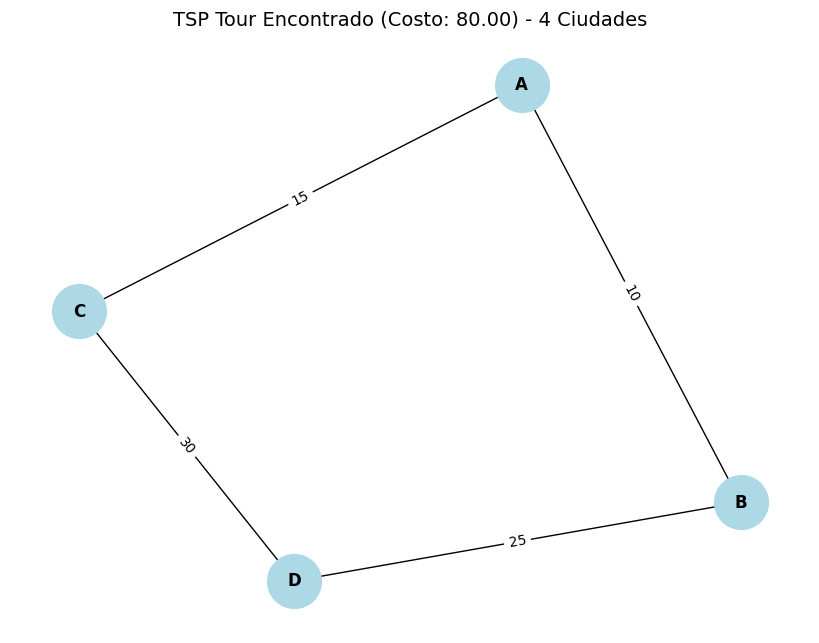



--- Ejemplo con 5 ciudades ---
🔪 Iniciando método de Planos de Corte para TSP
   Ciudades: 5
   Aristas: 10

--- Iteración 1 ---
   Objetivo LP: 82.0000
   Planos de corte en el sistema: 0
✅ Solución entera y tour Hamiltoniano encontrado! Costo: 82.0000

--- Resumen del Proceso de Planos de Corte ---
Tiempo total de ejecución: 0.01 segundos
Número total de iteraciones ejecutadas: 1
Número total de planos de corte añadidos: 0
✅ Mejor tour encontrado con costo: 82.0000
   Tour (índices): 0 -> 3 -> 2 -> 1 -> 4 -> 0
   Tour (nombres): C1 -> C4 -> C3 -> C2 -> C5 -> C1
------------------------------------

--- Resultado Final Fuera de la Clase (5 ciudades) ---
Mejor tour encontrado (índices): [0, 3, 2, 1, 4] -> 0
Mejor tour encontrado (ciudades): C1 -> C4 -> C3 -> C2 -> C5 -> C1
Costo total del tour: 82.00


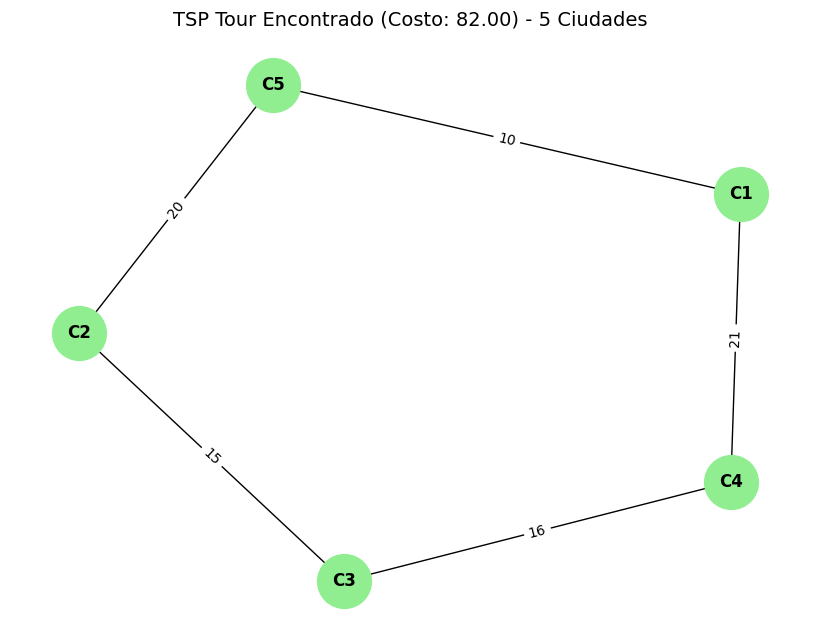

In [ ]:
# CELDA 1 (o parte de una celda grande) - Definición de la Clase
import numpy as np
from scipy.optimize import linprog
import networkx as nx
# from itertools import combinations # No se usa directamente combinations
from typing import List, Tuple, Set, Dict, Optional
import time
import matplotlib.pyplot as plt # Importar para graficar

class TSPLinearProgramming:
    """
    Implementación del TSP usando Programación Lineal con Planos de Corte
    basada en el método clásico de Dantzig, Fulkerson y Johnson (1954).

    Formulation:
    - Variables: x_ij ∈ {0,1} para cada arista (i,j)
    - Objetivo: minimizar Σ c_ij * x_ij
    - Restricciones de grado: Σ x_ij = 2 para todo i (cada nodo tiene grado 2)
    - Eliminación de subtours: Σ x_ij ≤ |S| - 1 para todo S ⊂ V, |S| ≥ 2
    """

    def __init__(self, distance_matrix: np.ndarray, city_names: List[str] = None):
        self.distance_matrix = distance_matrix
        self.n = len(distance_matrix)
        self.city_names = city_names or [f"City_{i}" for i in range(self.n)]
        self.edge_to_var = {}
        self.var_to_edge = {}
        self._create_edge_mappings()
        self.lp_solution = None
        self.integer_solution = None
        self.best_tour = None
        self.best_cost = float('inf')
        self.cutting_planes_added = 0
        self.iterations = 0

    def _create_edge_mappings(self):
        var_index = 0
        for i in range(self.n):
            for j in range(i + 1, self.n):
                self.edge_to_var[(i, j)] = var_index
                self.edge_to_var[(j, i)] = var_index
                self.var_to_edge[var_index] = (i, j)
                var_index += 1
        self.num_edges = var_index

    def solve_relaxed_lp(self, additional_constraints: List[Tuple[List[float], str, float]] = None) -> Dict:
        c = np.zeros(self.num_edges)
        for var_idx, (i, j) in self.var_to_edge.items():
            c[var_idx] = self.distance_matrix[i][j]

        A_eq = []
        b_eq = []
        for node in range(self.n):
            constraint = np.zeros(self.num_edges)
            for var_idx, (i, j) in self.var_to_edge.items():
                if i == node or j == node:
                    constraint[var_idx] = 1
            A_eq.append(constraint)
            b_eq.append(2)
        A_eq = np.array(A_eq)
        b_eq = np.array(b_eq)

        A_ub = []
        b_ub = []
        if additional_constraints:
            for coeff, inequality_type, rhs in additional_constraints:
                if inequality_type == '<=':
                    A_ub.append(coeff)
                    b_ub.append(rhs)
                elif inequality_type == '>=':
                    A_ub.append([-val for val in coeff])
                    b_ub.append(-rhs)

        bounds = [(0, 1) for _ in range(self.num_edges)]

        if A_ub:
            A_ub_np = np.array(A_ub)
            b_ub_np = np.array(b_ub)
            result = linprog(c, A_ub=A_ub_np, b_ub=b_ub_np, A_eq=A_eq, b_eq=b_eq,
                           bounds=bounds, method='highs')
        else:
            result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        return {
            'success': result.success,
            'objective': result.fun if result.success else float('inf'),
            'x': result.x if result.success else None,
            'message': result.message
        }

    def solution_to_graph(self, x: np.ndarray, threshold: float = 1e-6) -> nx.Graph:
        G = nx.Graph()
        G.add_nodes_from(range(self.n))
        if x is None: return G
        for var_idx, value in enumerate(x):
            if value > threshold:
                i, j = self.var_to_edge[var_idx]
                G.add_edge(i, j, weight=value, cost=self.distance_matrix[i][j])
        return G

    def find_subtours(self, x: np.ndarray, threshold: float = 1e-6) -> List[Set[int]]:
        if x is None: return []
        G = self.solution_to_graph(x, threshold)
        components = list(nx.connected_components(G))
        subtours = [comp for comp in components if len(comp) < self.n and len(comp) >= 2]
        return subtours

    def generate_subtour_elimination_constraints(self, subtours: List[Set[int]]) -> List[Tuple[List[float], str, float]]:
        constraints = []
        for subtour in subtours:
            coeff = np.zeros(self.num_edges)
            for var_idx, (i, j) in self.var_to_edge.items():
                if i in subtour and j in subtour:
                    coeff[var_idx] = 1
            rhs = len(subtour) - 1
            constraints.append((coeff.tolist(), '<=', rhs))
            self.cutting_planes_added += 1
        return constraints

    def find_fractional_cycles(self, x: np.ndarray, threshold: float = 0.1) -> List[Set[int]]:
        if x is None: return []
        G = self.solution_to_graph(x, threshold)
        cycles = []
        try:
            for cycle_nodes in nx.cycle_basis(G):
                if len(cycle_nodes) >= 3 and len(cycle_nodes) < self.n:
                    cycles.append(set(cycle_nodes))
                if len(cycles) > 10: break
        except Exception:
            pass
        return cycles

    def is_integer_solution(self, x: np.ndarray, tolerance: float = 1e-6) -> bool:
        if x is None: return False
        for value in x:
            if abs(value - 0) > tolerance and abs(value - 1) > tolerance:
                return False
        return True

    def extract_tour_from_solution(self, x: np.ndarray) -> Optional[List[int]]:
        if x is None or not self.is_integer_solution(x): return None
        G = self.solution_to_graph(x, threshold=0.5)
        if not all(G.degree(node) == 2 for node in G.nodes()): return None
        if not nx.is_connected(G): return None
        try:
            start_node = 0
            tour = [start_node]
            current_node = start_node
            previous_node = -1
            while len(tour) < self.n:
                neighbors = list(G.neighbors(current_node))
                next_node_found = False
                for neighbor in neighbors:
                    if neighbor != previous_node:
                        tour.append(neighbor)
                        previous_node = current_node
                        current_node = neighbor
                        next_node_found = True
                        break
                if not next_node_found: return None
            if len(tour) == self.n and G.has_edge(current_node, start_node):
                return tour
            else:
                return None
        except Exception:
            return None

    def solve_with_cutting_planes(self, max_iterations: int = 50,
                                verbose: bool = True) -> Tuple[Optional[List[int]], float]:
        if verbose:
            print("🔪 Iniciando método de Planos de Corte para TSP")
            print(f"   Ciudades: {self.n}")
            print(f"   Aristas: {self.num_edges}")
            print()

        start_time = time.time()
        additional_constraints = []
        self.best_tour = None
        self.best_cost = float('inf')
        self.iterations = 0
        self.cutting_planes_added = 0
        last_lp_objective_value = float('inf')

        for iteration in range(max_iterations):
            if verbose: print(f"--- Iteración {iteration + 1} ---")
            self.iterations = iteration + 1
            lp_result = self.solve_relaxed_lp(additional_constraints)

            if not lp_result['success']:
                if verbose: print(f"❌ Error en LP: {lp_result['message']}")
                self.lp_solution = None
                break

            self.lp_solution = lp_result['x']
            last_lp_objective_value = lp_result['objective']

            if verbose:
                print(f"   Objetivo LP: {last_lp_objective_value:.4f}")
                print(f"   Planos de corte en el sistema: {len(additional_constraints)}")

            if self.is_integer_solution(self.lp_solution):
                tour = self.extract_tour_from_solution(self.lp_solution)
                if tour:
                    self.best_tour = tour
                    self.best_cost = last_lp_objective_value
                    if verbose: print(f"✅ Solución entera y tour Hamiltoniano encontrado! Costo: {self.best_cost:.4f}")
                    break
                else:
                    if verbose: print("   Solución entera, pero no es un tour Hamiltoniano válido. Buscando subtours...")

            subtours = self.find_subtours(self.lp_solution, threshold=1e-5)

            if not subtours:
                if verbose: print("   No se encontraron subtours obvios (componentes conexas).")
                fractional_cycles = self.find_fractional_cycles(self.lp_solution, threshold=0.05)
                if fractional_cycles:
                    if verbose: print(f"   Encontrados {len(fractional_cycles)} ciclos fraccionarios candidatos.")
                    new_constraints = self.generate_subtour_elimination_constraints(fractional_cycles[:5])
                    if new_constraints:
                        additional_constraints.extend(new_constraints)
                        if verbose:
                            print(f"   Añadidos {len(new_constraints)} cortes basados en ciclos fraccionarios.")
                            print(f"     (Total acumulado de planos de corte: {self.cutting_planes_added})")
                    else:
                        if verbose: print("   No se generaron nuevas restricciones a partir de ciclos fraccionarios.")
                        print("   Terminando por falta de nuevas violaciones encontradas.")
                        break
                else:
                    if verbose: print("   No se encontraron ciclos fraccionarios para generar más cortes.")
                    if not self.is_integer_solution(self.lp_solution) and verbose:
                        print("   La solución es fraccional pero no se encontraron violaciones de subtour. El problema puede requerir cortes más complejos.")
                    print("   Terminando por falta de nuevas violaciones encontradas.")
                    break
            else:
                if verbose: print(f"   Encontrados {len(subtours)} subtours. Generando restricciones...")
                new_constraints = self.generate_subtour_elimination_constraints(subtours)
                additional_constraints.extend(new_constraints)
                if verbose:
                    print(f"   Añadidas {len(new_constraints)} restricciones de eliminación de subtours.")
                    print(f"     (Total acumulado de planos de corte: {self.cutting_planes_added})")

        if self.iterations >= max_iterations and not self.best_tour and verbose:
            print(f"\n⚠️  Se alcanzó el límite de {max_iterations} iteraciones sin encontrar un tour Hamiltoniano entero.")

        end_time = time.time()
        total_time = end_time - start_time

        if verbose:
            print("\n--- Resumen del Proceso de Planos de Corte ---")
            print(f"Tiempo total de ejecución: {total_time:.2f} segundos")
            print(f"Número total de iteraciones ejecutadas: {self.iterations}")
            print(f"Número total de planos de corte añadidos: {self.cutting_planes_added}")
            if self.best_tour:
                print(f"✅ Mejor tour encontrado con costo: {self.best_cost:.4f}")
                tour_node_indices = self.best_tour
                print(f"   Tour (índices): {' -> '.join(map(str, tour_node_indices))} -> {tour_node_indices[0]}")
                if self.city_names:
                    tour_city_names = [self.city_names[i] for i in tour_node_indices]
                    print(f"   Tour (nombres): {' -> '.join(tour_city_names)} -> {tour_city_names[0]}")
            else:
                print("⚠️ No se encontró un tour Hamiltoniano entero.")
                if self.lp_solution is not None:
                    print(f"   El valor objetivo del último LP relajado resuelto fue: {last_lp_objective_value:.4f}")
                else:
                    print(f"   No se procesó exitosamente ninguna solución LP relajada.")
            print("------------------------------------")
        return self.best_tour, self.best_cost

# --- Ejemplo de Uso ---
# No necesitas el if __name__ == "__main__": en Colab si todo está en celdas que ejecutas secuencialmente.
# Pero no hace daño tenerlo.

# Matriz de distancias de ejemplo (4 ciudades)
dist_matrix = np.array([
    [0, 10, 15, 20],  # A
    [10, 0, 35, 25],  # B
    [15, 35, 0, 30],  # C
    [20, 25, 30, 0]   # D
])
city_names = ["A", "B", "C", "D"]

print("Creando instancia del solver TSP...")
tsp_solver = TSPLinearProgramming(distance_matrix=dist_matrix, city_names=city_names)

print("\nIniciando la resolución del TSP...")
tour_indices, cost = tsp_solver.solve_with_cutting_planes(max_iterations=20, verbose=True)

print("\n--- Resultado Final Fuera de la Clase ---")
if tour_indices:
    tour_cities = [city_names[i] for i in tour_indices]
    print(f"Mejor tour encontrado (índices): {tour_indices} -> {tour_indices[0]}")
    print(f"Mejor tour encontrado (ciudades): {' -> '.join(tour_cities)} -> {tour_cities[0]}")
    print(f"Costo total del tour: {cost:.2f}")

    # Visualización Gráfica
    G_final_tour = nx.Graph()
    # Usar nombres de ciudades para los nodos en el grafo visual
    node_labels_map = {i: city_names[i] for i in range(len(city_names))}
    # G_final_tour.add_nodes_from([city_names[i] for i in range(len(city_names))]) # Añadir nodos con sus nombres

    # Añadir aristas del tour usando índices, pero etiquetar con nombres
    edges_for_drawing = []
    for i in range(len(tour_indices)):
        u_idx = tour_indices[i]
        v_idx = tour_indices[(i + 1) % len(tour_indices)]
        G_final_tour.add_edge(u_idx, v_idx, weight=dist_matrix[u_idx][v_idx]) # Usar índices para la estructura

    pos = nx.spring_layout(G_final_tour, seed=42)
    plt.figure(figsize=(8, 6)) # Ajustar tamaño de la figura
    nx.draw(G_final_tour, pos, labels=node_labels_map, with_labels=True, node_color='lightblue',
            node_size=1500, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G_final_tour, 'weight')
    nx.draw_networkx_edge_labels(G_final_tour, pos, edge_labels=edge_labels, font_size=10)
    plt.title(f"TSP Tour Encontrado (Costo: {cost:.2f}) - 4 Ciudades", fontsize=14)
    plt.show()

else:
    print("No se encontró un tour Hamiltoniano válido.")


# Ejemplo con 5 ciudades
print("\n\n--- Ejemplo con 5 ciudades ---")
dist_matrix_5 = np.array([
    [0, 29, 20, 21, 10],
    [29, 0, 15, 28, 20],
    [20, 15, 0, 16, 25],
    [21, 28, 16, 0, 18],
    [10, 20, 25, 18, 0]
])
city_names_5 = ["C1", "C2", "C3", "C4", "C5"]

tsp_solver_5 = TSPLinearProgramming(distance_matrix=dist_matrix_5, city_names=city_names_5)
tour_indices_5, cost_5 = tsp_solver_5.solve_with_cutting_planes(max_iterations=30, verbose=True)

print("\n--- Resultado Final Fuera de la Clase (5 ciudades) ---")
if tour_indices_5:
    tour_cities_5 = [city_names_5[i] for i in tour_indices_5]
    print(f"Mejor tour encontrado (índices): {tour_indices_5} -> {tour_indices_5[0]}")
    print(f"Mejor tour encontrado (ciudades): {' -> '.join(tour_cities_5)} -> {tour_cities_5[0]}")
    print(f"Costo total del tour: {cost_5:.2f}")

    # Visualización Gráfica para 5 ciudades
    G_final_tour_5 = nx.Graph()
    node_labels_map_5 = {i: city_names_5[i] for i in range(len(city_names_5))}

    for i in range(len(tour_indices_5)):
        u_idx = tour_indices_5[i]
        v_idx = tour_indices_5[(i + 1) % len(tour_indices_5)]
        G_final_tour_5.add_edge(u_idx, v_idx, weight=dist_matrix_5[u_idx][v_idx])

    pos_5 = nx.spring_layout(G_final_tour_5, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G_final_tour_5, pos_5, labels=node_labels_map_5, with_labels=True, node_color='lightgreen',
            node_size=1500, font_size=12, font_weight='bold')
    edge_labels_5 = nx.get_edge_attributes(G_final_tour_5, 'weight')
    nx.draw_networkx_edge_labels(G_final_tour_5, pos_5, edge_labels=edge_labels_5, font_size=10)
    plt.title(f"TSP Tour Encontrado (Costo: {cost_5:.2f}) - 5 Ciudades", fontsize=14)
    plt.show()
else:
    print("No se encontró un tour Hamiltoniano válido para 5 ciudades.")

In [4]:
# Importar las funciones necesarias de IPython para mostrar HTML
from IPython.core.display import display, HTML

# Definir el contenido HTML, CSS y JavaScript como un string multilínea
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Preguntas Frecuentes: Grafos Hamiltonianos</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    /* Definición de variables CSS para temas */
    :root {
      --bg-color: #f9f9f9;
      --text-color: #333;
      --header-color: #2c3e50;
      --header-dark-color: #ecf0f1; /* Color H1 en modo oscuro */
      --accent-color: #2980b9;
      --accent-dark-color: #9ad3de; /* Color H2 en modo oscuro */
      --button-bg: #3498db;
      --button-hover-bg: #2980b9;
      --button-dark-bg: #e74c3c;
      --button-dark-hover-bg: #c0392b;
      --button-text-color: white;
      --theme-button-bg: #8e44ad; /* Morado claro */
      --theme-button-dark-bg: #f39c12; /* Naranja */
      --answer-bg-color: #eef7ff;
      --answer-dark-bg-color: #3a506b; /* Un poco más claro que el fondo oscuro principal */
      --question-strong-color: var(--header-color);
      --answer-strong-color: var(--accent-color);
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      padding: 20px;
      margin: 0;
    }
    .container {
      max-width: 900px;
      margin: auto;
      padding: 20px;
      position: relative;
      background-color: var(--bg-color);
      border-radius: 8px;
      box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }
    body.dark-mode .container {
        box-shadow: 0 2px 10px rgba(0,0,0,0.3);
    }
    body.dark-mode {
      --bg-color: #2c3e50;
      --text-color: #ecf0f1;
      --header-color: var(--header-dark-color);
      --accent-color: var(--accent-dark-color);
      --button-bg: var(--button-dark-bg);
      --button-hover-bg: var(--button-dark-hover-bg);
      --answer-bg-color: var(--answer-dark-bg-color);
      --question-strong-color: var(--header-dark-color);
      --answer-strong-color: var(--accent-dark-color);
    }

    h1 {
      font-size: 2.3em; /* Ligeramente más pequeño para FAQ */
      color: var(--header-color);
      text-align: center;
      margin-bottom: 25px;
    }

    .section-content {
      display: none;
      margin-top: 0; /* Se ajusta el margen del botón */
      padding: 15px;
      border-left: 3px solid var(--accent-color);
      background-color: var(--answer-bg-color); /* Fondo para la respuesta */
      border-radius: 0 0 5px 5px; /* Redondear esquinas inferiores */
    }
    .section-content.is-visible {
      display: block;
    }

    .toggle-button {
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px;
      border-radius: 5px;
      cursor: pointer;
      margin-top: 15px; /* Espacio entre preguntas */
      transition: background-color 0.3s;
      width: 100%;
      text-align: left;
      font-size: 1.1em;
    }
    .toggle-button:hover {
      background-color: var(--button-hover-bg);
    }
    .toggle-button.is-expanded { /* Estilo para cuando el botón está expandido */
        border-radius: 5px 5px 0 0;
    }
    .toggle-button strong { /* Para "Pregunta X:" */
        color: var(--question-strong-color);
        font-weight: 700; /* Roboto bold */
    }
    body.dark-mode .toggle-button strong {
        color: var(--button-text-color); /* Mantener blanco en modo oscuro para el botón */
    }
    .section-content p strong { /* Para "Respuesta:" */
        color: var(--answer-strong-color);
         font-weight: 700;
    }


    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      position: absolute;
      top: 20px;
      right: 20px;
      font-size: 0.9em;
      transition: background-color 0.3s;
      z-index: 10;
    }
    body.dark-mode .theme-toggle {
       background-color: var(--theme-button-dark-bg);
    }

    button:focus, a:focus {
        outline: 2px solid var(--accent-color);
        outline-offset: 2px;
    }
    body.dark-mode button:focus, body.dark-mode a:focus {
         outline-color: var(--accent-dark-color);
    }
    p {
        margin-bottom: 1em;
    }
    p:last-child {
        margin-bottom: 0;
    }
  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1>Cuestionario sobre  Grafos Hamiltonianos</h1>

    <!-- Pregunta 1 -->
    <button class="toggle-button" onclick="toggleSection('qa1', this)" aria-expanded="false" aria-controls="qa1">
      <strong>Pregunta 1:</strong> ¿Qué representa un camino hamiltoniano en un grafo y cuál es su utilidad práctica?
    </button>
    <div id="qa1" class="section-content">
      <p><strong>Respuesta:</strong> Un camino hamiltoniano en un grafo es una secuencia de vértices en la cual cada vértice del grafo aparece exactamente una vez y existe una arista entre cada par consecutivo de vértices en la secuencia. Su utilidad práctica se refleja en problemas de planificación, logística, circuitos impresos, biología computacional y el problema del viajante, donde se busca visitar todas las ubicaciones sin repeticiones.</p>
    </div>

    <!-- Pregunta 2 -->
    <button class="toggle-button" onclick="toggleSection('qa2', this)" aria-expanded="false" aria-controls="qa2">
      <strong>Pregunta 2:</strong> ¿Cuál es la principal diferencia entre un ciclo hamiltoniano y un ciclo euleriano?
    </button>
    <div id="qa2" class="section-content">
      <p><strong>Respuesta:</strong> La diferencia principal radica en el objeto de recorrido. Un ciclo hamiltoniano recorre cada vértice exactamente una vez y regresa al punto de inicio, mientras que un ciclo euleriano recorre cada arista exactamente una vez, permitiendo repetir vértices. Por tanto, el foco del primero está en los vértices y el del segundo en las aristas.</p>
    </div>

    <!-- Pregunta 3 -->
    <button class="toggle-button" onclick="toggleSection('qa3', this)" aria-expanded="false" aria-controls="qa3">
      <strong>Pregunta 3:</strong> ¿Por qué es difícil determinar si un grafo tiene un ciclo hamiltoniano?
    </button>
    <div id="qa3" class="section-content">
      <p><strong>Respuesta:</strong> El problema de determinar la existencia de un ciclo hamiltoniano es NP-completo, lo que implica que no se conoce un algoritmo eficiente (en tiempo polinomial) que lo resuelva en todos los casos. Esta dificultad se debe a la cantidad exponencial de combinaciones posibles de vértices que deben evaluarse para verificar si forman un ciclo válido.</p>
    </div>

    <!-- Pregunta 4 -->
    <button class="toggle-button" onclick="toggleSection('qa4', this)" aria-expanded="false" aria-controls="qa4">
      <strong>Pregunta 4:</strong> ¿Cómo se enuncia formalmente el Teorema de Dirac?
    </button>
    <div id="qa4" class="section-content">
      <p><strong>Respuesta:</strong> El Teorema de Dirac establece que si un grafo simple G con n ≥ 3 vértices tiene grado mínimo δ(G) ≥ n/2, entonces G es hamiltoniano, es decir, contiene al menos un ciclo que recorre todos los vértices exactamente una vez.</p>
    </div>

    <!-- Pregunta 5 -->
    <button class="toggle-button" onclick="toggleSection('qa5', this)" aria-expanded="false" aria-controls="qa5">
      <strong>Pregunta 5:</strong> ¿Por qué el Teorema de Dirac es considerado una condición suficiente pero no necesaria?
    </button>
    <div id="qa5" class="section-content">
      <p><strong>Respuesta:</strong> Es suficiente porque todo grafo que cumpla la condición dada tiene garantizado un ciclo hamiltoniano. Sin embargo, no es necesaria porque existen grafos que no cumplen con δ(G) ≥ n/2 y aun así son hamiltonianos. Por lo tanto, no abarca todos los casos posibles.</p>
    </div>

    <!-- Pregunta 6 -->
    <button class="toggle-button" onclick="toggleSection('qa6', this)" aria-expanded="false" aria-controls="qa6">
      <strong>Pregunta 6:</strong> ¿Qué papel juega el concepto de "grado mínimo" en el Teorema de Dirac?
    </button>
    <div id="qa6" class="section-content">
      <p><strong>Respuesta:</strong> El grado mínimo δ(G) es la menor cantidad de aristas incidentes en cualquier vértice del grafo. En el Teorema de Dirac, se usa para garantizar una densidad mínima de conexiones entre los vértices, lo cual favorece la conectividad suficiente para asegurar un recorrido hamiltoniano.</p>
    </div>

    <!-- Pregunta 7 -->
    <button class="toggle-button" onclick="toggleSection('qa7', this)" aria-expanded="false" aria-controls="qa7">
      <strong>Pregunta 7:</strong> ¿Qué es el cierre de un grafo y cómo se usa para verificar hamiltonicidad?
    </button>
    <div id="qa7" class="section-content">
      <p><strong>Respuesta:</strong> El cierre cl(G) de un grafo es una versión expandida de G obtenida agregando aristas entre pares de vértices no adyacentes cuya suma de grados sea al menos n. El Teorema de Bondy–Chvátal establece que un grafo es hamiltoniano si y solo si su cierre lo es, proporcionando así una forma indirecta de verificar la hamiltonicidad.</p>
    </div>

    <!-- Pregunta 8 -->
    <button class="toggle-button" onclick="toggleSection('qa8', this)" aria-expanded="false" aria-controls="qa8">
      <strong>Pregunta 8:</strong> ¿Cómo se diferencia el enfoque de Dirac del de Bondy y Chvátal?
    </button>
    <div id="qa8" class="section-content">
      <p><strong>Respuesta:</strong> El enfoque de Dirac se basa en una cota fija del grado mínimo de todos los vértices. En cambio, Bondy y Chvátal generalizan esta idea usando la suma de grados de pares de vértices no adyacentes y añadiendo aristas progresivamente. Su teorema abarca una mayor cantidad de grafos hamiltonianos al ser una condición más general.</p>
    </div>

    <!-- Pregunta 9 -->
    <button class="toggle-button" onclick="toggleSection('qa9', this)" aria-expanded="false" aria-controls="qa9">
      <strong>Pregunta 9:</strong> ¿Qué complejidad computacional tiene la búsqueda de caminos hamiltonianos mediante fuerza bruta?
    </button>
    <div id="qa9" class="section-content">
      <p><strong>Respuesta:</strong> El enfoque por fuerza bruta tiene una complejidad de O(n!), ya que implica probar todas las permutaciones posibles de vértices para verificar si forman caminos hamiltonianos. Esto es computacionalmente inviable para grafos grandes debido al crecimiento factorial.</p>
    </div>

    <!-- Pregunta 10 -->
    <button class="toggle-button" onclick="toggleSection('qa10', this)" aria-expanded="false" aria-controls="qa10">
      <strong>Pregunta 10:</strong> ¿Qué es el algoritmo de Held-Karp y qué ventaja ofrece?
    </button>
    <div id="qa10" class="section-content">
      <p><strong>Respuesta:</strong> El algoritmo de Held-Karp es un enfoque de programación dinámica para encontrar ciclos hamiltonianos mínimos en grafos ponderados. Tiene una complejidad de O(n<sup>2</sup> ⋅ 2<sup>n</sup>), considerablemente mejor que la fuerza bruta. Es útil en aplicaciones como el problema del viajante, aunque sigue siendo exponencial.</p>
    </div>

    <!-- Pregunta 11 -->
    <button class="toggle-button" onclick="toggleSection('qa11', this)" aria-expanded="false" aria-controls="qa11">
      <strong>Pregunta 11:</strong> ¿Por qué un árbol con más de dos vértices no puede ser hamiltoniano?
    </button>
    <div id="qa11" class="section-content">
      <p><strong>Respuesta:</strong> Un árbol es un grafo sin ciclos. Para que un grafo tenga un ciclo hamiltoniano debe contener un ciclo que incluya todos los vértices. Por definición, los árboles carecen de ciclos, por lo tanto, no pueden ser hamiltonianos salvo casos triviales con uno o dos vértices.</p>
    </div>

    <!-- Pregunta 12 -->
    <button class="toggle-button" onclick="toggleSection('qa12', this)" aria-expanded="false" aria-controls="qa12">
      <strong>Pregunta 12:</strong> ¿En qué casos un grafo completo K<sub>n</sub> es hamiltoniano?
    </button>
    <div id="qa12" class="section-content">
      <p><strong>Respuesta:</strong> Todo grafo completo K<sub>n</sub>, con n ≥ 3, es hamiltoniano. Esto se debe a que cada vértice está conectado con todos los demás, lo que permite formar fácilmente ciclos que recorren todos los vértices exactamente una vez.</p>
    </div>

    <!-- Pregunta 13 -->
    <button class="toggle-button" onclick="toggleSection('qa13', this)" aria-expanded="false" aria-controls="qa13">
      <strong>Pregunta 13:</strong> ¿Qué características tiene un grafo que “casi” cumple con el Teorema de Dirac?
    </button>
    <div id="qa13" class="section-content">
      <p><strong>Respuesta:</strong> Un grafo que “casi” cumple con Dirac tiene un grado mínimo ligeramente menor que n/2, por ejemplo ⌊n/2⌋−1. Aunque puede estar densamente conectado, no garantiza un ciclo hamiltoniano. Un ejemplo es el grafo bipartito K<sub>⌊(n−1)/2⌋,⌈(n+1)/2⌉</sub>, que no es hamiltoniano.</p>
    </div>

    <!-- Pregunta 14 -->
    <button class="toggle-button" onclick="toggleSection('qa14', this)" aria-expanded="false" aria-controls="qa14">
      <strong>Pregunta 14:</strong> ¿Por qué la propiedad de ser hamiltoniano depende de la estructura global del grafo?
    </button>
    <div id="qa14" class="section-content">
      <p><strong>Respuesta:</strong> Ser hamiltoniano no depende únicamente del grado local de los vértices sino de cómo están organizadas las conexiones entre ellos. Es necesario que exista una disposición global que permita pasar una sola vez por cada vértice sin desconectar el recorrido, lo que requiere un análisis estructural más complejo que el caso euleriano.</p>
    </div>

    <!-- Pregunta 15 -->
    <button class="toggle-button" onclick="toggleSection('qa15', this)" aria-expanded="false" aria-controls="qa15">
      <strong>Pregunta 15:</strong> ¿Qué significa que un grafo sea maximal no hamiltoniano?
    </button>
    <div id="qa15" class="section-content">
      <p><strong>Respuesta:</strong> Un grafo es maximal no hamiltoniano si no tiene un ciclo hamiltoniano, pero añadir cualquier arista ausente convierte al grafo en hamiltoniano. Este concepto es útil en pruebas por contradicción, como en la demostración del Teorema de Dirac, para mostrar que bajo ciertas condiciones, no puede existir tal grafo sin llegar a una contradicción.</p>
    </div>

  </div> <!-- Fin de .container -->

  <script>
    // Función para cambiar entre modo claro y oscuro
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDarkMode = document.body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    // Función para mostrar/ocultar secciones
    function toggleSection(id, buttonElement) { // Pasamos el botón como argumento
      let section = document.getElementById(id);
      // let button = document.querySelector(`button[aria-controls='${id}']`); // Ya no es necesario buscarlo si lo pasamos

      if (section && buttonElement) {
          section.classList.toggle('is-visible');
          let isVisible = section.classList.contains('is-visible');
          buttonElement.setAttribute('aria-expanded', isVisible);
          buttonElement.classList.toggle('is-expanded', isVisible); // Añadir/quitar clase para estilo de botón expandido
      }
    }

    // Función que se ejecuta cuando la página carga
    window.onload = function() {
      let themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Claro";
        }
      } else {
        document.body.classList.remove("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Oscuro";
        }
      }

       document.querySelectorAll('.section-content').forEach(section => {
         section.classList.remove('is-visible');
       });
       document.querySelectorAll('.toggle-button').forEach(button => {
          button.setAttribute('aria-expanded', 'false');
          button.classList.remove('is-expanded');
       });
    }
  </script>
</body>
</html>
"""

# Mostrar el HTML en la salida de la celda
display(HTML(html_content))

In [5]:
# Importar las funciones necesarias de IPython para mostrar HTML
from IPython.core.display import display, HTML

# Definir el contenido HTML, CSS y JavaScript como un string multilínea
html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Glosario: Grafos Hamiltonianos</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    /* Definición de variables CSS para temas */
    :root {
      --bg-color: #f9f9f9;
      --text-color: #333;
      --header-color: #2c3e50;
      --header-dark-color: #ecf0f1; /* Color H1 en modo oscuro */
      --accent-color: #2980b9; /* Azul principal */
      --accent-dark-color: #9ad3de; /* Azul claro para modo oscuro */
      --button-bg: #5dade2; /* Un azul un poco más claro para los botones de término */
      --button-hover-bg: #2e86c1; /* Azul más oscuro para hover */
      --button-dark-bg: #e74c3c; /* Rojo para modo oscuro (podría ser otro color) */
      --button-dark-hover-bg: #c0392b; /* Rojo más oscuro para hover */
      --button-text-color: white;
      --theme-button-bg: #8e44ad; /* Morado claro */
      --theme-button-dark-bg: #f39c12; /* Naranja */
      --definition-bg-color: #eaf2f8; /* Fondo muy claro para la definición */
      --definition-dark-bg-color: #34495e; /* Gris azulado oscuro para definición en modo oscuro */
      --term-strong-color: var(--header-color); /* Color para el término en el botón */
    }

    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.7; /* Ligeramente menos interlineado para glosario */
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
      padding: 20px;
      margin: 0;
    }
    .container {
      max-width: 900px;
      margin: auto;
      padding: 20px;
      position: relative;
      background-color: var(--bg-color);
      border-radius: 8px;
      box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }
    body.dark-mode .container {
        box-shadow: 0 2px 10px rgba(0,0,0,0.3);
    }
    body.dark-mode {
      --bg-color: #2c3e50;
      --text-color: #ecf0f1;
      --header-color: var(--header-dark-color);
      --accent-color: var(--accent-dark-color);
      --button-bg: var(--button-dark-bg);
      --button-hover-bg: var(--button-dark-hover-bg);
      --definition-bg-color: var(--definition-dark-bg-color);
      --term-strong-color: var(--header-dark-color);
    }

    h1 {
      font-size: 2.3em;
      color: var(--header-color);
      text-align: center;
      margin-bottom: 25px;
    }

    .definition-panel { /* Renombrado de section-content para especificidad */
      display: none;
      margin-top: 0;
      padding: 15px 20px; /* Más padding horizontal */
      border-left: 4px solid var(--accent-color);
      background-color: var(--definition-bg-color);
      border-radius: 0 0 5px 5px;
      font-size: 0.95em; /* Ligeramente más pequeño para definición */
    }
    .definition-panel.is-visible {
      display: block;
    }

    .term-button { /* Renombrado de toggle-button */
      background-color: var(--button-bg);
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px;
      border-radius: 5px;
      cursor: pointer;
      margin-top: 10px; /* Menos espacio entre términos */
      transition: background-color 0.3s, border-radius 0.2s;
      width: 100%;
      text-align: left;
      font-size: 1.15em; /* Un poco más grande para el término */
      font-weight: 500; /* Semi-bold */
    }
    .term-button:hover {
      background-color: var(--button-hover-bg);
    }
    .term-button.is-expanded {
        border-radius: 5px 5px 0 0;
    }
    /* Para el nombre del término dentro del botón */
    .term-button strong {
        color: var(--button-text-color); /* Siempre blanco o color definido para texto de botón */
        font-weight: 700; /* Roboto bold */
    }
    body.dark-mode .term-button {
        background-color: var(--accent-dark-color); /* Usar el color de acento oscuro para el botón */
        color: var(--bg-color); /* Texto oscuro sobre fondo claro en modo oscuro */
    }
    body.dark-mode .term-button:hover {
        background-color: var(--accent-color); /* Usar el color de acento claro para hover */
    }
    body.dark-mode .term-button strong {
        color: var(--bg-color); /* Mantener texto oscuro sobre fondo claro */
    }


    .theme-toggle {
      background-color: var(--theme-button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      position: absolute;
      top: 20px;
      right: 20px;
      font-size: 0.9em;
      transition: background-color 0.3s;
      z-index: 10;
    }
    body.dark-mode .theme-toggle {
       background-color: var(--theme-button-dark-bg);
    }

    button:focus, a:focus {
        outline: 2px solid var(--accent-color);
        outline-offset: 2px;
    }
    body.dark-mode button:focus, body.dark-mode a:focus {
         outline-color: var(--accent-dark-color);
    }
    .definition-panel p {
        margin-bottom: 0.8em;
    }
    .definition-panel p:last-child {
        margin-bottom: 0;
    }
  </style>
</head>
<body>
  <div class="container">
    <button id="theme-toggle-btn" class="theme-toggle" onclick="toggleTheme()" title="Cambiar tema de color">Modo Oscuro</button>

    <h1>Glosario de Términos de Grafos Hamiltonianos</h1>

    <!-- Término: Arista -->
    <button class="term-button" onclick="togglePanel('gloss_arista', this)" aria-expanded="false" aria-controls="gloss_arista">
      <strong>Arista</strong>
    </button>
    <div id="gloss_arista" class="definition-panel">
      <p>Una arista es una conexión o vínculo entre dos vértices en un grafo. En grafos no dirigidos, no tiene orientación; en los dirigidos, sí importa el sentido (de un vértice a otro).</p>
    </div>

    <!-- Término: Camino -->
    <button class="term-button" onclick="togglePanel('gloss_camino', this)" aria-expanded="false" aria-controls="gloss_camino">
      <strong>Camino</strong>
    </button>
    <div id="gloss_camino" class="definition-panel">
      <p>Un camino es una secuencia de vértices en la cual cada par consecutivo está conectado por una arista. Si todos los vértices del camino son distintos, se llama camino simple.</p>
    </div>

    <!-- Término: Camino Hamiltoniano -->
    <button class="term-button" onclick="togglePanel('gloss_camino_h', this)" aria-expanded="false" aria-controls="gloss_camino_h">
      <strong>Camino Hamiltoniano</strong>
    </button>
    <div id="gloss_camino_h" class="definition-panel">
      <p>Un camino hamiltoniano es un camino simple que visita cada vértice del grafo exactamente una vez. No es necesario que el camino termine en el mismo vértice en el que comenzó.</p>
    </div>

    <!-- Término: Ciclo -->
    <button class="term-button" onclick="togglePanel('gloss_ciclo', this)" aria-expanded="false" aria-controls="gloss_ciclo">
      <strong>Ciclo</strong>
    </button>
    <div id="gloss_ciclo" class="definition-panel">
      <p>Un ciclo es un camino cerrado, es decir, un camino en el que el primer y último vértice coinciden. Todos los vértices del ciclo deben ser distintos excepto el primero y el último.</p>
    </div>

    <!-- Término: Ciclo Hamiltoniano -->
    <button class="term-button" onclick="togglePanel('gloss_ciclo_h', this)" aria-expanded="false" aria-controls="gloss_ciclo_h">
      <strong>Ciclo Hamiltoniano</strong>
    </button>
    <div id="gloss_ciclo_h" class="definition-panel">
      <p>Un ciclo hamiltoniano es un ciclo simple que incluye todos los vértices del grafo exactamente una vez, excepto el vértice inicial/final, que se repite para cerrar el ciclo.</p>
    </div>

    <!-- Término: Cierre de Bondy–Chvátal (cl(G)) -->
    <button class="term-button" onclick="togglePanel('gloss_cierre_bc', this)" aria-expanded="false" aria-controls="gloss_cierre_bc">
      <strong>Cierre de Bondy–Chvátal (cl(G))</strong>
    </button>
    <div id="gloss_cierre_bc" class="definition-panel">
      <p>El cierre de un grafo G, denotado cl(G), es el grafo resultante de agregar aristas entre pares de vértices no adyacentes cuya suma de grados sea al menos n, donde n es el número total de vértices. Se usa para verificar hamiltonicidad según el Teorema de Bondy–Chvátal.</p>
    </div>

    <!-- Término: Conectividad -->
    <button class="term-button" onclick="togglePanel('gloss_conectividad', this)" aria-expanded="false" aria-controls="gloss_conectividad">
      <strong>Conectividad</strong>
    </button>
    <div id="gloss_conectividad" class="definition-panel">
      <p>La conectividad de un grafo indica si existe un camino entre cada par de vértices. Un grafo es conexo si es posible llegar de cualquier vértice a cualquier otro mediante un camino.</p>
    </div>

    <!-- Término: Grafo -->
    <button class="term-button" onclick="togglePanel('gloss_grafo', this)" aria-expanded="false" aria-controls="gloss_grafo">
      <strong>Grafo</strong>
    </button>
    <div id="gloss_grafo" class="definition-panel">
      <p>Un grafo es una estructura matemática que consiste en un conjunto de vértices (o nodos) y un conjunto de aristas que los conectan. Puede ser dirigido o no dirigido.</p>
    </div>

    <!-- Término: Grafo Hamiltoniano -->
    <button class="term-button" onclick="togglePanel('gloss_grafo_h', this)" aria-expanded="false" aria-controls="gloss_grafo_h">
      <strong>Grafo Hamiltoniano</strong>
    </button>
    <div id="gloss_grafo_h" class="definition-panel">
      <p>Un grafo hamiltoniano es un grafo que contiene al menos un ciclo hamiltoniano. La existencia de tal ciclo implica una fuerte conectividad estructural.</p>
    </div>

    <!-- Término: Grafo Trazable -->
    <button class="term-button" onclick="togglePanel('gloss_grafo_traz', this)" aria-expanded="false" aria-controls="gloss_grafo_traz">
      <strong>Grafo Trazable</strong>
    </button>
    <div id="gloss_grafo_traz" class="definition-panel">
      <p>Un grafo trazable es un grafo que contiene al menos un camino hamiltoniano. Es una propiedad más débil que la hamiltonicidad, ya que no requiere cerrar el ciclo.</p>
    </div>

    <!-- Término: Grafo Euleriano -->
    <button class="term-button" onclick="togglePanel('gloss_grafo_e', this)" aria-expanded="false" aria-controls="gloss_grafo_e">
      <strong>Grafo Euleriano</strong>
    </button>
    <div id="gloss_grafo_e" class="definition-panel">
      <p>Un grafo euleriano es aquel que tiene un ciclo euleriano, es decir, un recorrido cerrado que visita cada arista exactamente una vez. Requiere que todos los vértices tengan grado par.</p>
    </div>

    <!-- Término: Grado de un Vértice -->
    <button class="term-button" onclick="togglePanel('gloss_grado_v', this)" aria-expanded="false" aria-controls="gloss_grado_v">
      <strong>Grado de un Vértice</strong>
    </button>
    <div id="gloss_grado_v" class="definition-panel">
      <p>El grado de un vértice es el número de aristas que inciden sobre él. En grafos dirigidos, se distingue entre grado de entrada y grado de salida.</p>
    </div>

    <!-- Término: Grado Mínimo (δ(G)) -->
    <button class="term-button" onclick="togglePanel('gloss_grado_min', this)" aria-expanded="false" aria-controls="gloss_grado_min">
      <strong>Grado Mínimo (δ(G))</strong>
    </button>
    <div id="gloss_grado_min" class="definition-panel">
      <p>Es el menor grado entre todos los vértices del grafo. En el Teorema de Dirac, este valor debe ser al menos n/2 para garantizar un ciclo hamiltoniano.</p>
    </div>

    <!-- Término: NP-completo -->
    <button class="term-button" onclick="togglePanel('gloss_np_completo', this)" aria-expanded="false" aria-controls="gloss_np_completo">
      <strong>NP-completo</strong>
    </button>
    <div id="gloss_np_completo" class="definition-panel">
      <p>Una clase de problemas computacionales cuya solución puede ser verificada en tiempo polinomial, pero cuya resolución no tiene un algoritmo conocido de tiempo polinomial. Determinar si un grafo es hamiltoniano es un problema NP-completo.</p>
    </div>

    <!-- Término: Permutación -->
    <button class="term-button" onclick="togglePanel('gloss_permutacion', this)" aria-expanded="false" aria-controls="gloss_permutacion">
      <strong>Permutación</strong>
    </button>
    <div id="gloss_permutacion" class="definition-panel">
      <p>Una permutación es un reordenamiento de los elementos de un conjunto. En el contexto de caminos hamiltonianos, representa las distintas secuencias posibles de vértices.</p>
    </div>

    <!-- Término: Reducción al Absurdo -->
    <button class="term-button" onclick="togglePanel('gloss_reduc_abs', this)" aria-expanded="false" aria-controls="gloss_reduc_abs">
      <strong>Reducción al Absurdo</strong>
    </button>
    <div id="gloss_reduc_abs" class="definition-panel">
      <p>Método de prueba lógica en el que se asume lo contrario de lo que se quiere demostrar y, a partir de ello, se llega a una contradicción, lo que valida la afirmación original. Se utiliza en la prueba del Teorema de Dirac.</p>
    </div>

    <!-- Término: Teorema de Dirac -->
    <button class="term-button" onclick="togglePanel('gloss_teo_dirac', this)" aria-expanded="false" aria-controls="gloss_teo_dirac">
      <strong>Teorema de Dirac</strong>
    </button>
    <div id="gloss_teo_dirac" class="definition-panel">
      <p>Establece que si un grafo simple de n ≥ 3 vértices tiene grado mínimo al menos n/2, entonces el grafo es hamiltoniano. Es una condición suficiente para la existencia de un ciclo hamiltoniano.</p>
    </div>

    <!-- Término: Teorema de Euler -->
    <button class="term-button" onclick="togglePanel('gloss_teo_euler', this)" aria-expanded="false" aria-controls="gloss_teo_euler">
      <strong>Teorema de Euler</strong>
    </button>
    <div id="gloss_teo_euler" class="definition-panel">
      <p>Establece que un grafo conexo tiene un ciclo euleriano si y solo si todos sus vértices tienen grado par.</p>
    </div>

    <!-- Término: Teorema de Bondy–Chvátal -->
    <button class="term-button" onclick="togglePanel('gloss_teo_bc', this)" aria-expanded="false" aria-controls="gloss_teo_bc">
      <strong>Teorema de Bondy–Chvátal</strong>
    </button>
    <div id="gloss_teo_bc" class="definition-panel">
      <p>Afirma que un grafo G con n ≥ 3 vértices es hamiltoniano si y solo si su cierre cl(G) es hamiltoniano. Este resultado generaliza varios teoremas, como el de Dirac y el de Ore.</p>
    </div>

  </div> <!-- Fin de .container -->

  <script>
    // Función para cambiar entre modo claro y oscuro
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDarkMode = document.body.classList.contains("dark-mode");
      localStorage.setItem("theme", isDarkMode ? "dark" : "light");
      if (themeButton) {
          themeButton.textContent = isDarkMode ? "Modo Claro" : "Modo Oscuro";
      }
    }

    // Función para mostrar/ocultar paneles de definición
    function togglePanel(id, buttonElement) {
      let panel = document.getElementById(id);
      if (panel && buttonElement) {
          panel.classList.toggle('is-visible');
          let isVisible = panel.classList.contains('is-visible');
          buttonElement.setAttribute('aria-expanded', isVisible);
          buttonElement.classList.toggle('is-expanded', isVisible);
      }
    }

    // Función que se ejecuta cuando la página carga
    window.onload = function() {
      let themeButton = document.getElementById('theme-toggle-btn');
      const savedTheme = localStorage.getItem("theme");

      if (savedTheme === "dark") {
        document.body.classList.add("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Claro";
        }
      } else {
        document.body.classList.remove("dark-mode");
        if (themeButton) {
            themeButton.textContent = "Modo Oscuro";
        }
      }

       document.querySelectorAll('.definition-panel').forEach(panel => {
         panel.classList.remove('is-visible');
       });
       document.querySelectorAll('.term-button').forEach(button => {
          button.setAttribute('aria-expanded', 'false');
          button.classList.remove('is-expanded');
       });
    }
  </script>
</body>
</html>
"""

# Mostrar el HTML en la salida de la celda
display(HTML(html_content))